# **Solving a Supervised Multi-class Classification Problem Using Multinomial Logistic Regression Around The Concept Of Stellar Classification**

---



# **IMPORTING [DATASET](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17)**
---

In [448]:
# FOR DATASET MANIPULATION 
import pandas as pd
import numpy as np

# FOR SPLITTING  
from sklearn.model_selection import train_test_split

# FOR GRAPH VISUALISATION 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# FOR DATA ENCODING
from sklearn.preprocessing import LabelEncoder

# FOR DATA SCALING
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# FOR DATA TRANSFORMATION 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

# LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression

# EVALUTAION METRICS
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError

In [449]:
#https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

# import dataset
df = pd.read_csv("/content/drive/MyDrive/AI-ASSIGNMENT/star_classification.csv")

In [450]:
# see how the inital dataset looks like, how the features and observations look
df.head(10)

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
5  1.237680e+18  340.995121  20.589476  23.48827  23.33776  21.32195   
6  1.237679e+18   23.234926  11.418188  21.46973  21.17624  20.92829   
7  1.237679e+18    5.433176  12.065186  22.24979  22.02172  20.34126   
8  1.237661e+18  200.290475  47.199402  24.40286  22.35669  20.61032   
9  1.237671e+18   39.149691  28.102842  21.74669  20.03493  19.17553   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   
5  20.25615  19.54544    8102       301        3       110  5.658977e+18   
6  20.60826  20.42573    7773       301        2       462  1.246262e+19   
7  19.48794  18.84999    7773       301        2       346  6.961443e+18   
8  19.46490  18.95852    3716       301        5       108  7.459285e+18   
9  18.81823  18.65422    5934       301        4       122  2.751763e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842  
5     QSO  1.424659   5026  55855       741  
6     QSO  0.586455  11069  58456       113  
7  GALAXY  0.477009   6183  56210        15  
8  GALAXY  0.660012   6625  56386       719  
9    STAR -0.000008   2444  54082       232

In [451]:
# the size of the dataset
# 100,000 observations
# 18 features (1 class feature)
df.shape

(100000, 18)

In [452]:
# see data types for each feature
# 10 features with float data type
# 7 features with int data type
# 1 feature with object data type (class feature)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [453]:
# shows the amount of class objects there are being 3
# the object with the most observations is GALAXY with 59445
df.describe(include=['O'])

class
count   100000
unique       3
top     GALAXY
freq     59445

In [454]:
# the names of the 3 diffrent class objects
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

# **1 - SPLITTING DATASET**
---

In [455]:
# seperated the features from the dataset so i can preform a train/test split  

X = df.drop(['class'], axis=1) # FEATURES (NO CLASS FEATURE)
Y = df['class'] # CLASS LABEL/TARGET VARIABLE (CLASS FEATURE ONLY)

# the dataset was split first to avoid data leakage before the EDA process

# i will split the to preform EDA on the training set
# 80/20 split between training and testing split
# 42 random state
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [456]:
# shows the dataset size for each train/test split

# training set has 80,000 observations for features and class label
# testing set has 20,000 observations for features and class label
print(f"X_train -\nShape: {X_train.shape}\n\nX_test -\nShape: {X_test.shape}\n")
print(f"Y_train -\nShape: {Y_train.shape}\n\nY_test -\nShape: {Y_test.shape}\n")

X_train -
Shape: (80000, 17)

X_test -
Shape: (20000, 17)

Y_train -
Shape: (80000,)

Y_test -
Shape: (20000,)



In [457]:
# merged the training features and class label to preform EDA on training set 
df_train = pd.merge(X_train, Y_train, left_index=True, right_index=True)

#   **2 - EXPLORATORY DATA ANALYSIS (EDA)**
---

###---------------------------------------------------------------------------------------------------------------------------------------------
**EDA Questions:**

1. Are there any missing numbers within the dataset? 
2. Is the target variable 'class' balanced do the proportions of the labels greatly differ or close to each other?
3.	Do any of the features contain outliers if so how would they effect the model? 
4.	Do any of the features have no correlation the target variable 'class' if so should they be dropped?
5.	Are any of the features to strongly correlated with each other causing multicollinearity problem?
6. How is redshift effected by the size/distance of celestial bodies?
7. Are the majority of observation in the high end or low end of redshift?

#------------------------------------------------------------------------------------------------------------

## 2.1 - Univariate Analysis

> 




### 2.1.1 - Target Analysis (Analysing question 2)

> 



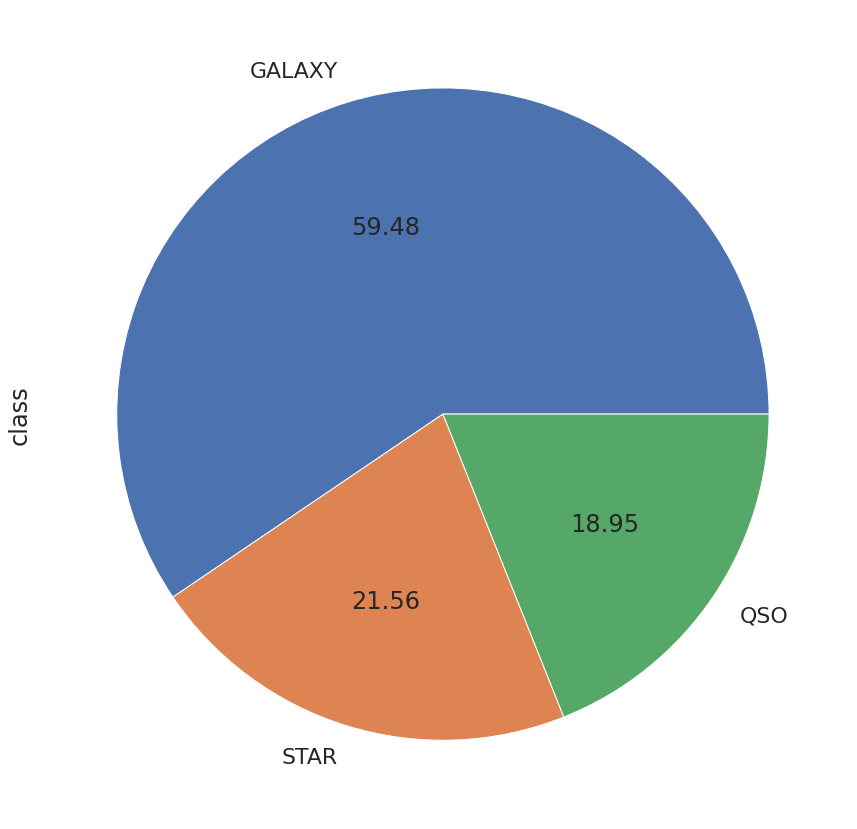

In [458]:
'''
via the bar and pie graphs, we can see that the GALAXY class has more than
double the observations than the STAR and QSO class. this means the dataset is unbalanced
so it will be balanced in the data processing and cleaning phase using techqiniues like oversampling and undersampling.
'''
# this was one of our EDA questions we set out to analyse. (question 2)

# only the training set will be balanced, in the data processing and cleaning phase

# pie chart showing the distance of each class object as percentage
plt.figure(figsize = (30,15))
sns.set(font_scale=2)
df_train['class'].value_counts().plot.pie(autopct='%.2f')

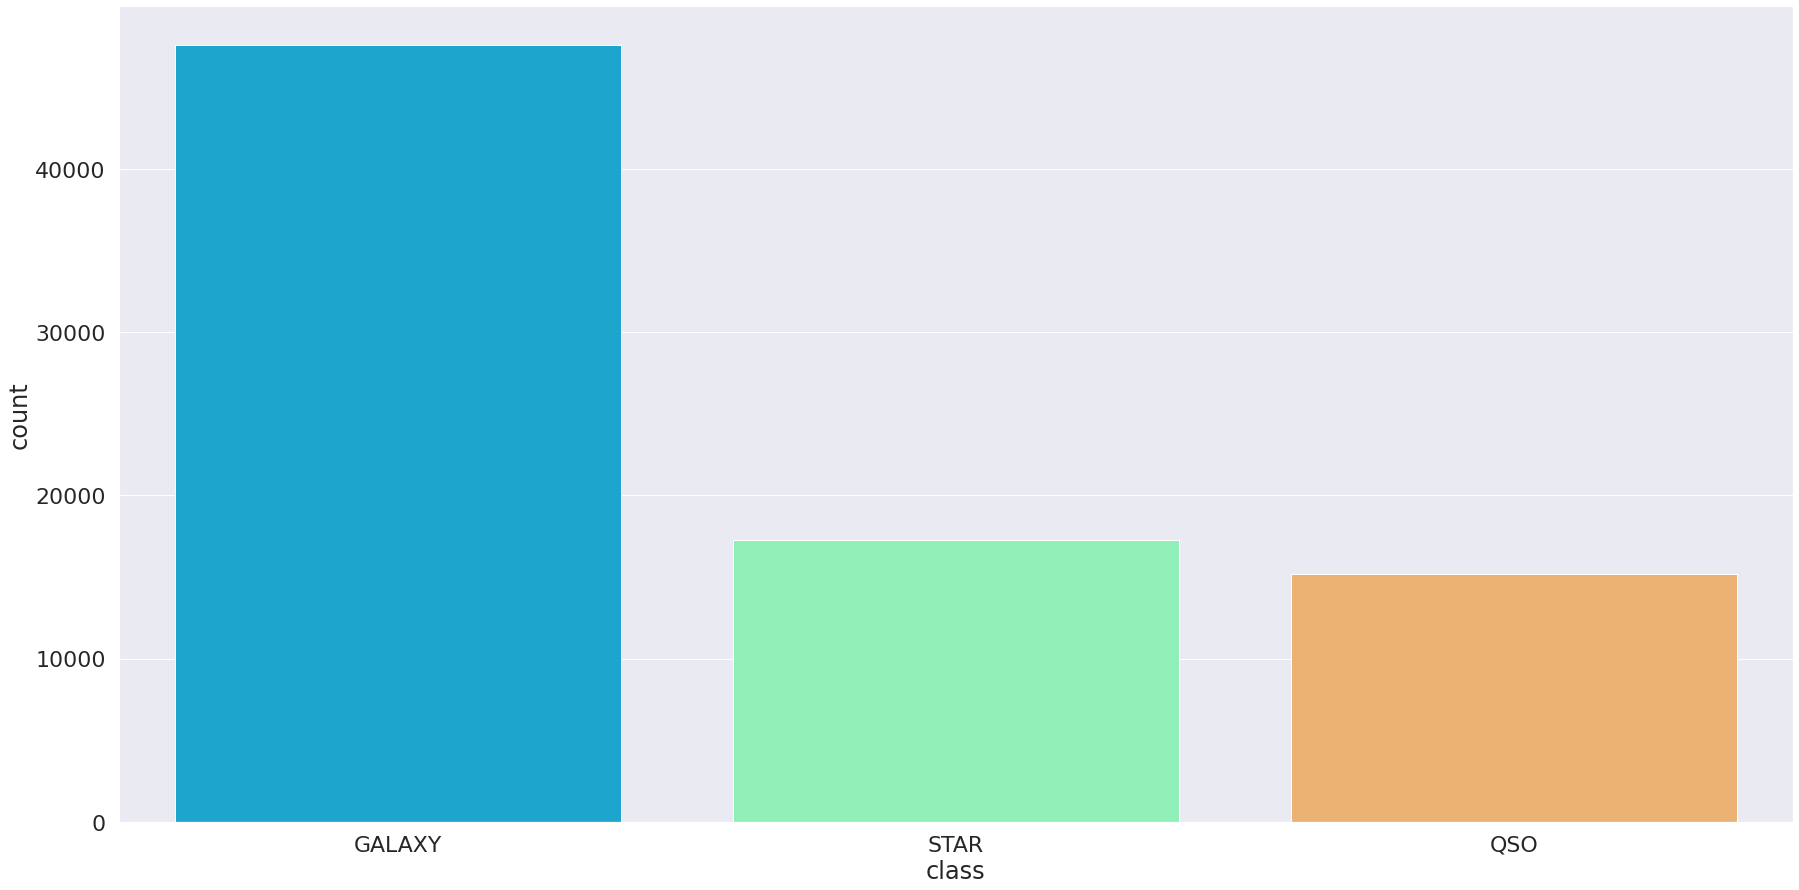

In [459]:
# bar chart showing the distance of each class object as their total count
# futher shows imbalance
# can see the order from biggest to smallest is GALAXY > STAR > QSO.
plt.figure(figsize = (30,15))
sns.set(font_scale=2)
sns.countplot(x='class', data=df_train, palette='rainbow')

In [460]:
# futher showing the sum of obersvations for each class object 

df_train['class'].value_counts()

GALAXY    47585
STAR      17251
QSO       15164
Name: class, dtype: int64

### 2.1.2 - Feature Analysis (Analysing question 3)

> 



In [461]:
""" 
  For univariate analysis on the features I used boxplots to view the estimate distribution of the features.
  This is to discover are any outliers within features.
  The outliers will be fixed in the data processing and cleaning phase.
"""
# this was one of our EDA questions we set out to analyse. (question 3)

# many outliers witin features wehre found using univariate analysis.
# and one feature will reacurring values was found.

# i made a fucntion out of this to minimise reducnacny in my code

# displays boxplot graph 
def boxplot(feature):
  plt.figure(figsize = (30,15))
  sns.set(font_scale=2)
  sns.boxplot(data=df_train, x=feature)

#### Univariate (obj_ID)

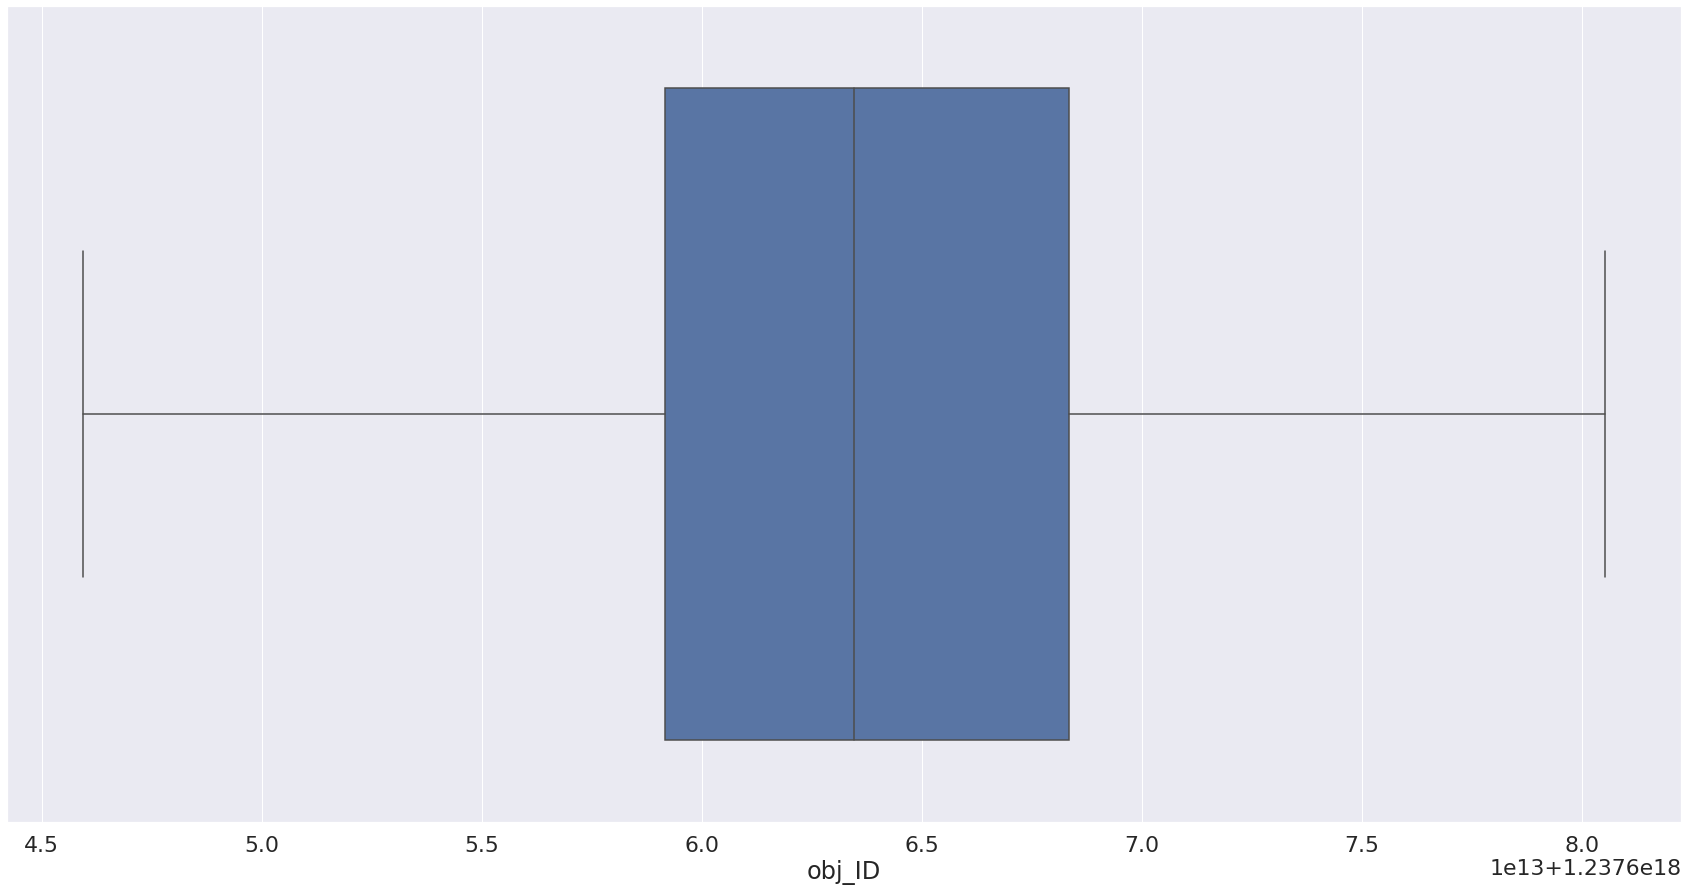

In [462]:
# no outliers found
boxplot('obj_ID')

#### Univariate (alpha)

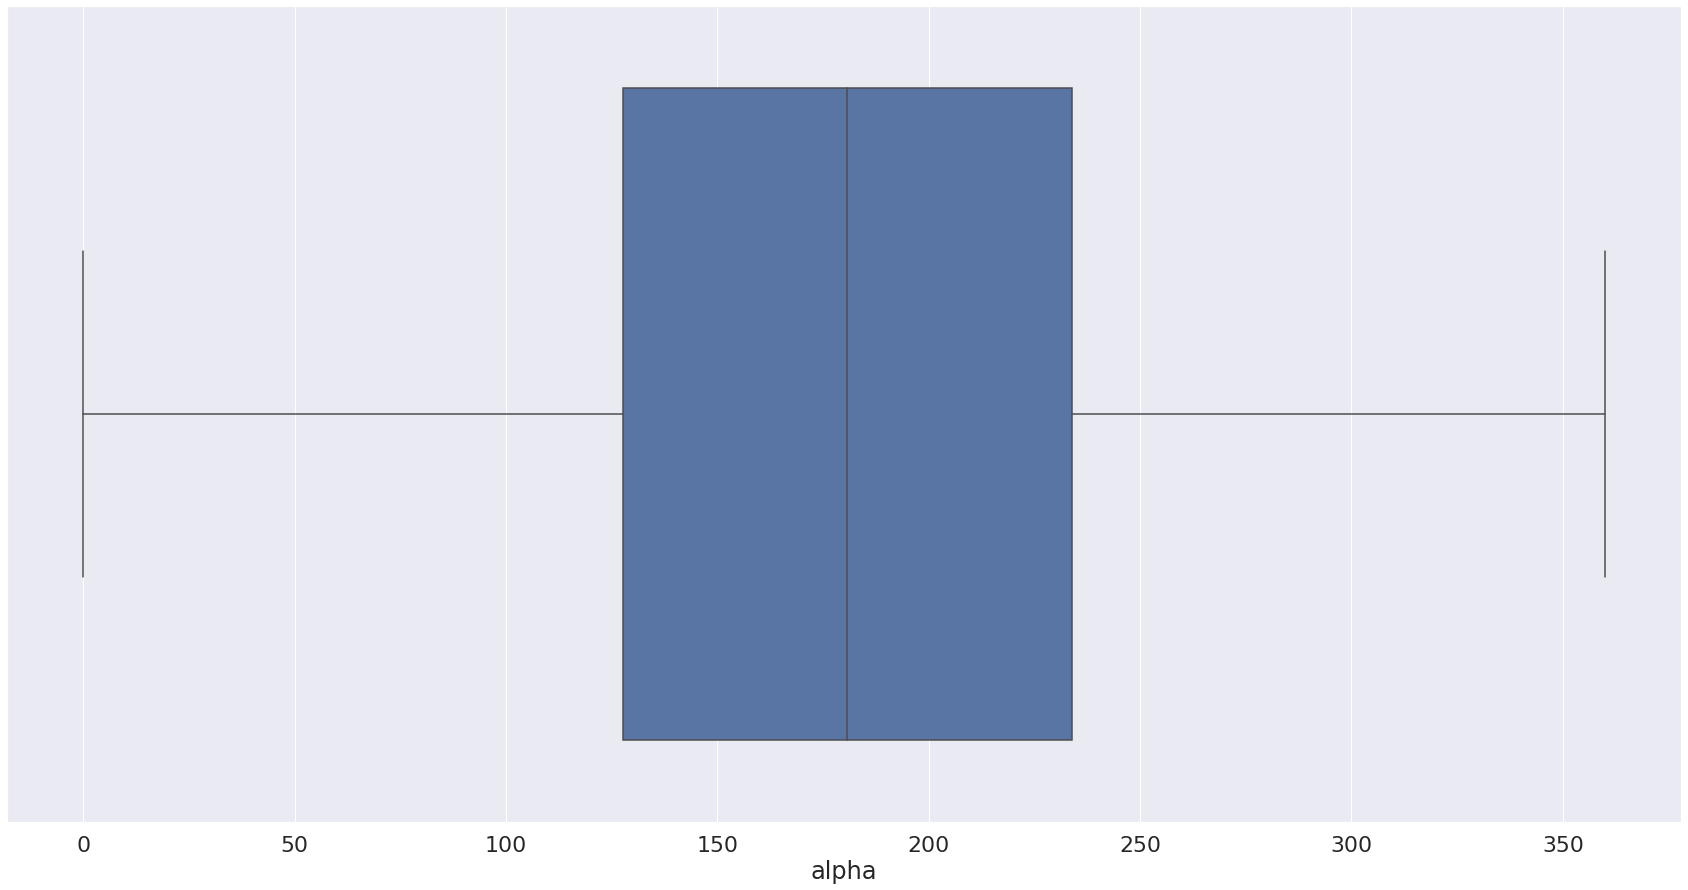

In [463]:
# no outliers found
boxplot('alpha')

#### Univariate (delta)

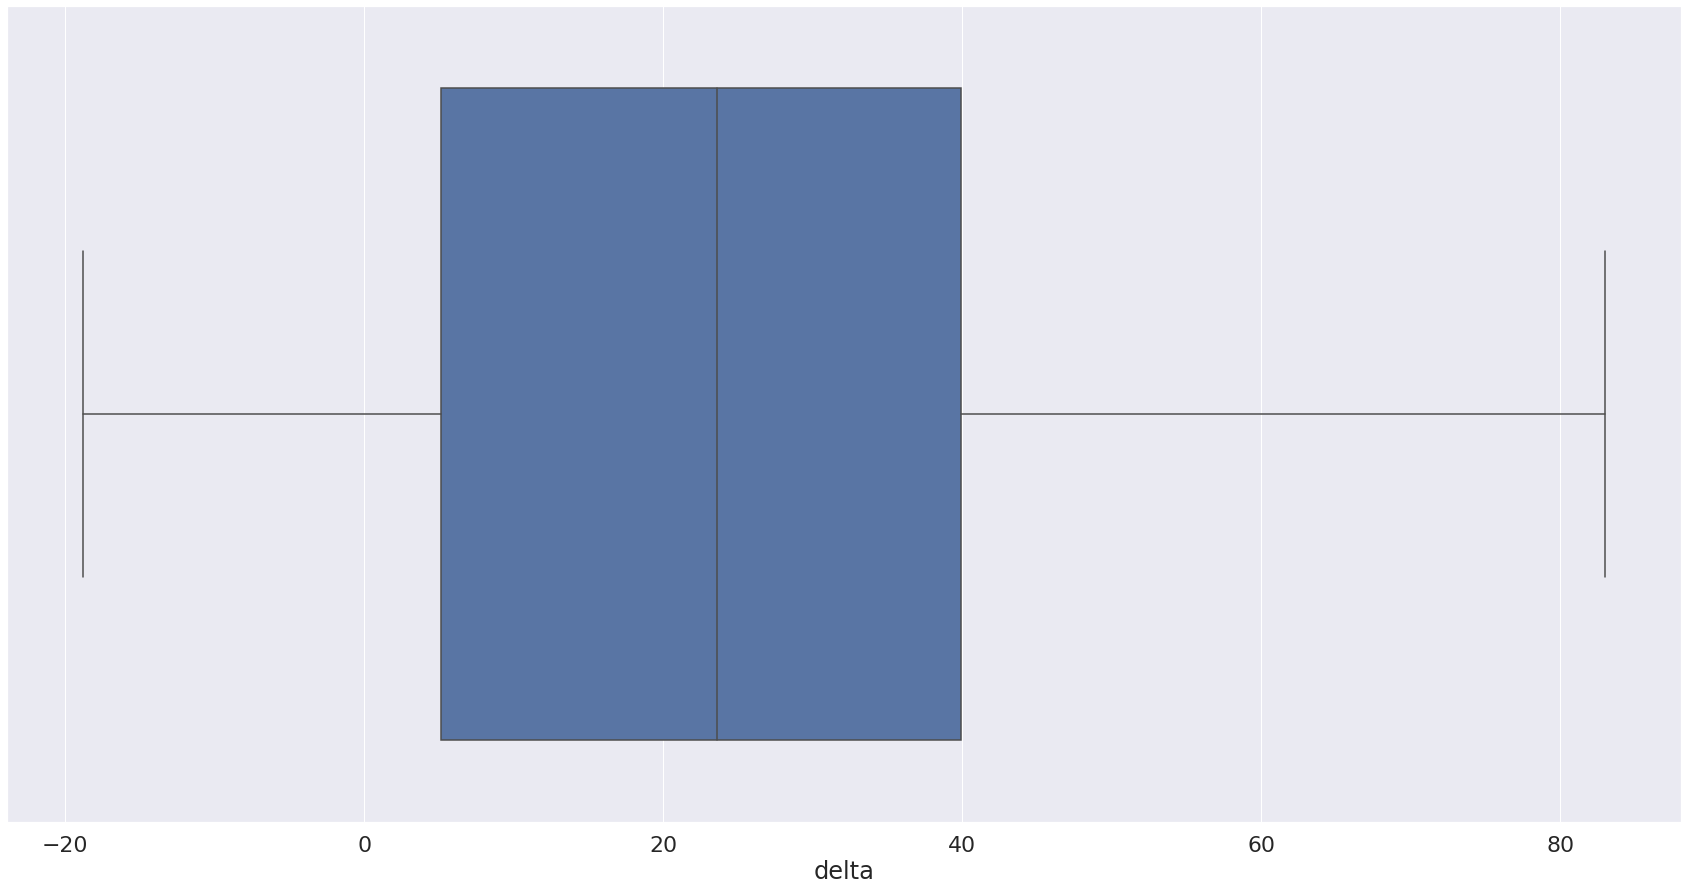

In [464]:
# no outliers found
boxplot('delta')

#### Univariate (u)

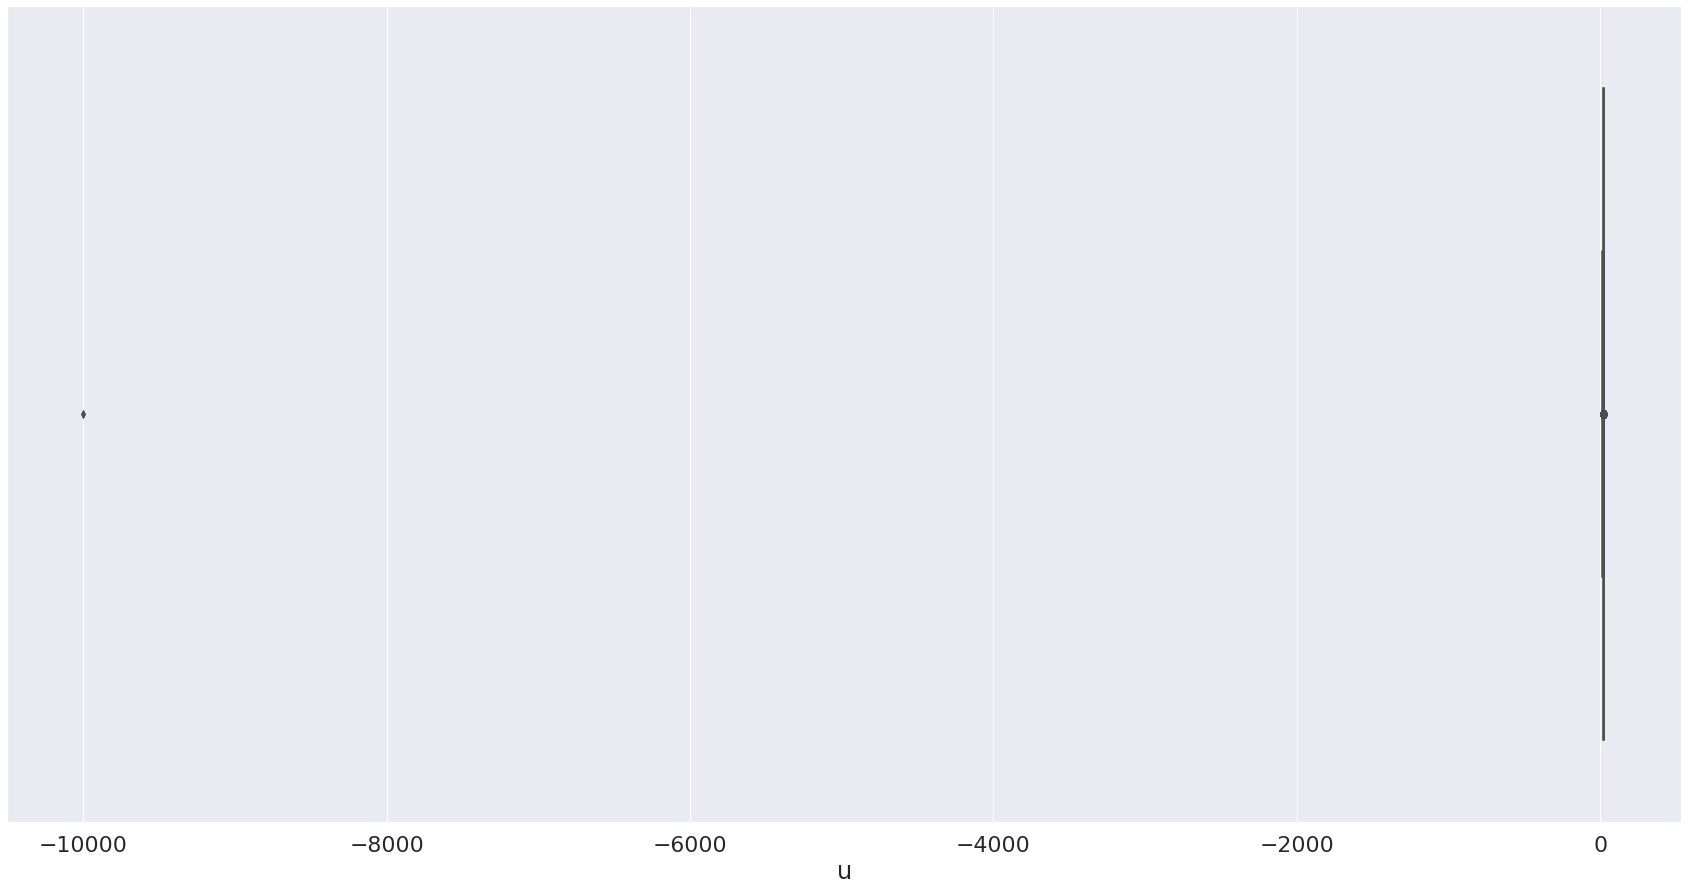

In [465]:
# outliers found on both sides
boxplot('u')

#### Univariate (g)

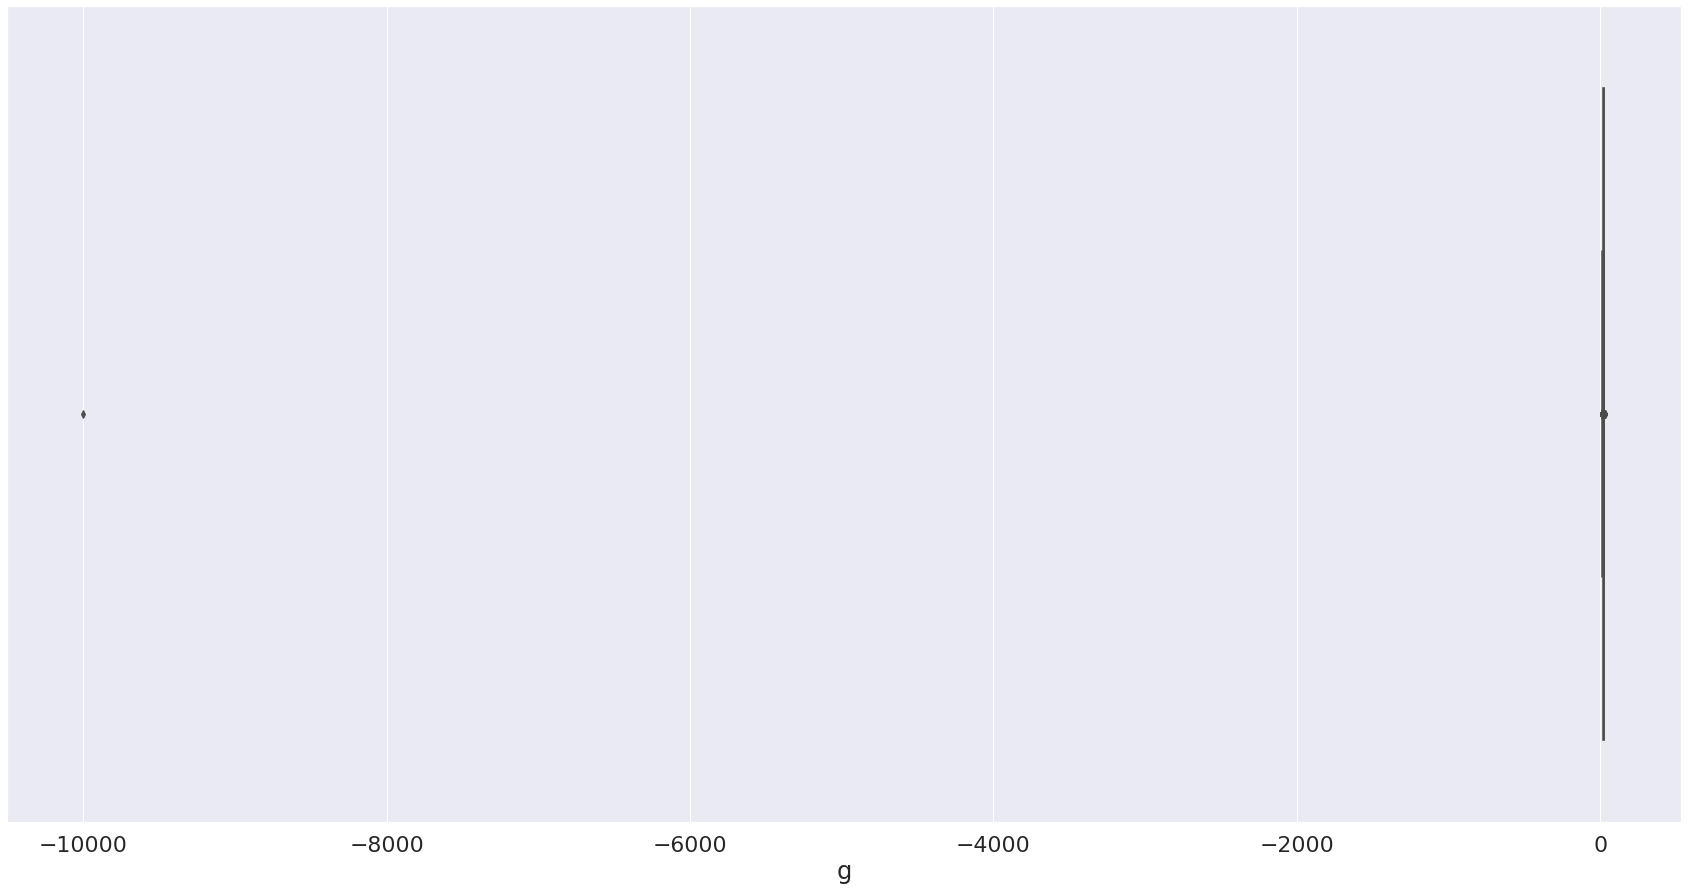

In [466]:
# outliers found on both sides
boxplot('g')

#### Univariate (r)

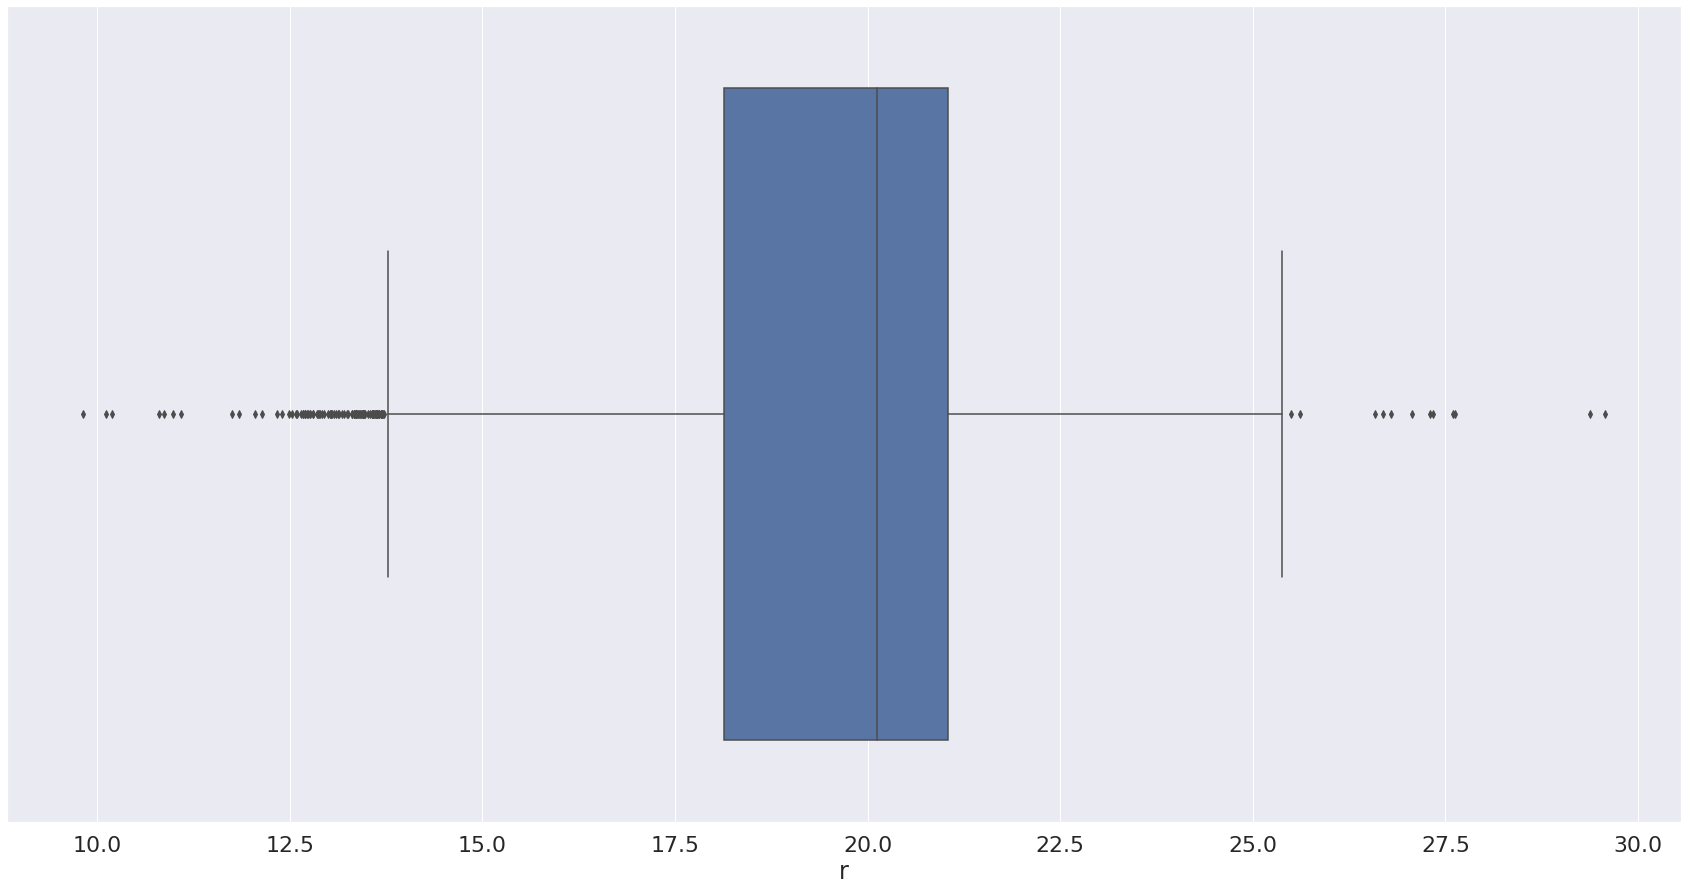

In [467]:
# outliers found on both sides
boxplot('r')

#### Univariate (i)

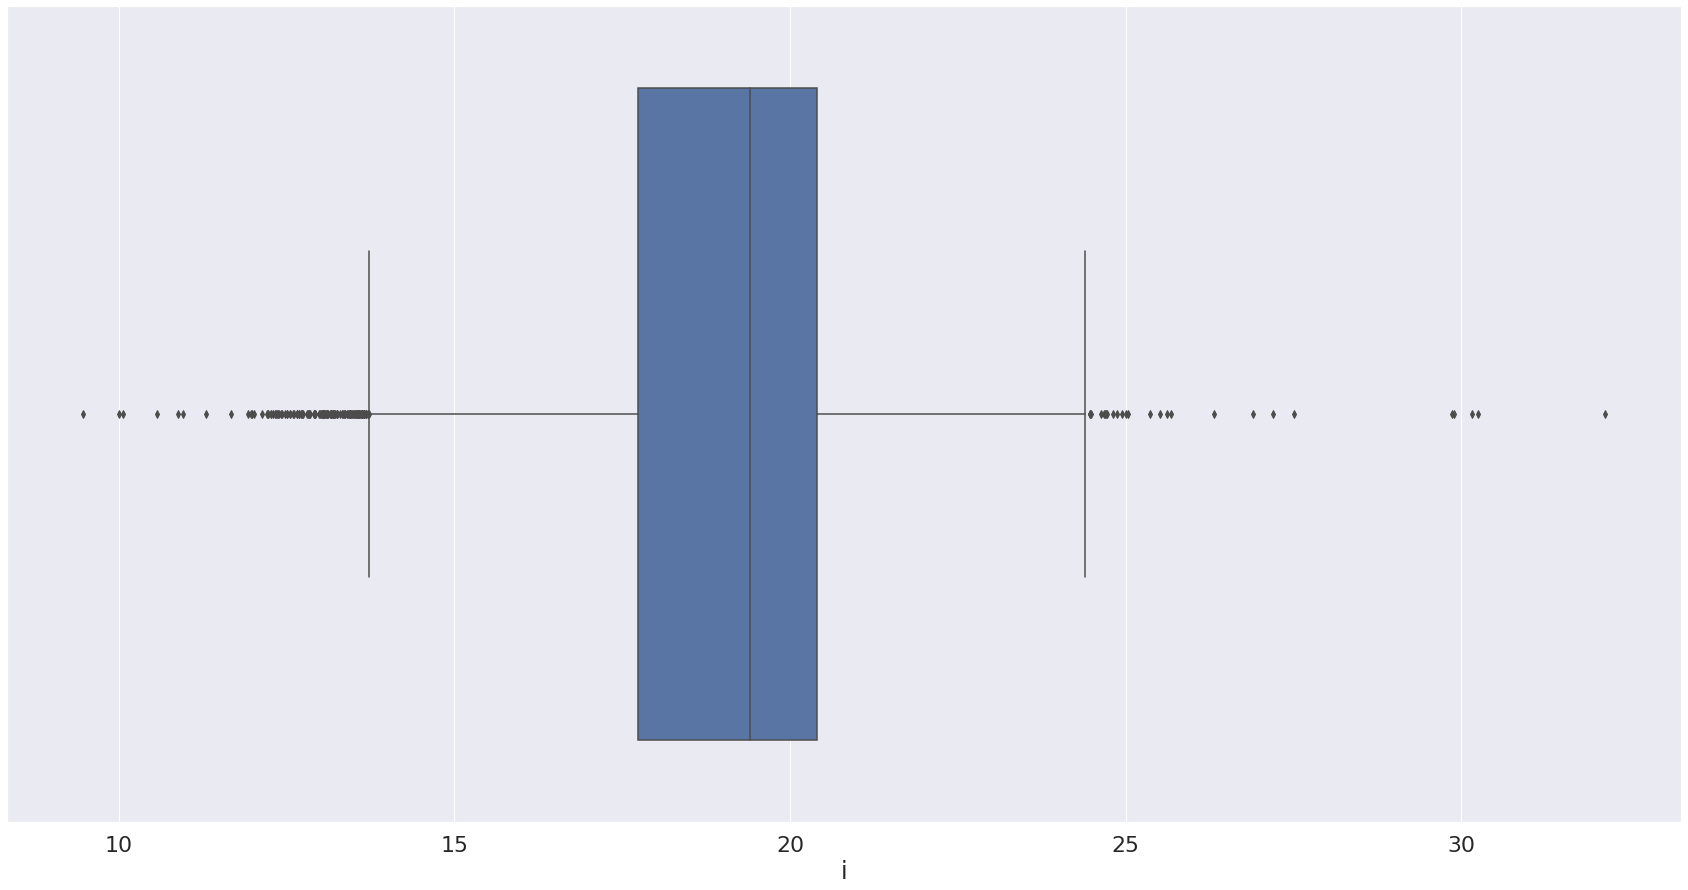

In [468]:
# outliers found on both sides
boxplot('i')

#### Univariate (z)

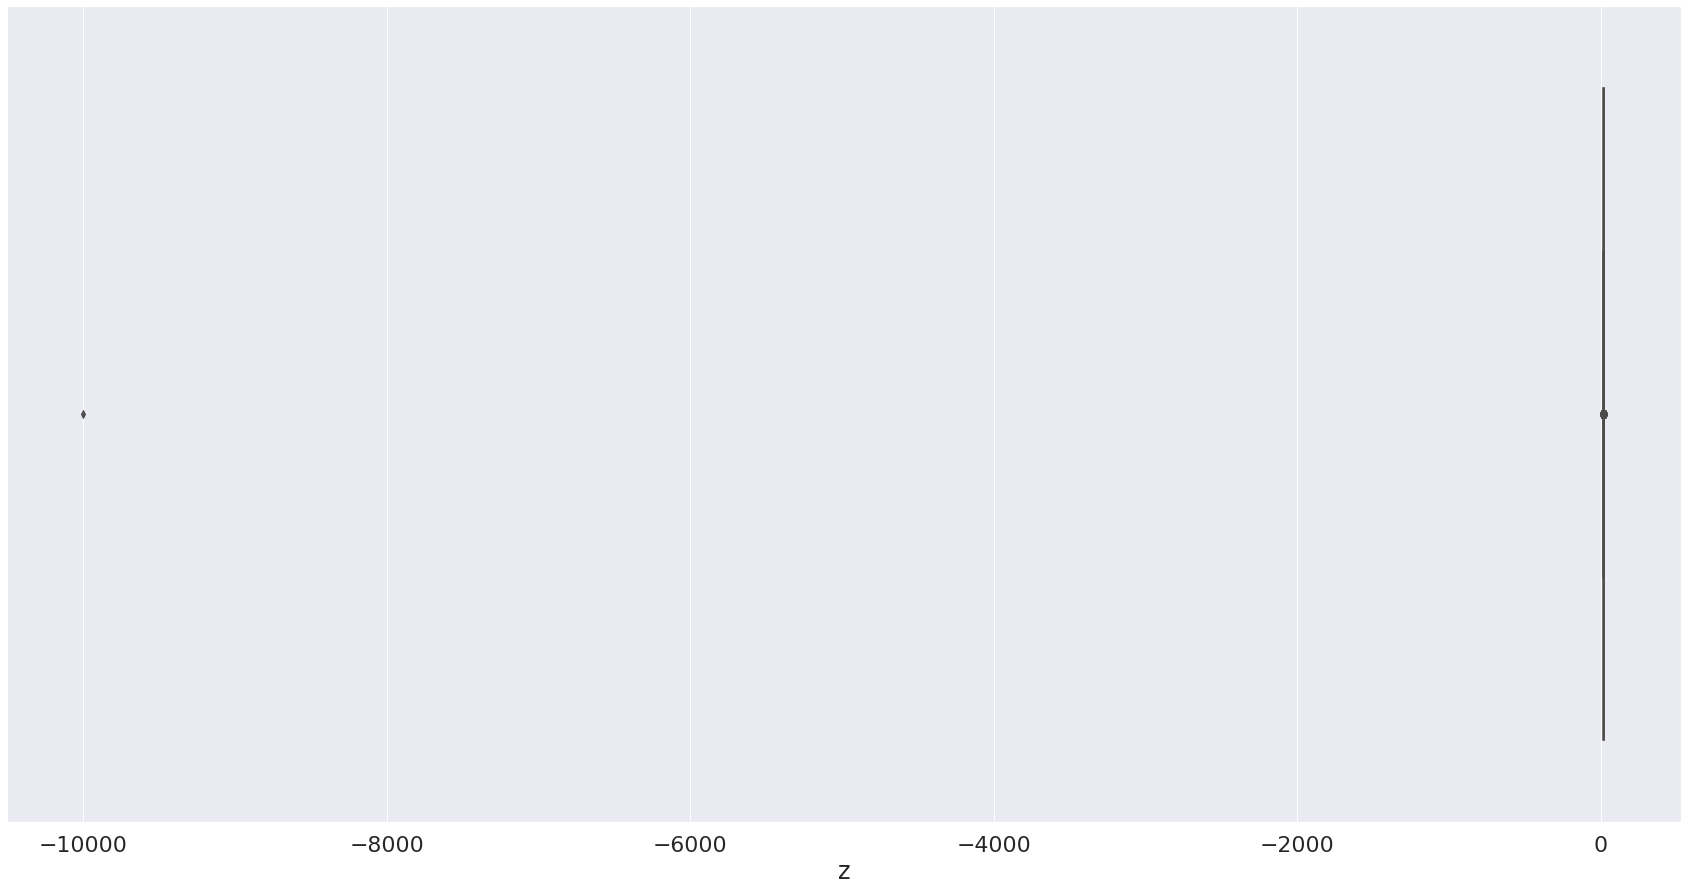

In [469]:
# outliers found on both sides
boxplot('z')

#### Univariate (run_ID)

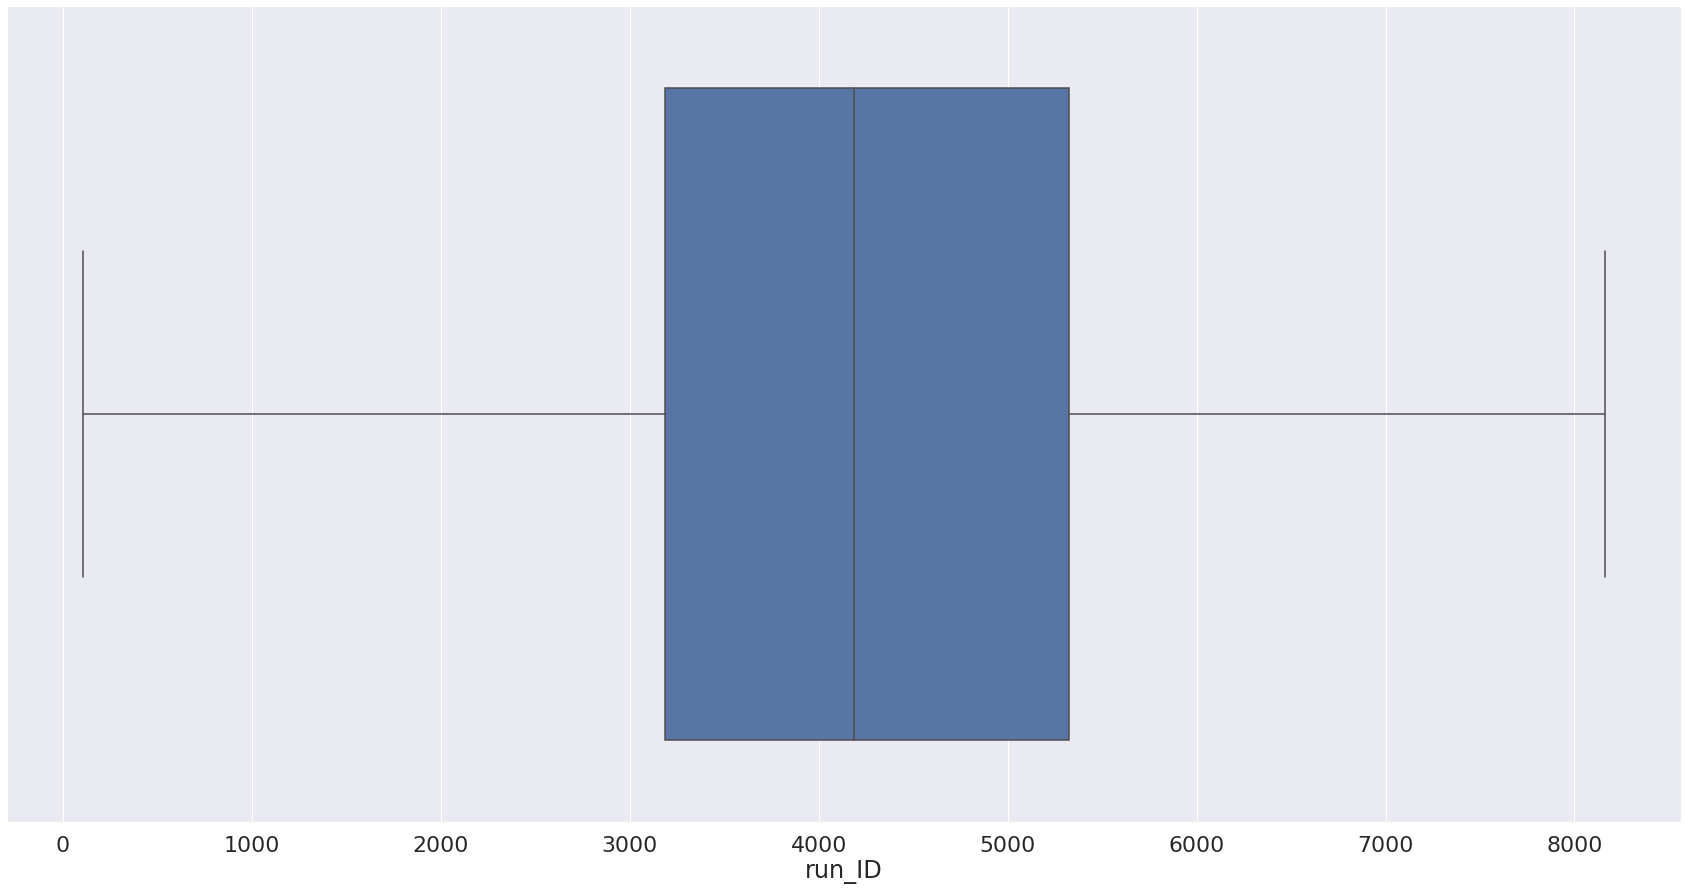

In [470]:
# no outliers found
boxplot('run_ID')

#### Univariate (rerun_ID)

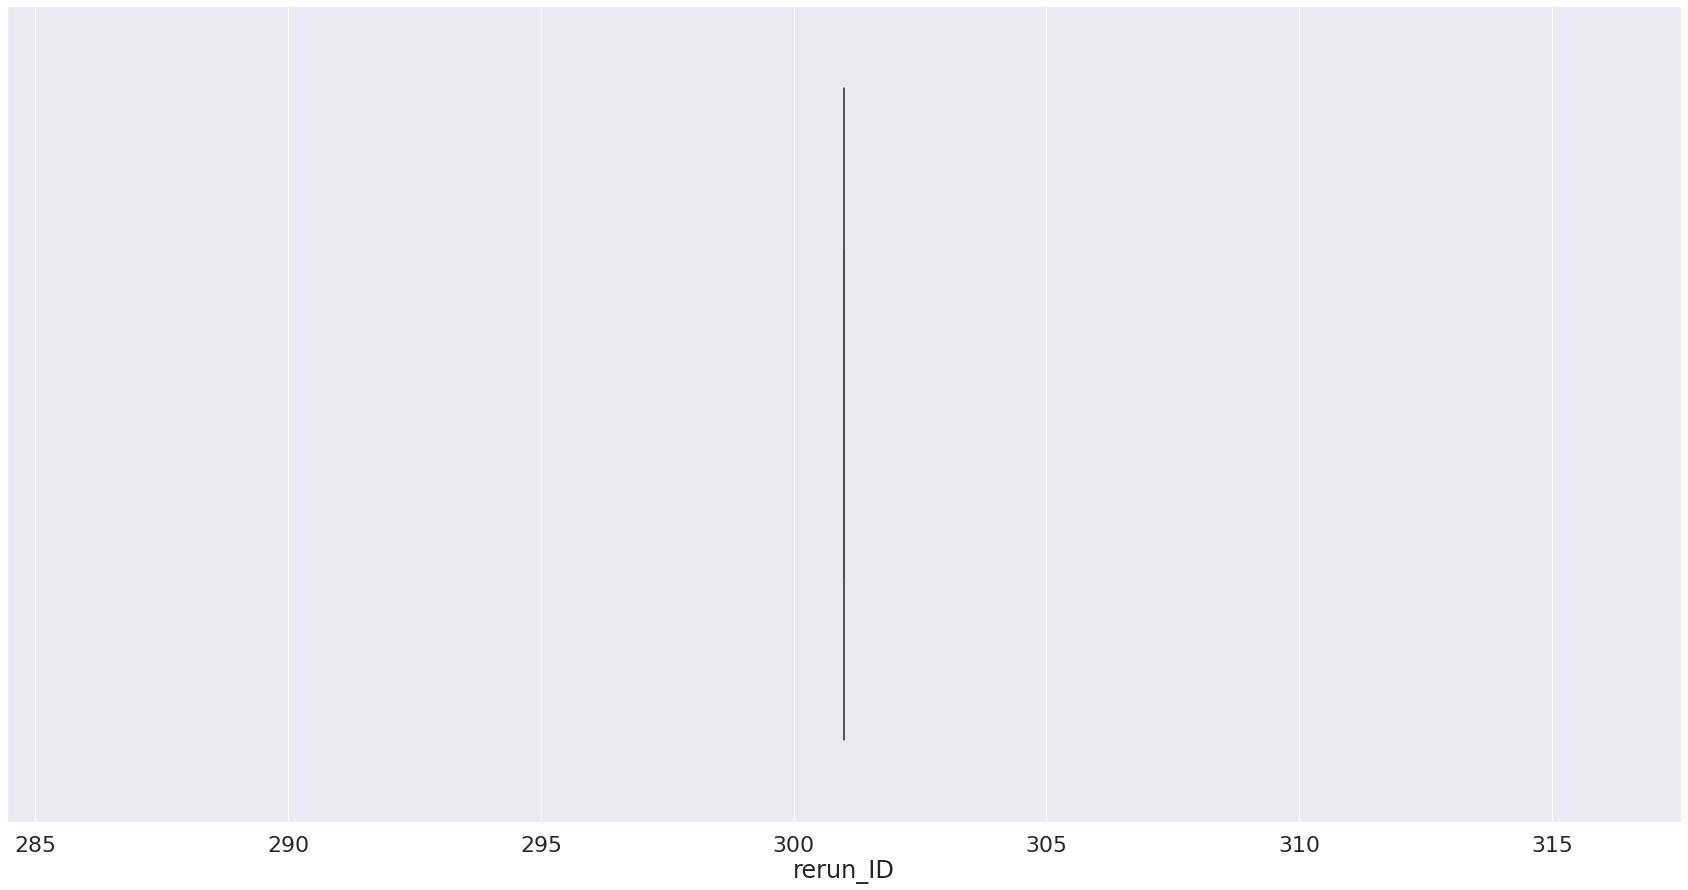

In [471]:
# no outliers found
boxplot('rerun_ID')

In [472]:
# as this featre has reacurring data, it was futher analysis.
# it shows rerun_ID only has 1 unqiue valud so all obervsations have the same value
# i will drop this feature from the dataset in the data processing and cleaning phase
df_train.nunique()

obj_ID         65004
alpha          80000
delta          80000
u              75882
g              75303
r              74795
i              74779
z              74779
run_ID           426
rerun_ID           1
cam_col            6
field_ID         849
spec_obj_ID    80000
redshift       79474
plate           6234
MJD             2176
fiber_ID        1000
class              3
dtype: int64

#### Univariate (cam_col)

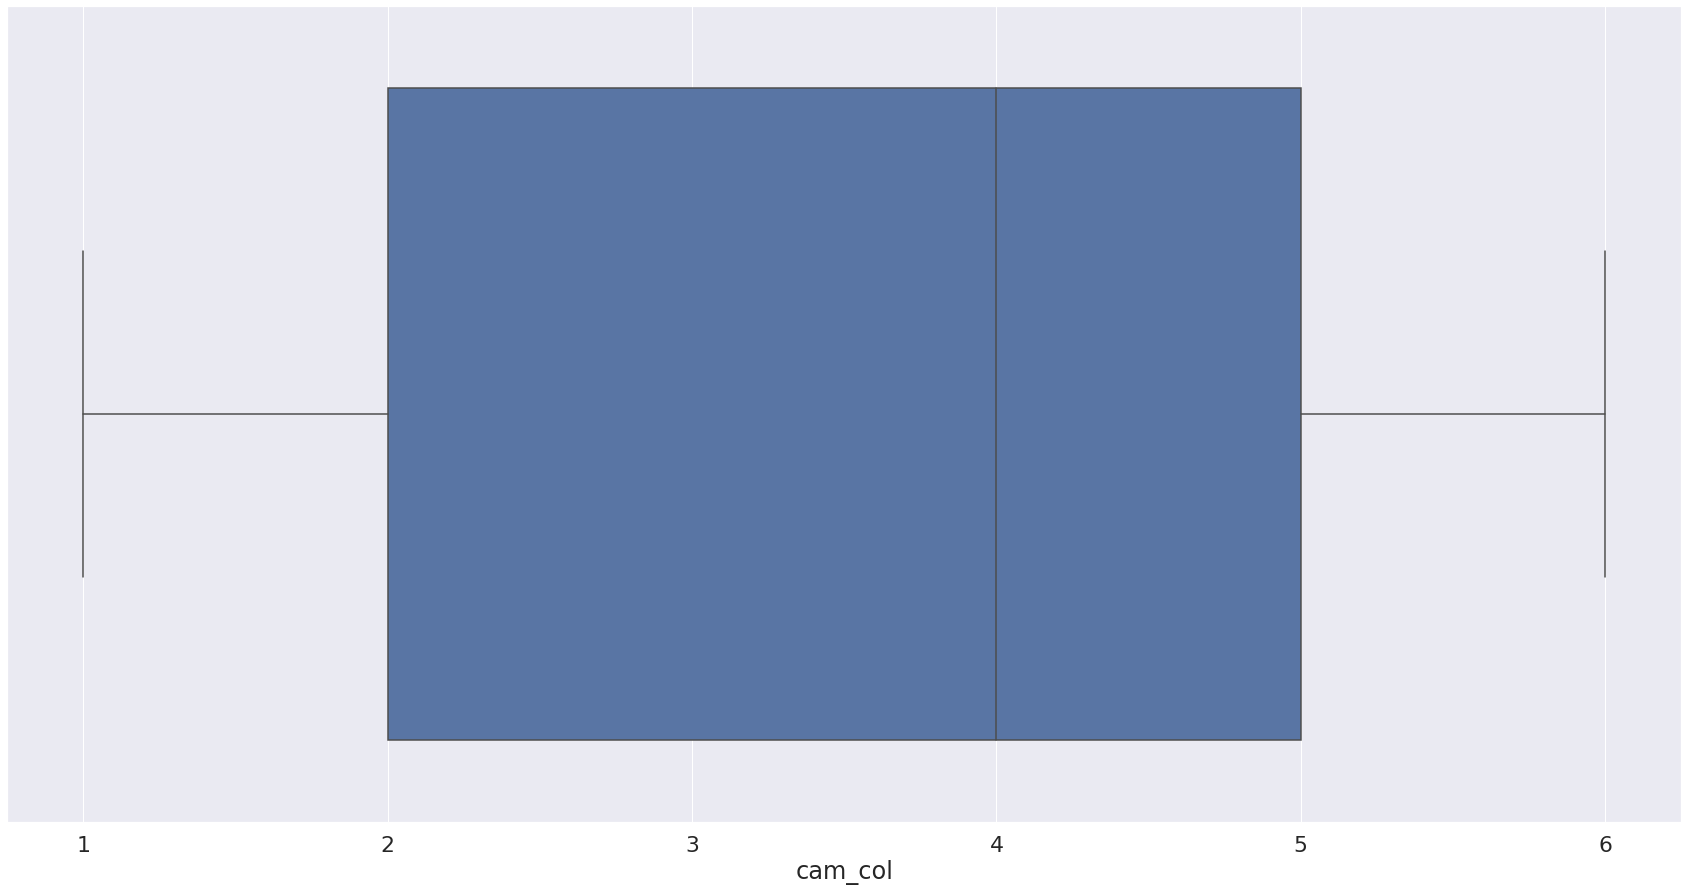

In [473]:
# no outliers found
boxplot('cam_col')

#### Univariate (field_ID)

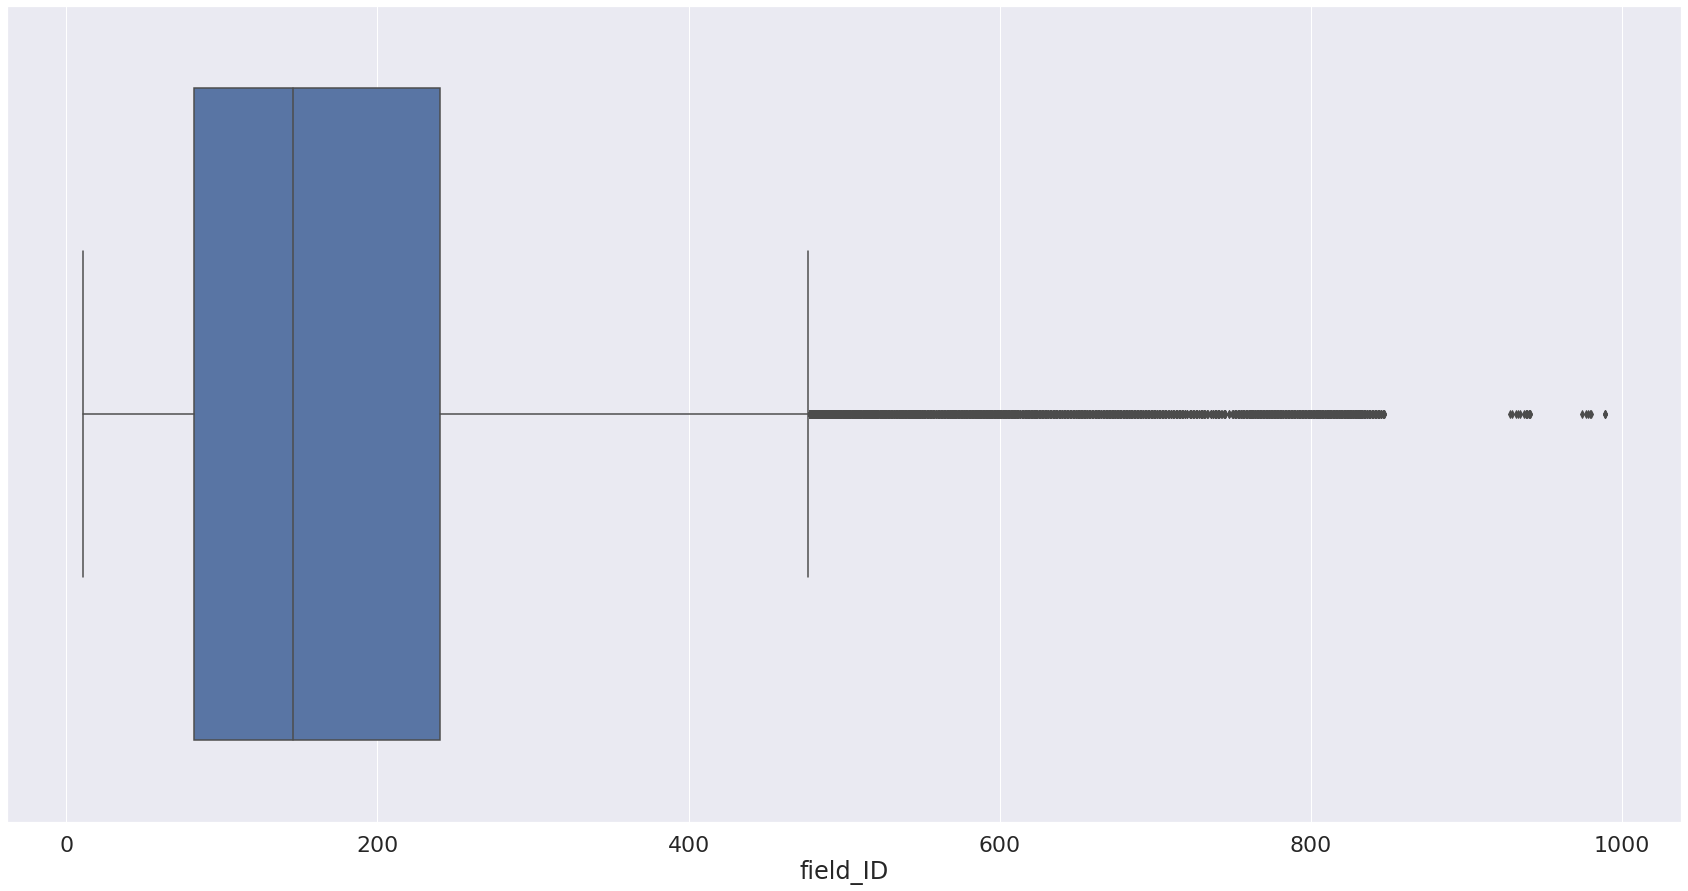

In [474]:
# outliers found on right side
boxplot('field_ID')

#### Univariate (spec_obj_ID)

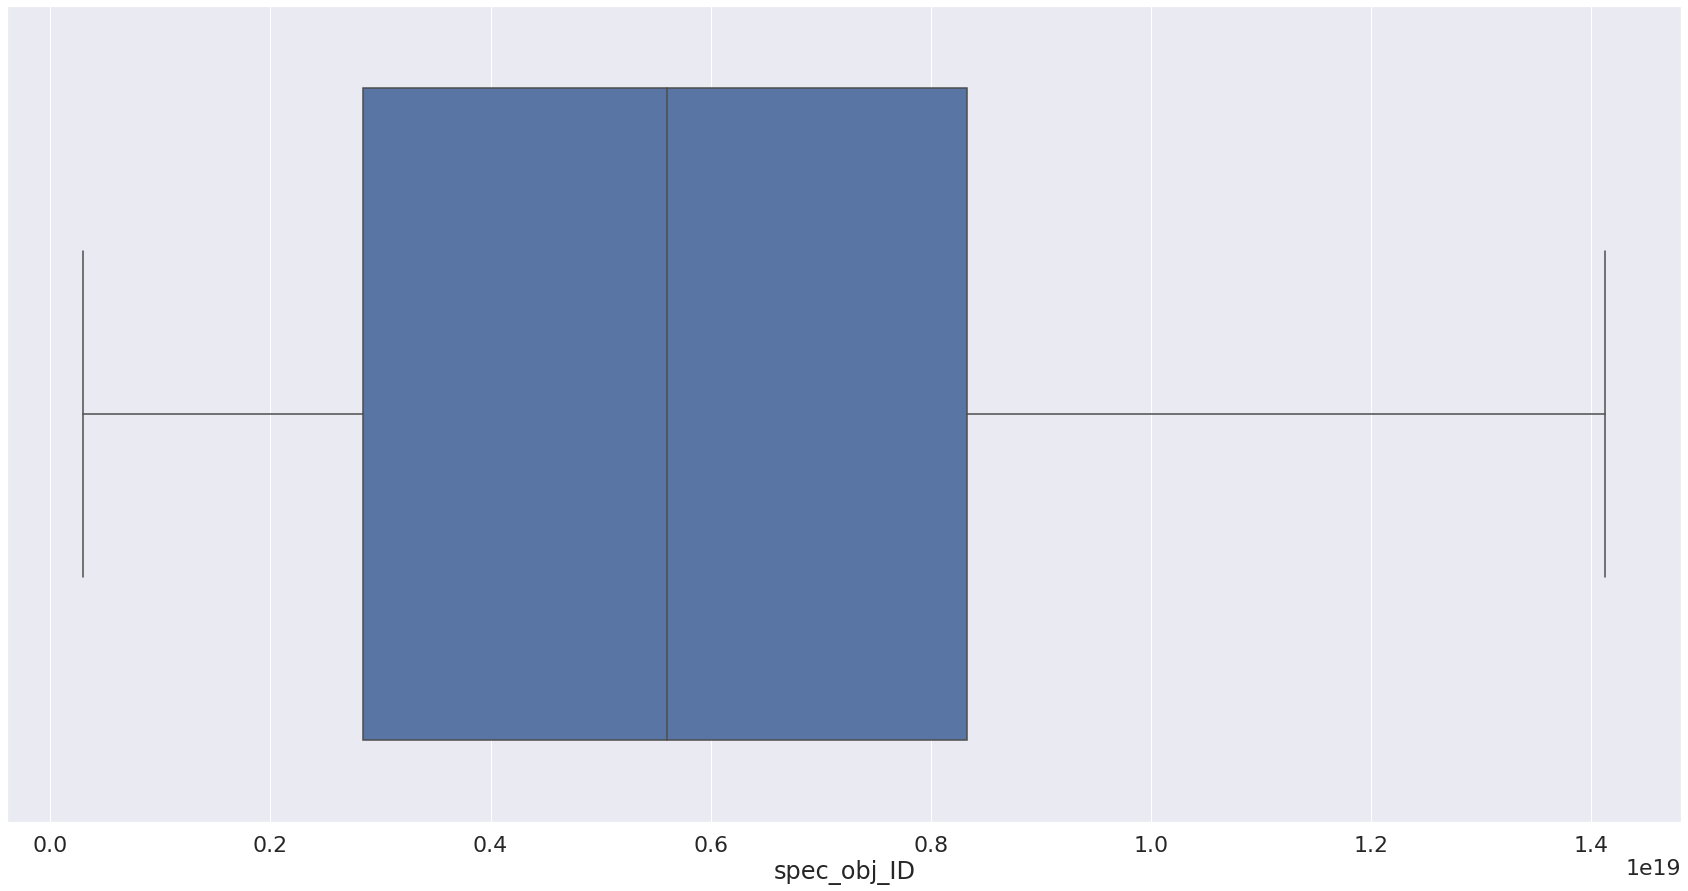

In [475]:
# no outliers found
boxplot('spec_obj_ID')

#### Univariate (redshift)

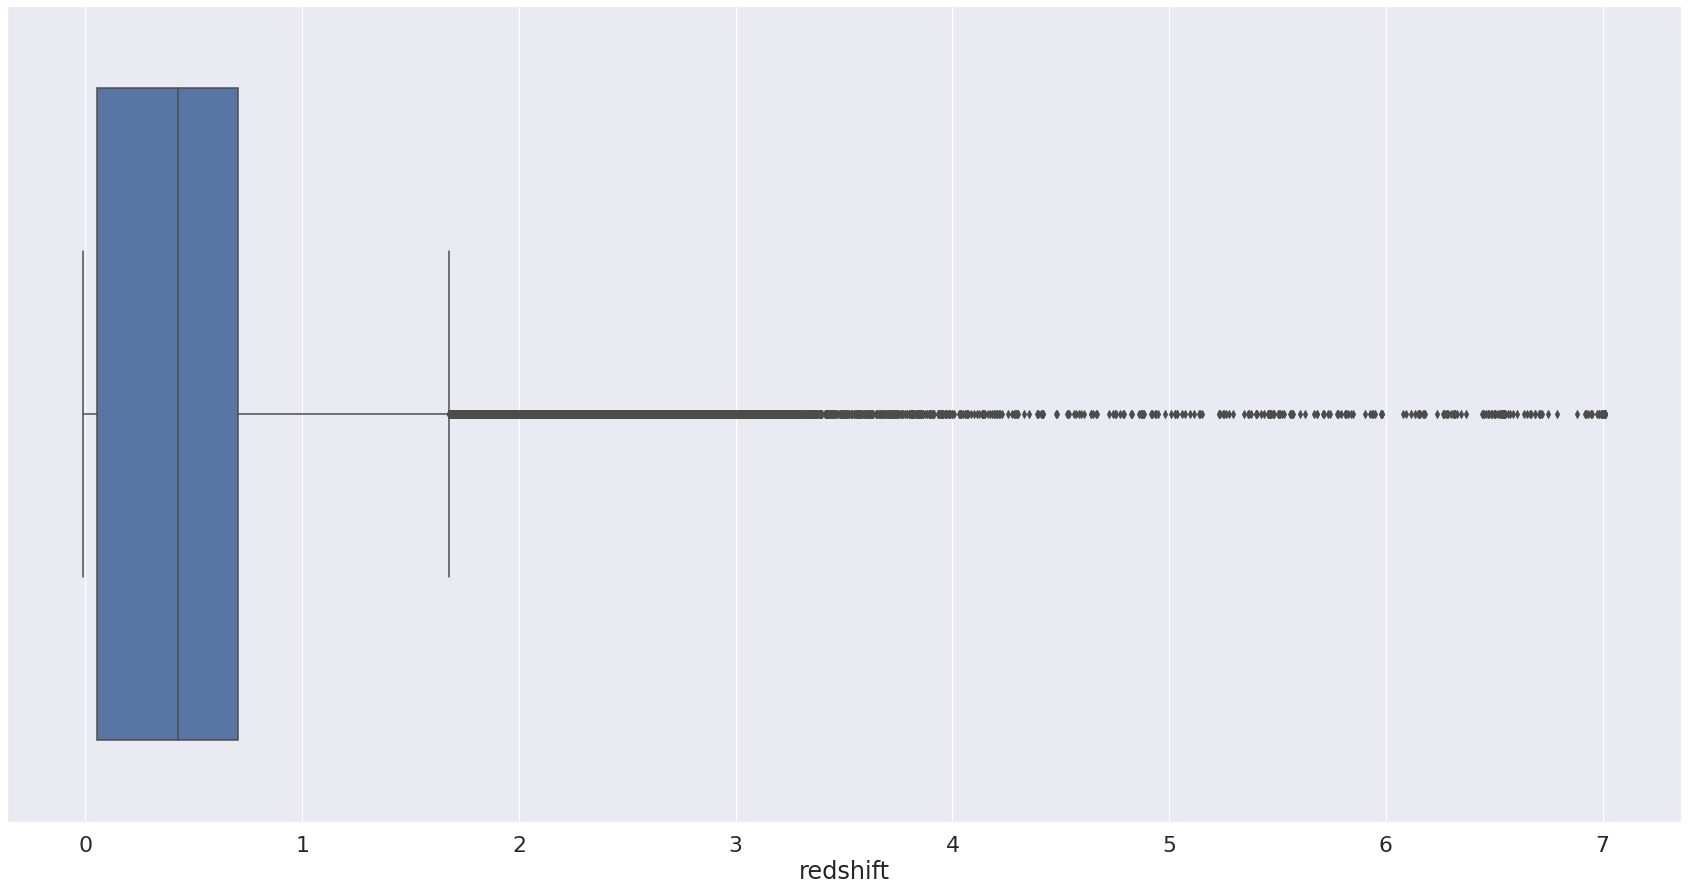

In [476]:
# outliers found on right side
boxplot('redshift')

#### Univariate (plate)

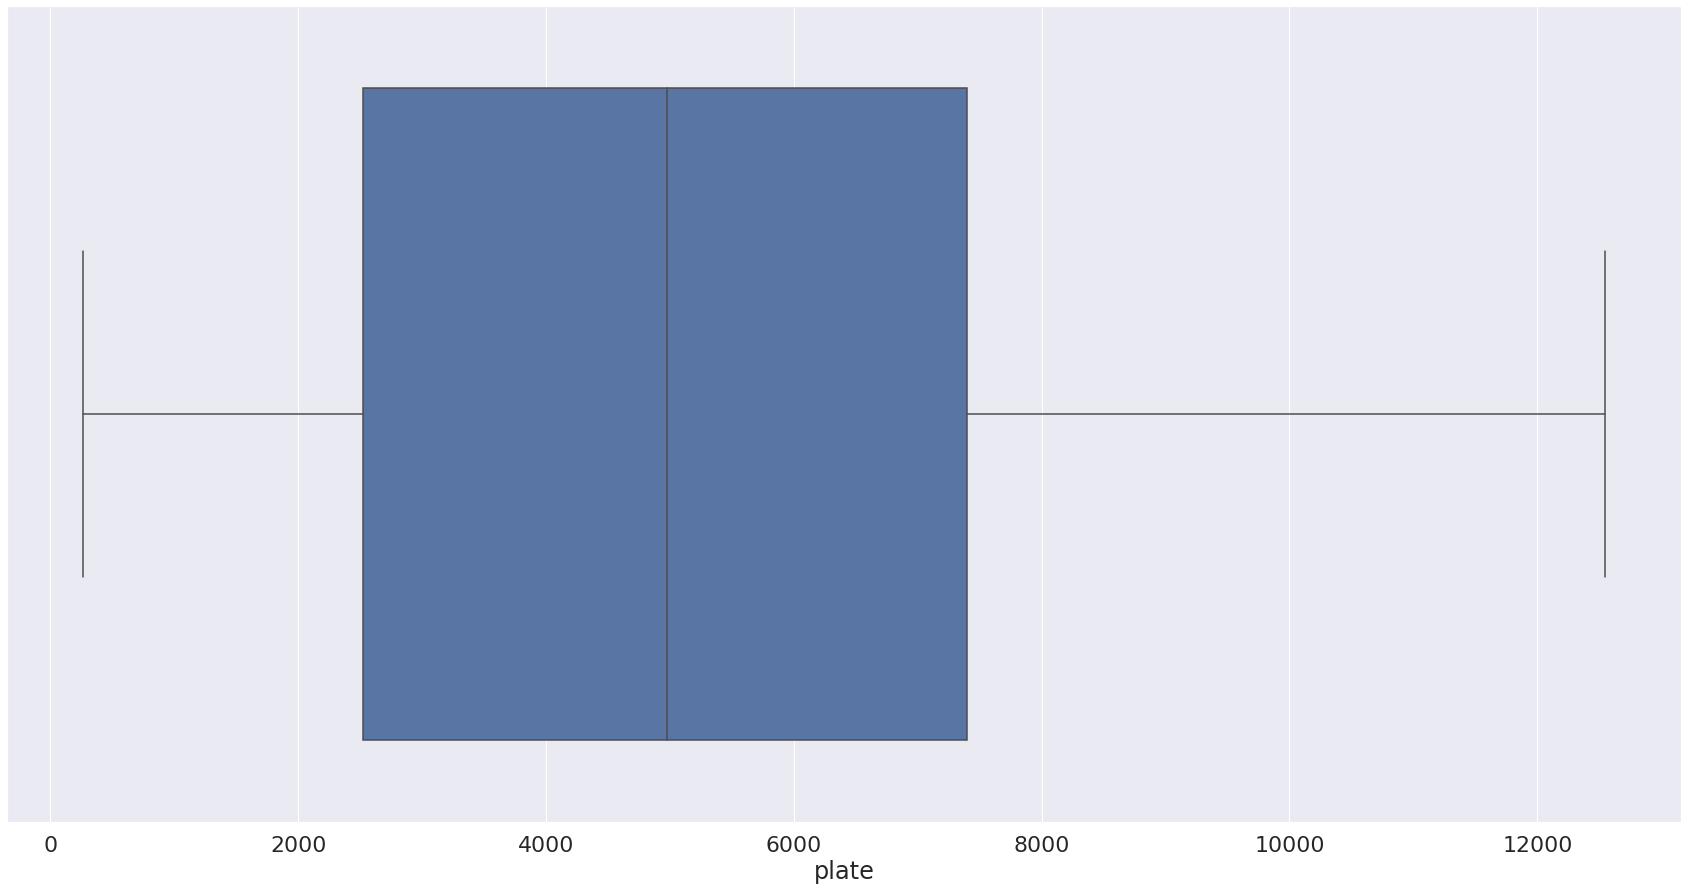

In [477]:
# no outliers found
boxplot('plate')

#### Univariate (MJD)

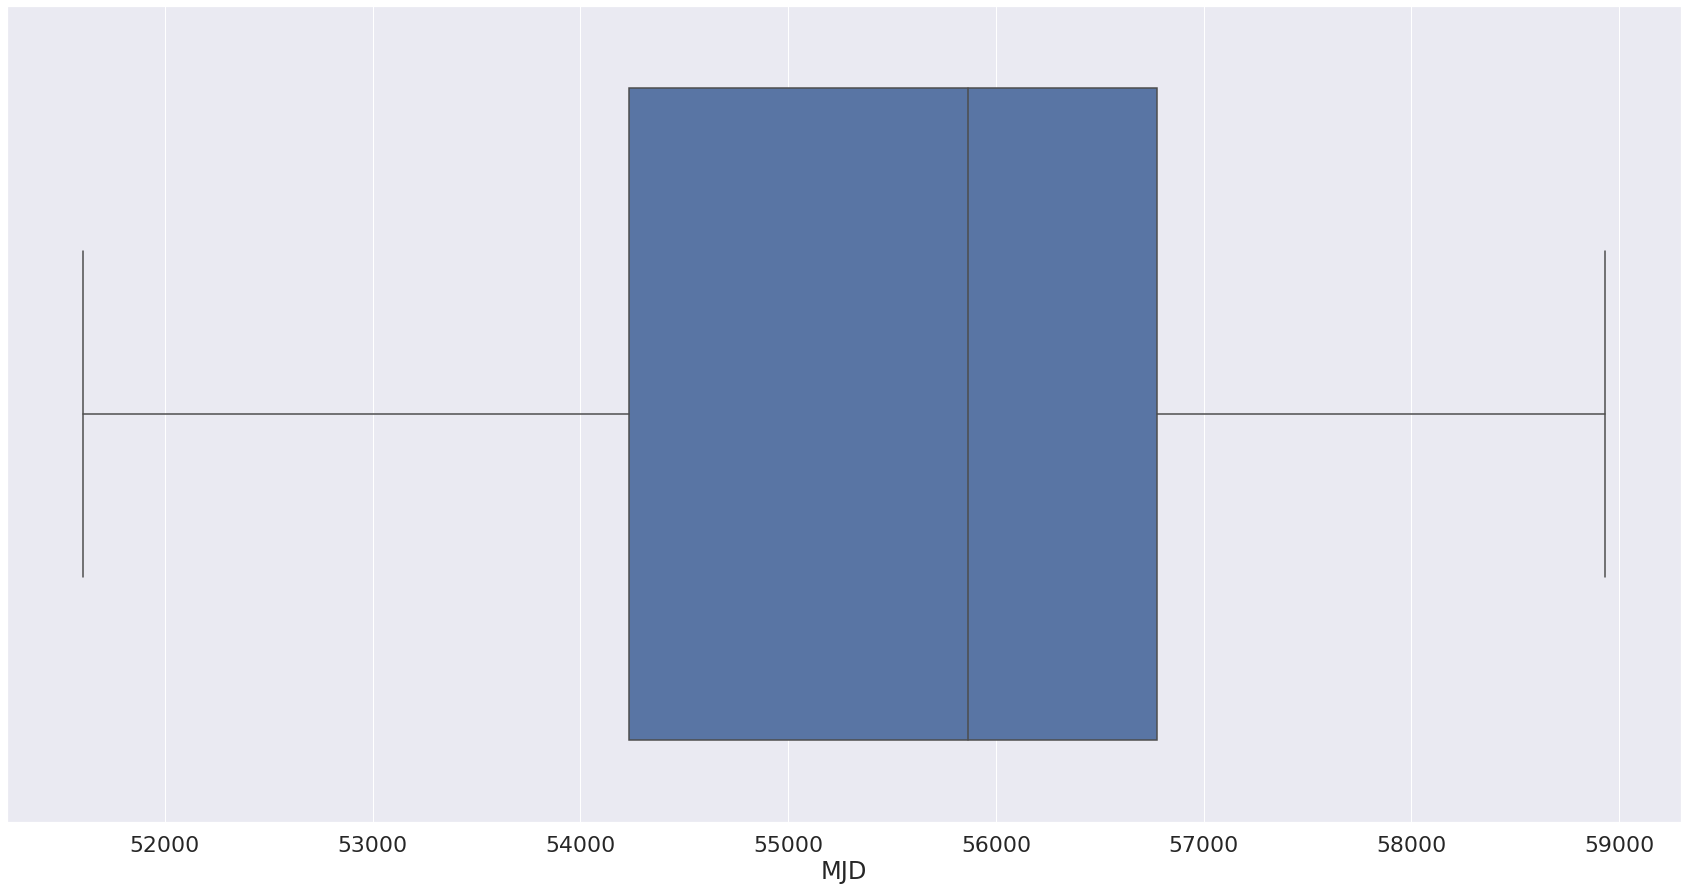

In [478]:
# no outliers found
boxplot('MJD')

#### Univariate (fiber_ID)

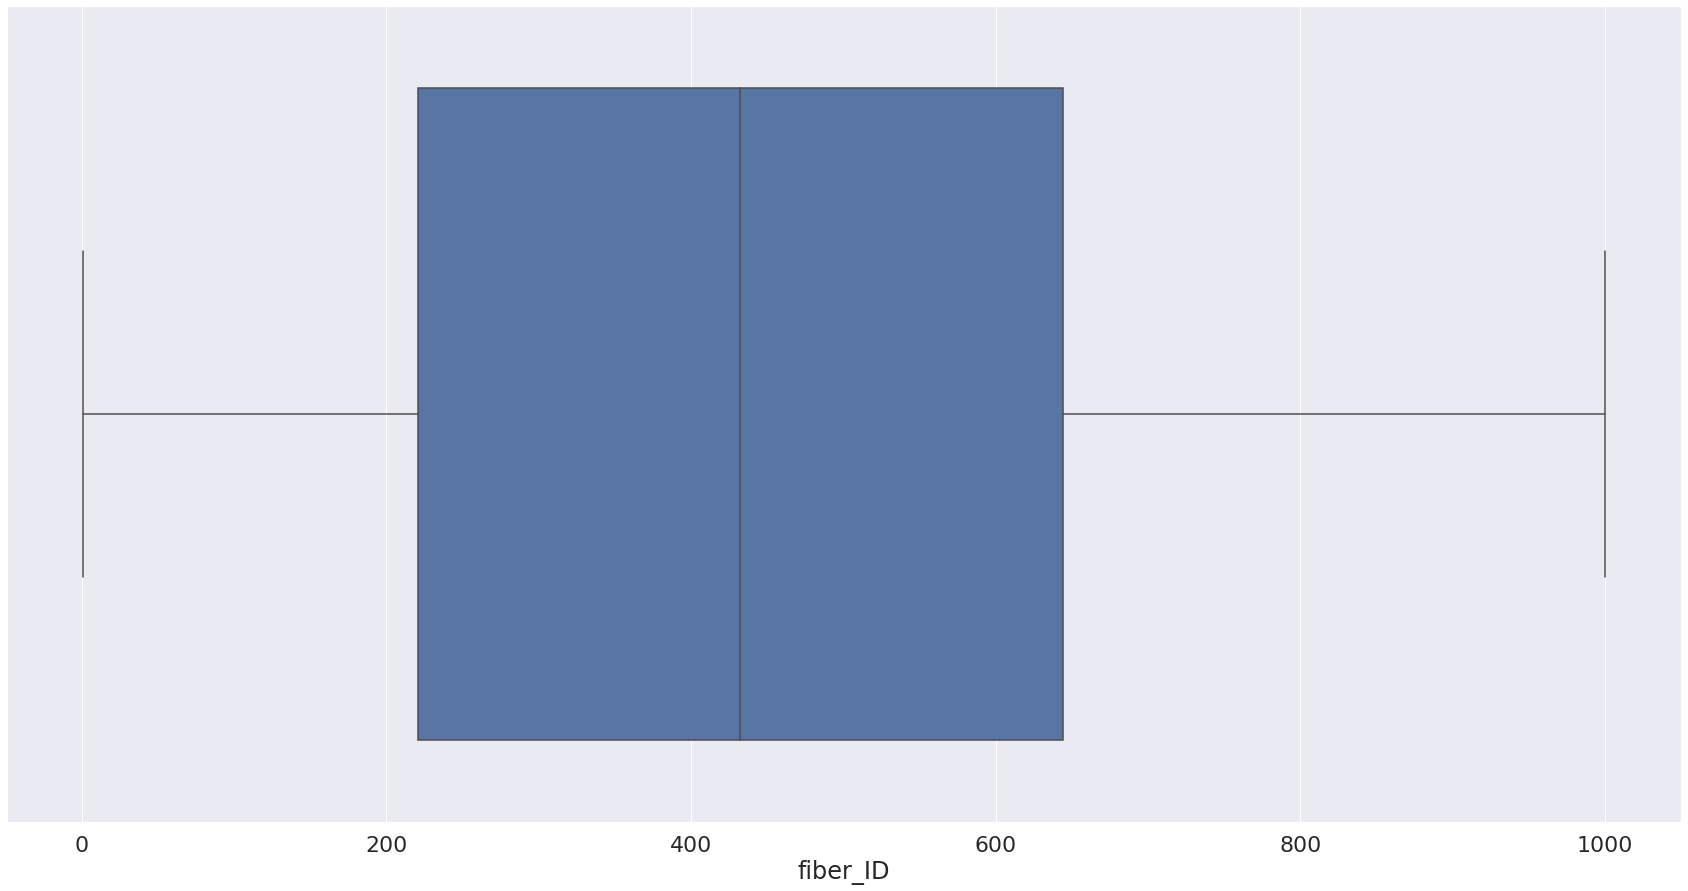

In [479]:
# no outliers found
boxplot('fiber_ID')

### 2.1.3 - Target Variable and Feature Analysis (Analysing question 4)

> 



In [480]:
# https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/

""" 
  For multivariate analysis on the features and target variables, I used kdeplots estimate distribution of the features between each 3 classes.
  This is to see if the features is has no correlation to the target class.
  If so these features must be dropped, they are useless and cause multicollinearity within our model as the data is too similar for each class.
  Features will be dropped in the data processing and cleaning phase.
"""
# this was one of our EDA questions we set out to analyse.(question 4 and 5)

# I had to convert each class type to a unqiue index for this graph to work
df_train['class'].replace([0], 'GALAXY', inplace=True)
df_train['class'].replace([1], 'QSO', inplace=True)
df_train['class'].replace([2], 'STAR', inplace=True)

def kdeplot(feature):
  plt.figure(figsize = (30,15))
  sns.set(font_scale=2)
  sns.kdeplot(data=np.log(df_train.loc[(df_train['class']=='GALAXY'), feature]), label='GALAXY')
  sns.kdeplot(data=np.log(df_train.loc[(df_train['class']=='QSO'), feature]), label='QSO')
  sns.kdeplot(data=np.log(df_train.loc[(df_train['class']=='STAR'), feature]), label='STAR')
  plt.legend()


#### Univariate (obj_ID)

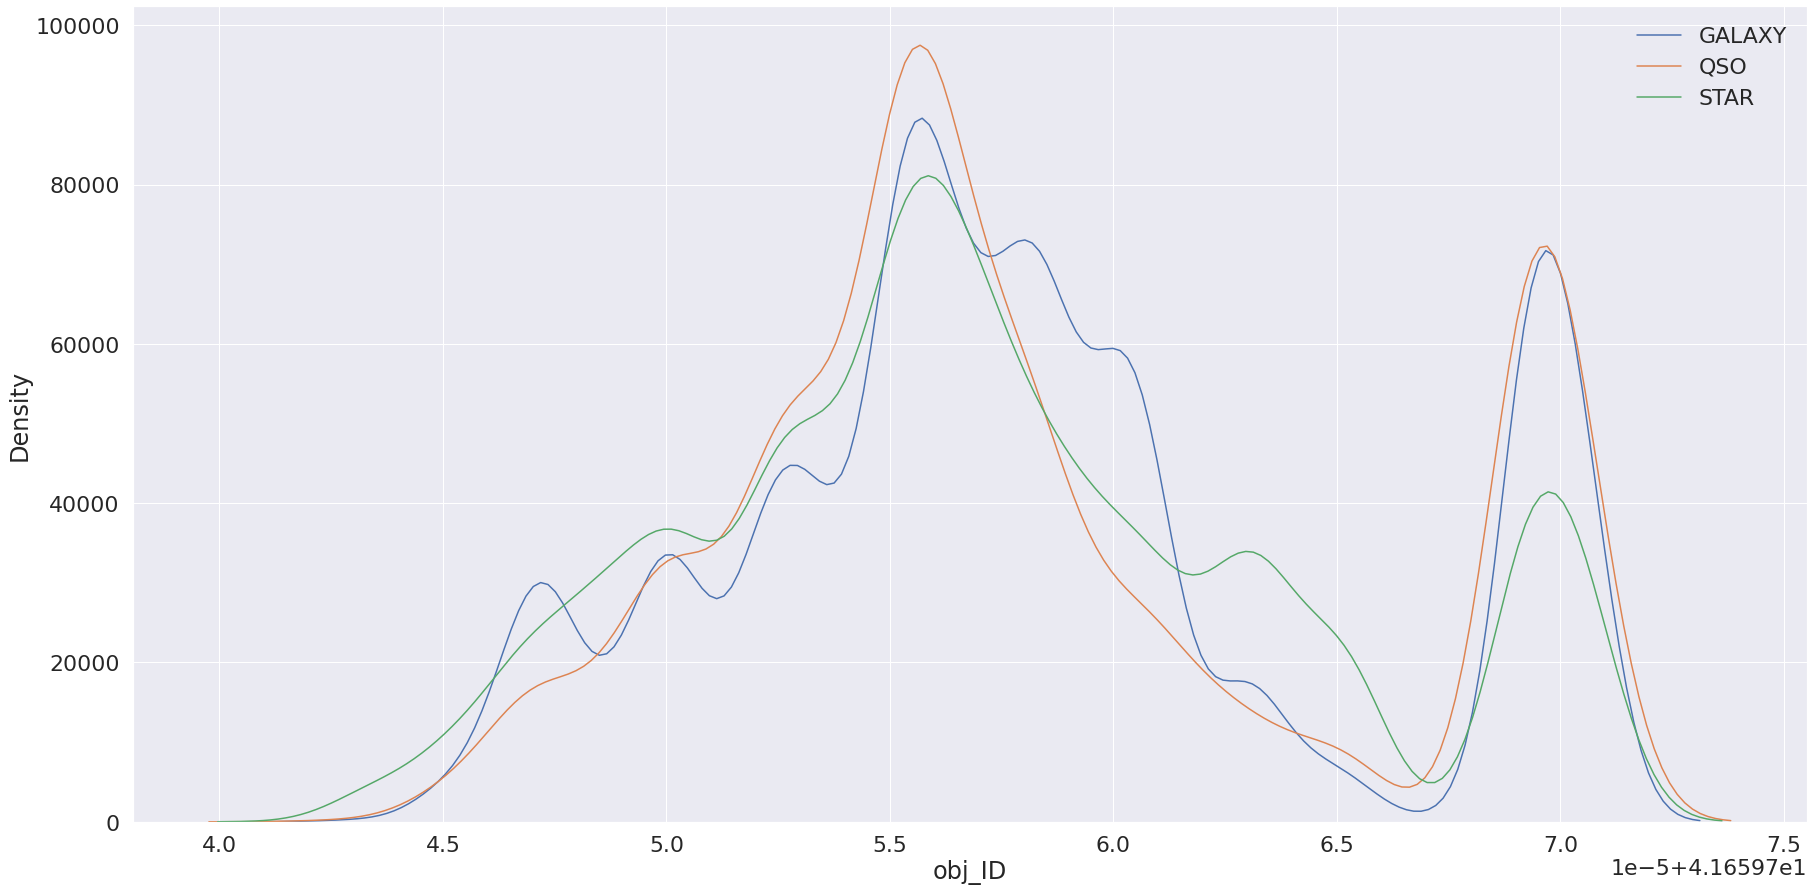

In [481]:
# graph shows that corlation is too similar with this feature for each class, no correlation to the target class.
# this will be no use in the model be cause of multicollinearity 
kdeplot('obj_ID')

#### Univariate (alpha)

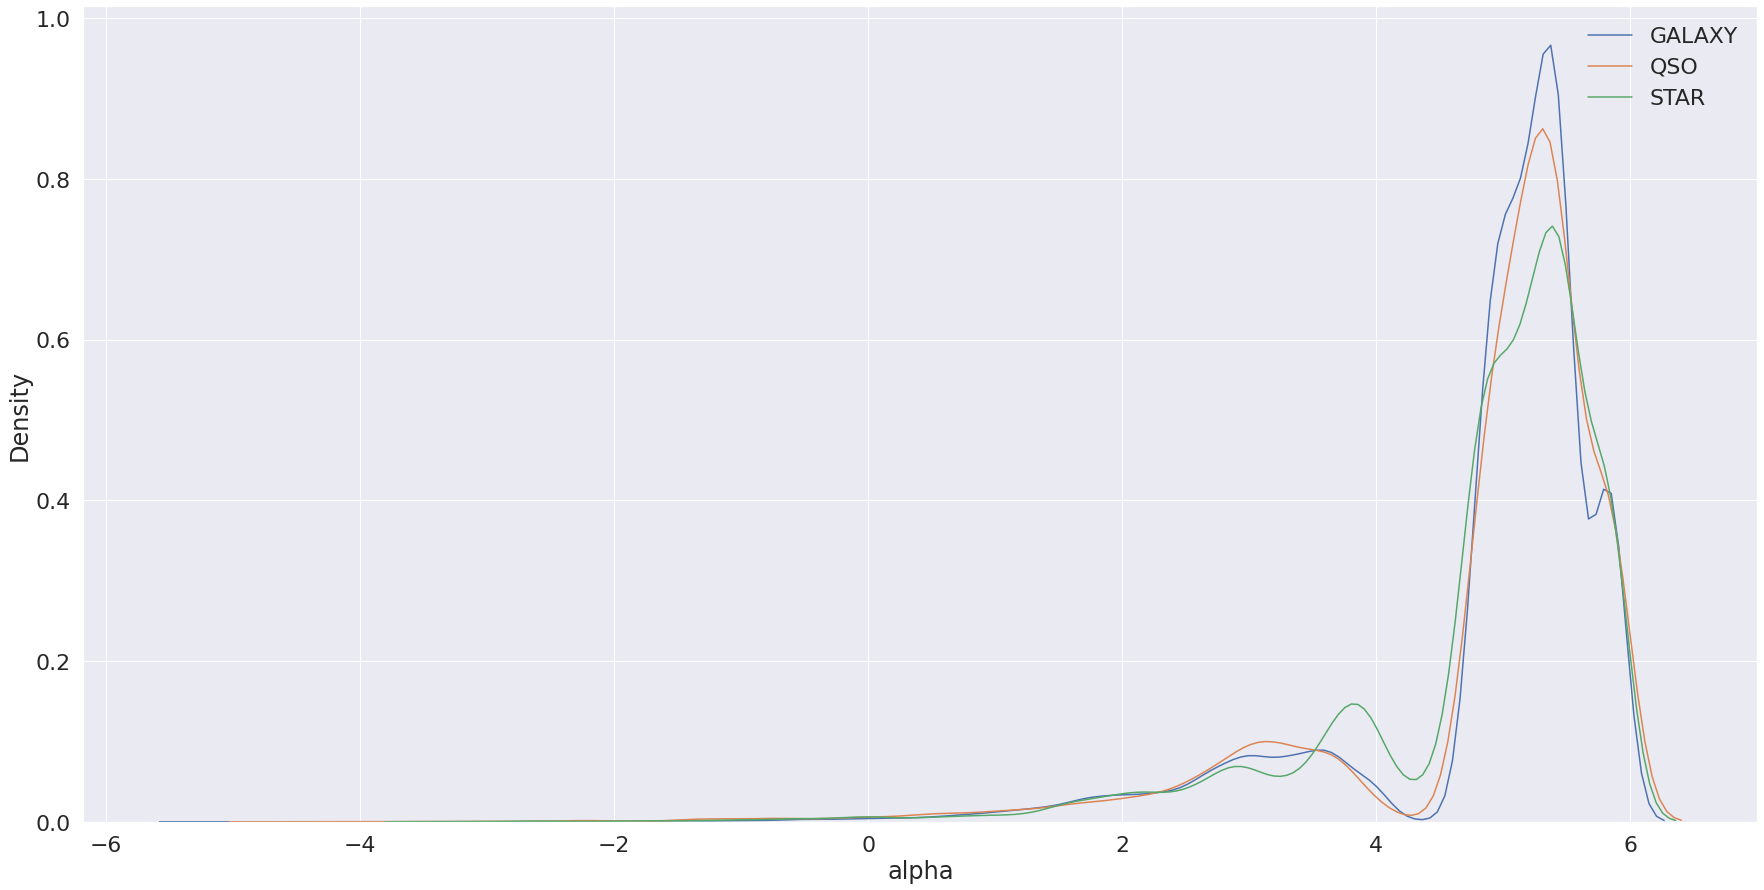

In [482]:
# graph shows that corlation is too similar with this feature for each class, no correlation to the target class.
# this will be no use in the model be cause of multicollinearity
kdeplot('alpha')

#### Univariate (delta)

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


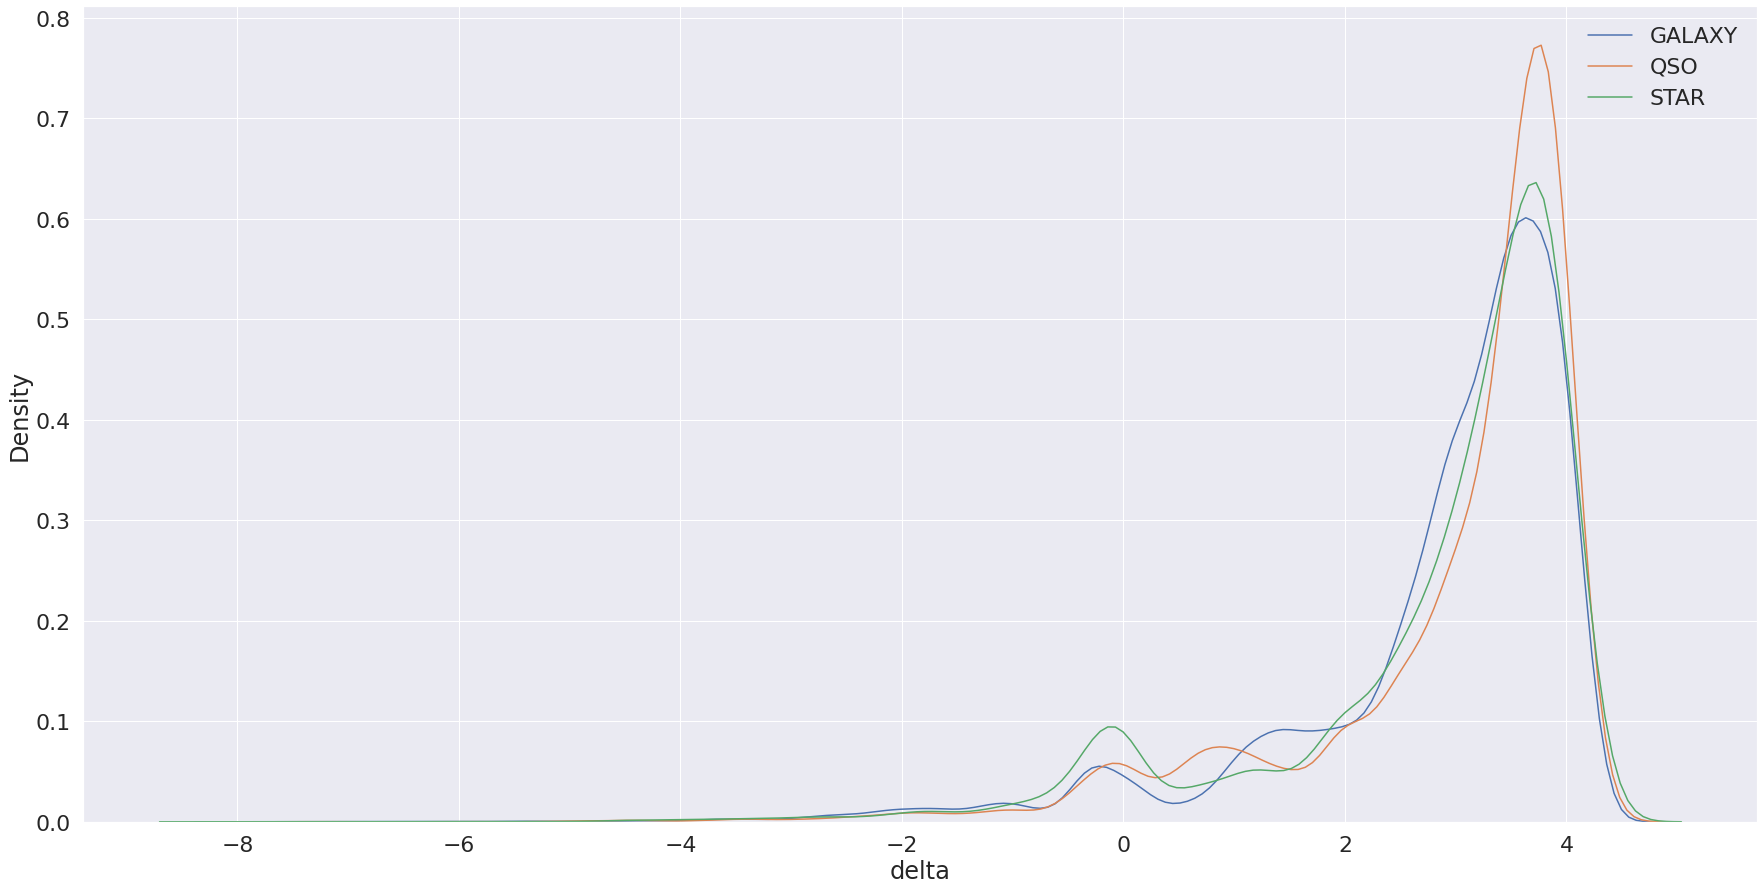

In [483]:
# graph shows that corlation is too similar with this feature for each class, no correlation to the target class.
# this will be no use in the model be cause of multicollinearity
kdeplot('delta')

#### Univariate (u)

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


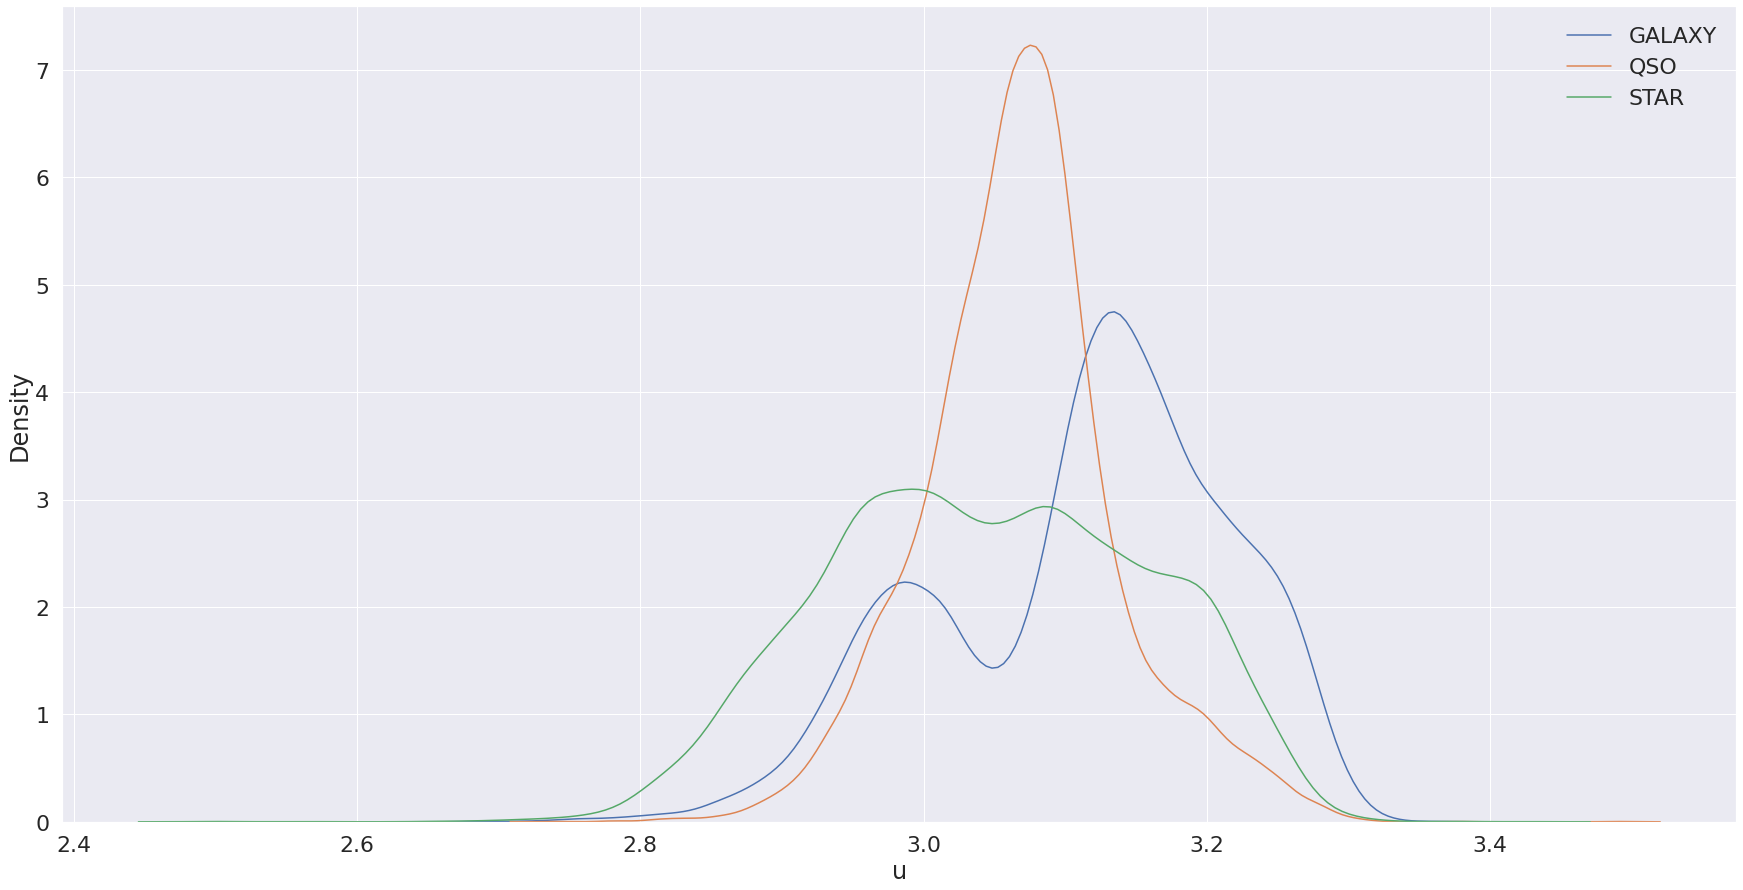

In [484]:
# standard corlation
kdeplot('u')

#### Univariate (g)

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


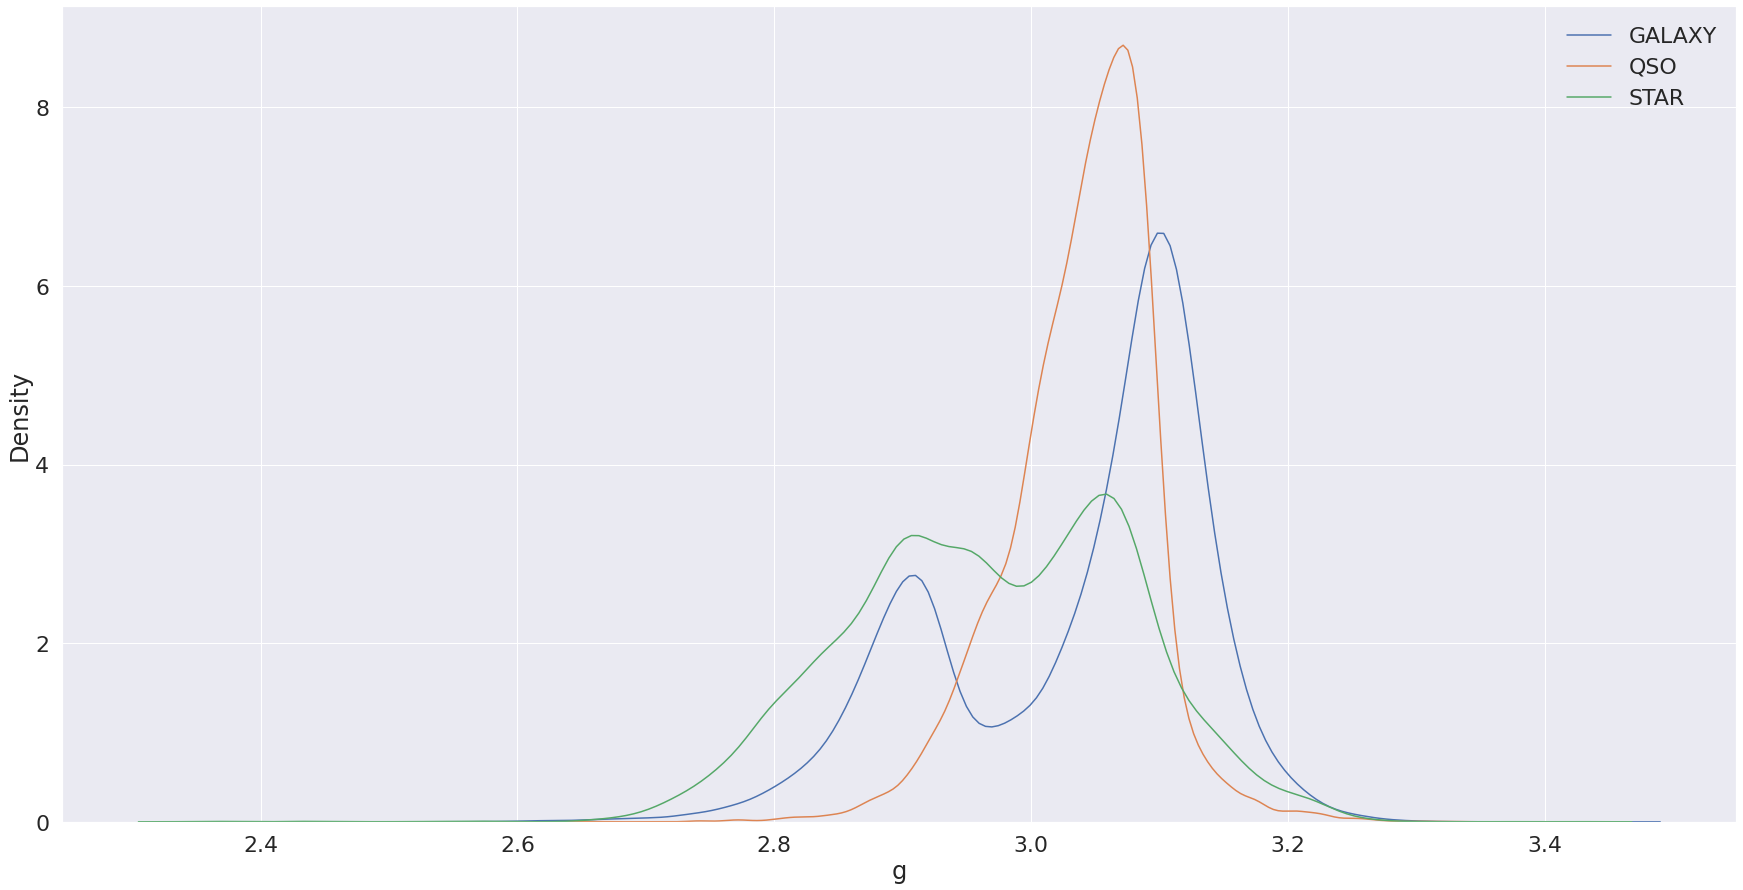

In [485]:
# standard corlation
kdeplot('g')

#### Univariate (r)

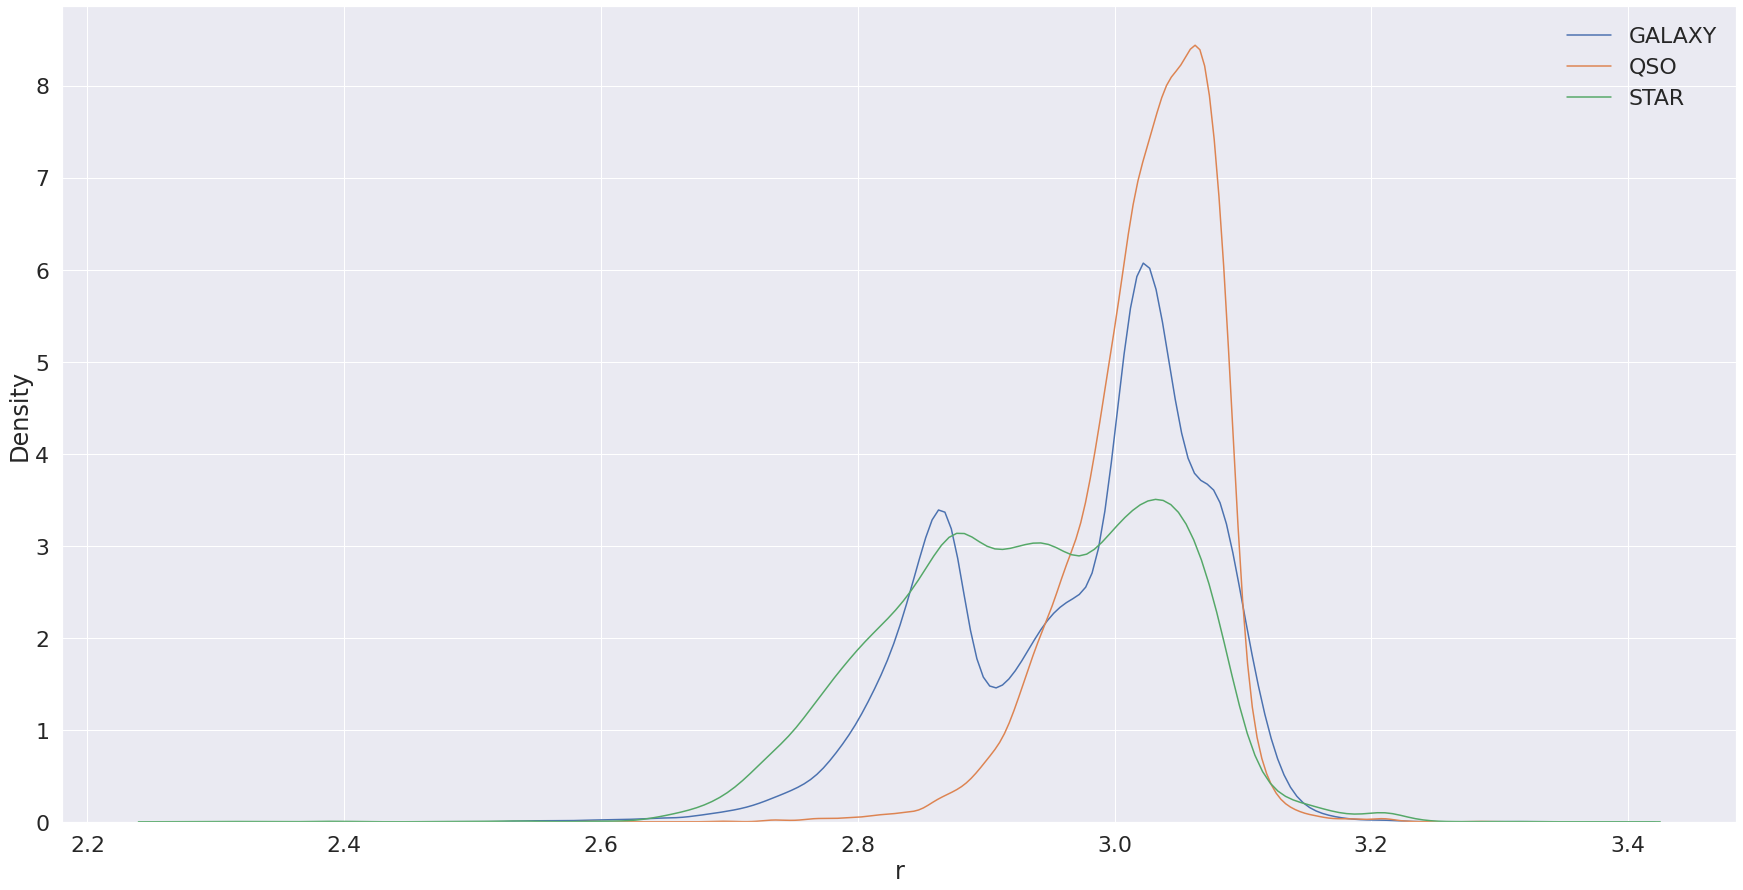

In [486]:
# standard corlation
kdeplot('r')

#### Univariate (i)

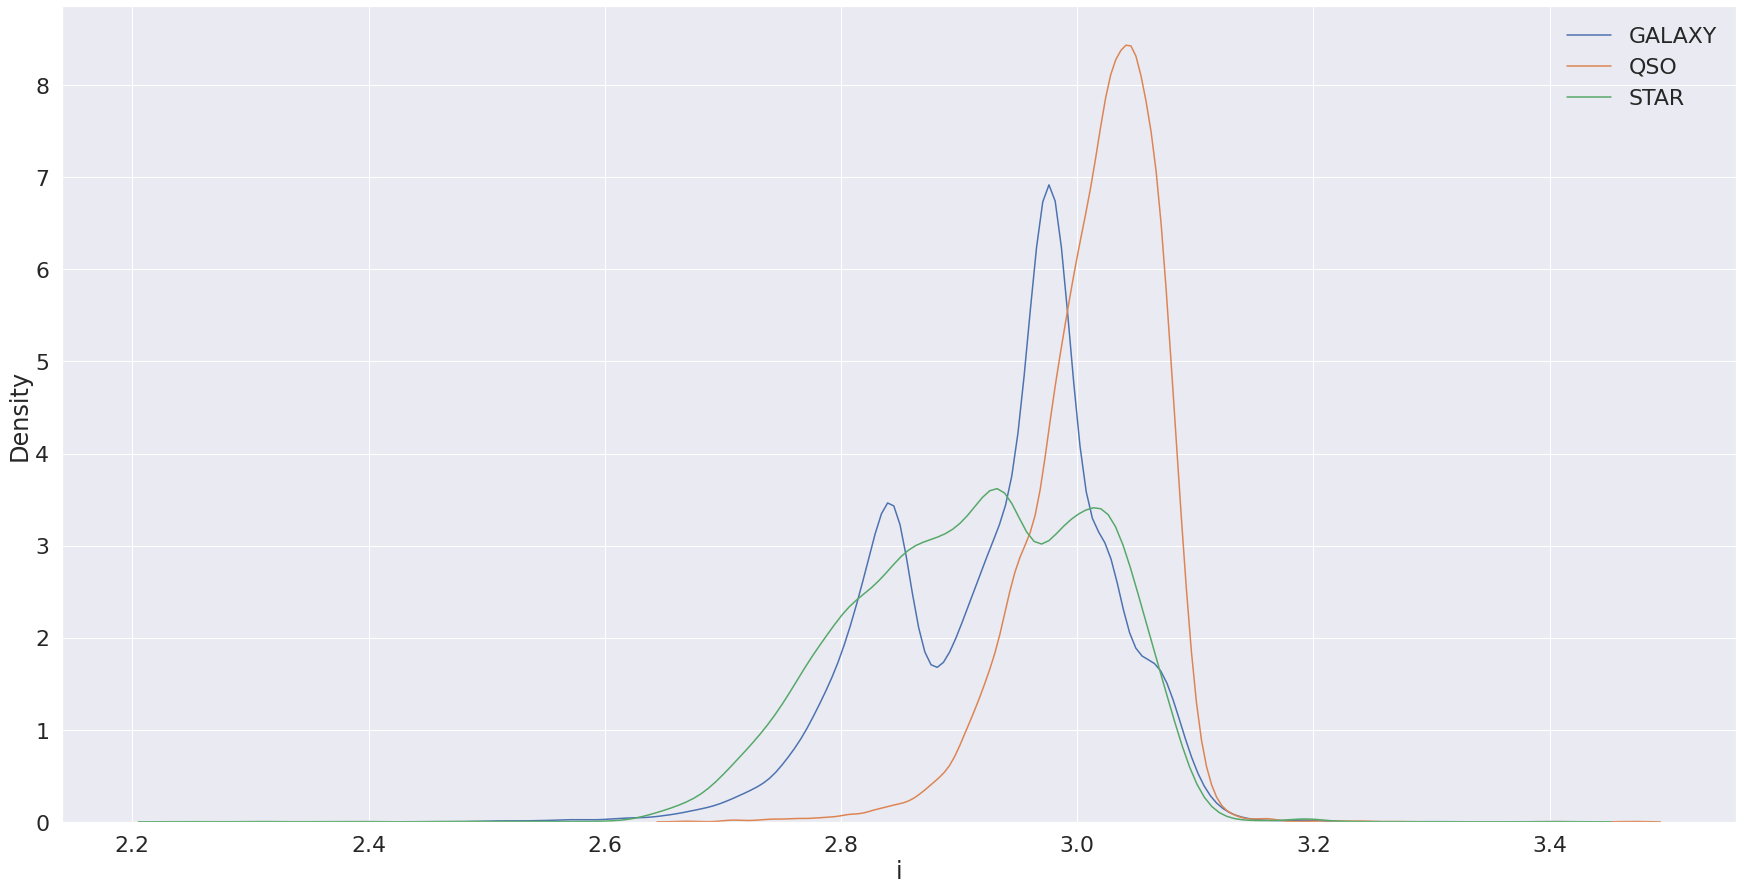

In [487]:
# standard corlation
kdeplot('i')

#### Univariate (z)

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


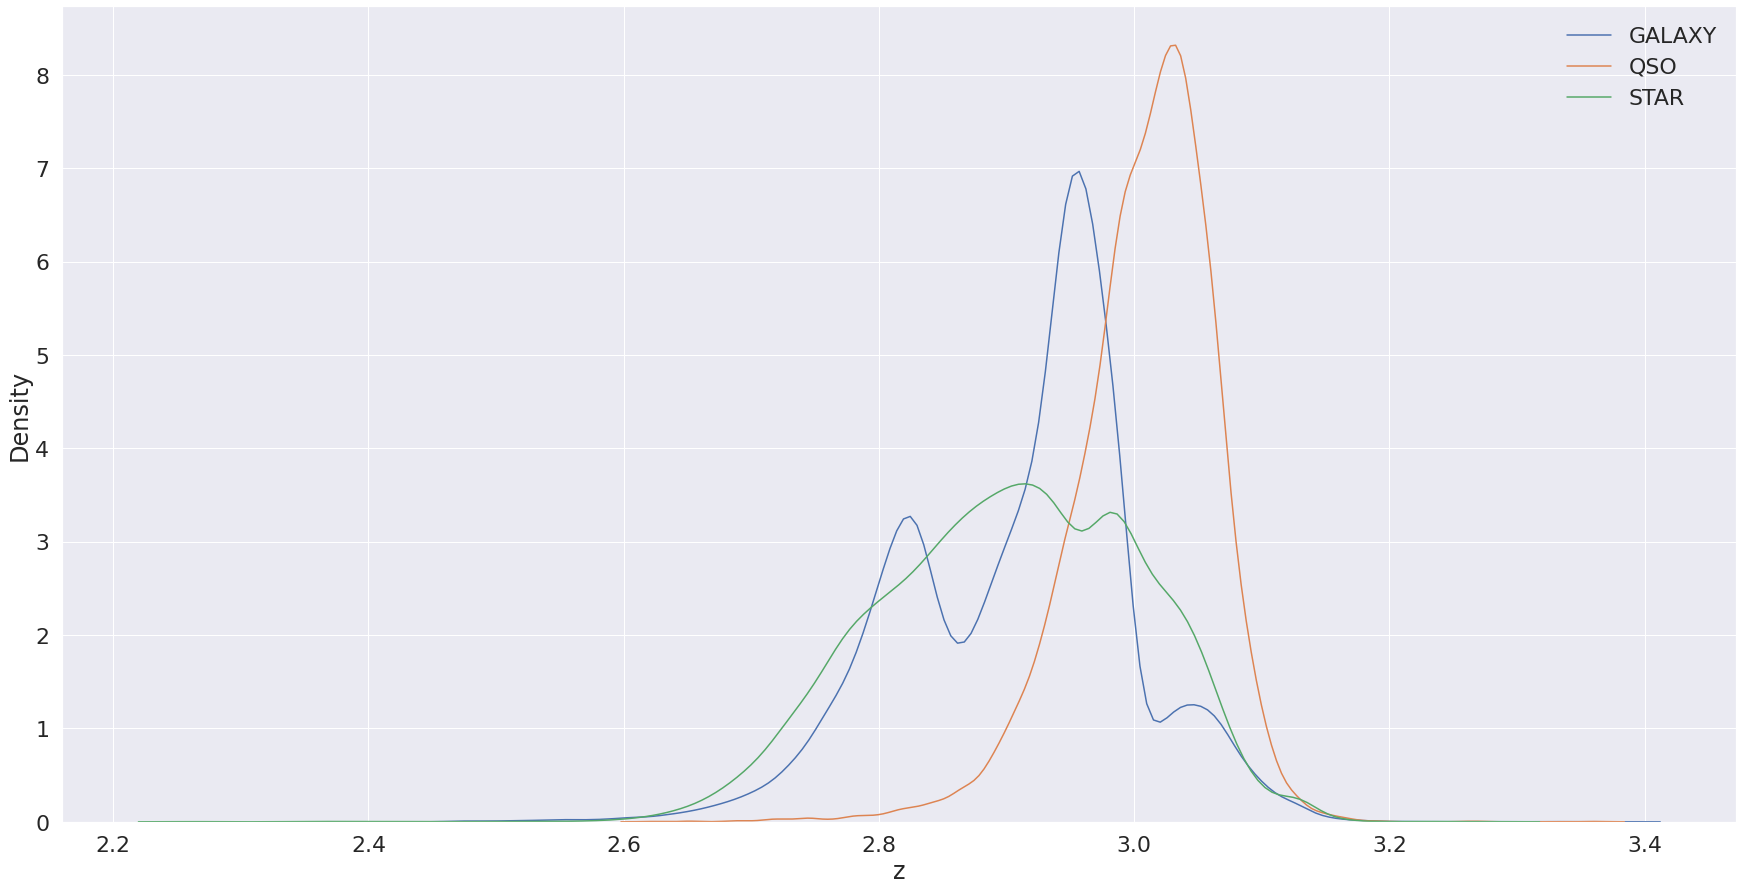

In [488]:
# standard corlation
kdeplot('z')

#### Univariate (run_ID)

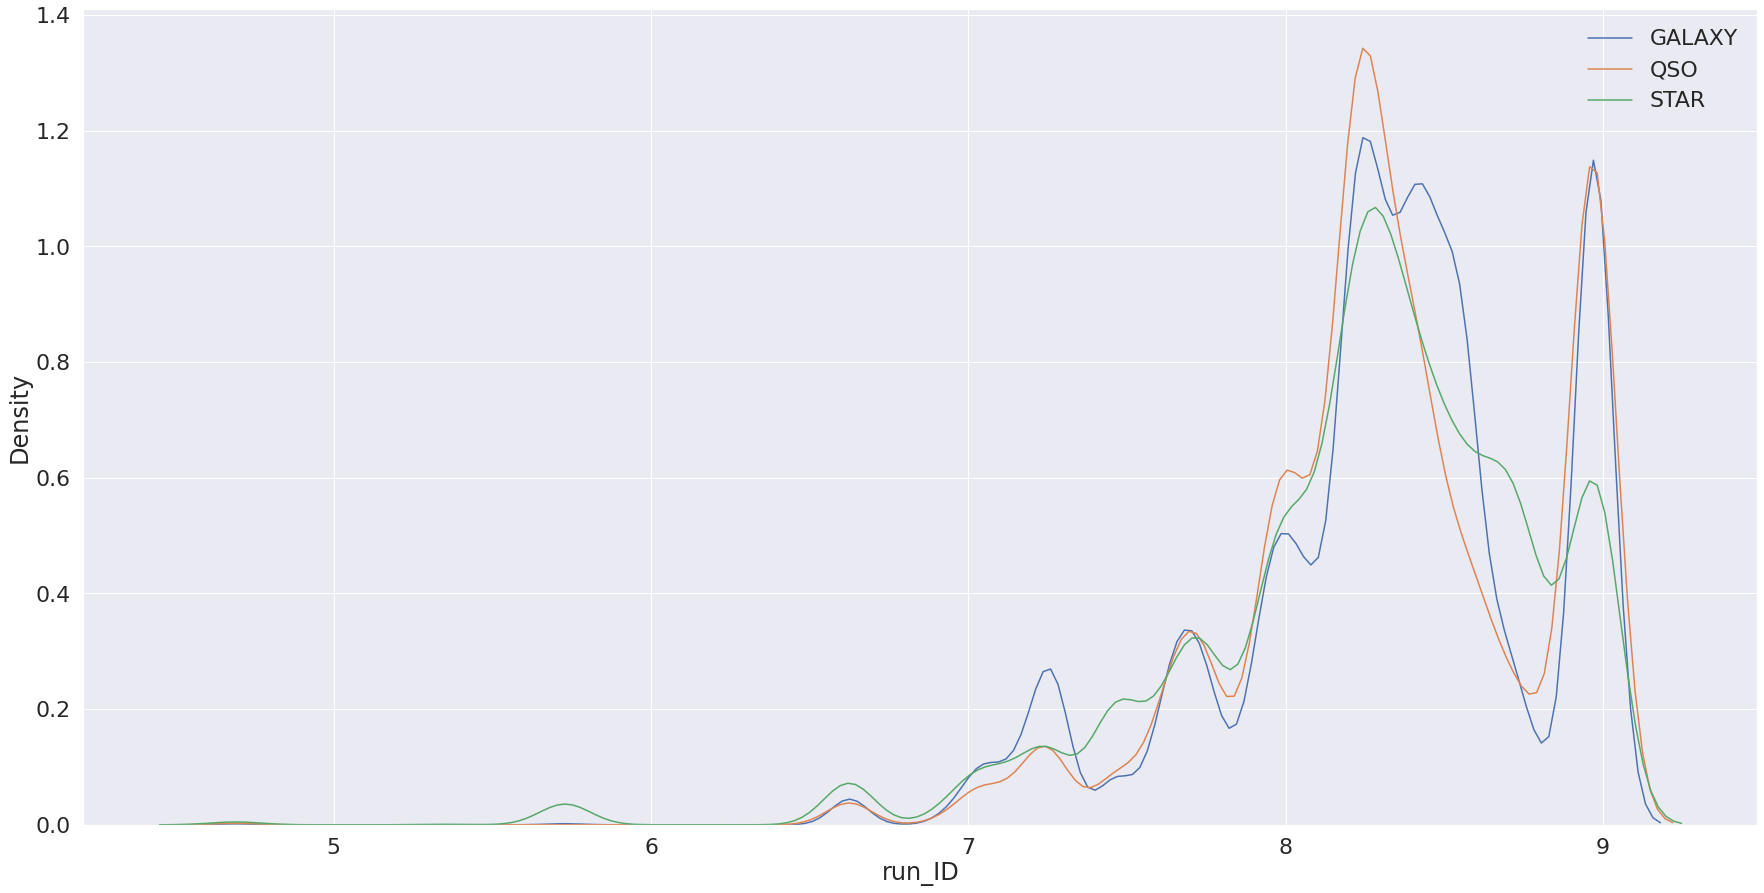

In [489]:
# graph shows that corlation is too similar with this feature for each class, no correlation to the target class.
# this will be no use in the model be cause of multicollinearity
kdeplot('run_ID')

#### Univariate (rerun_ID)

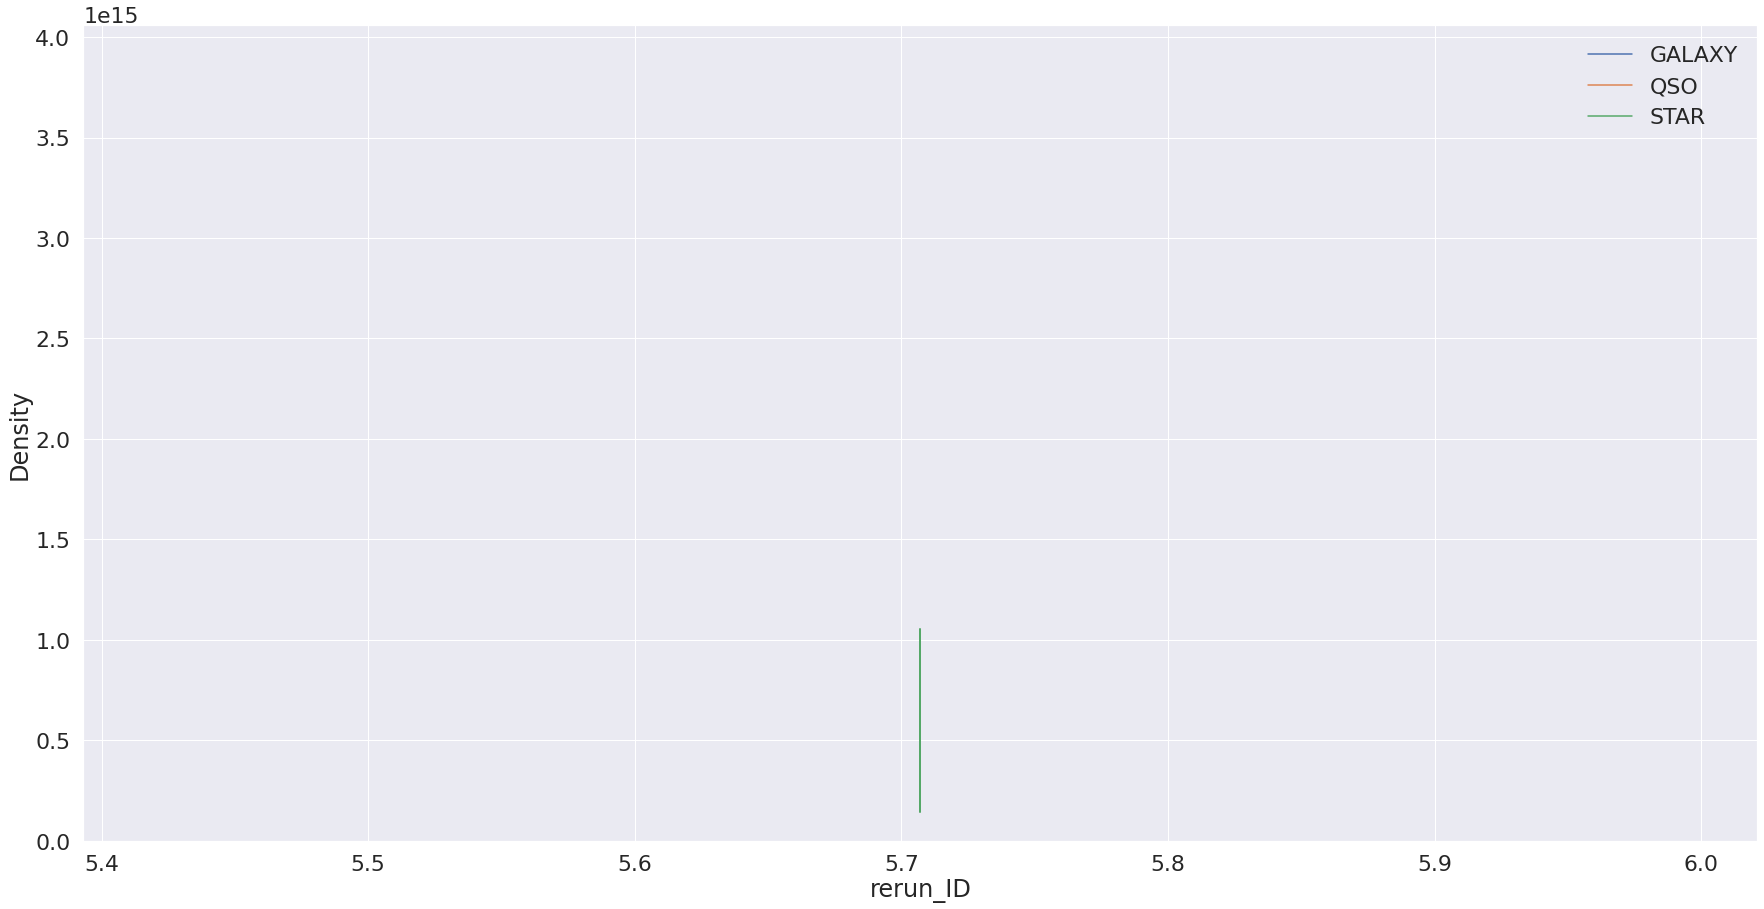

In [490]:
# graph shows that corlation is too similar with this feature for each class, no correlation to the target class.
# this will be no use in the model be cause of multicollinearity
# graph alsp
kdeplot('rerun_ID')

#### Univariate (cam_col)




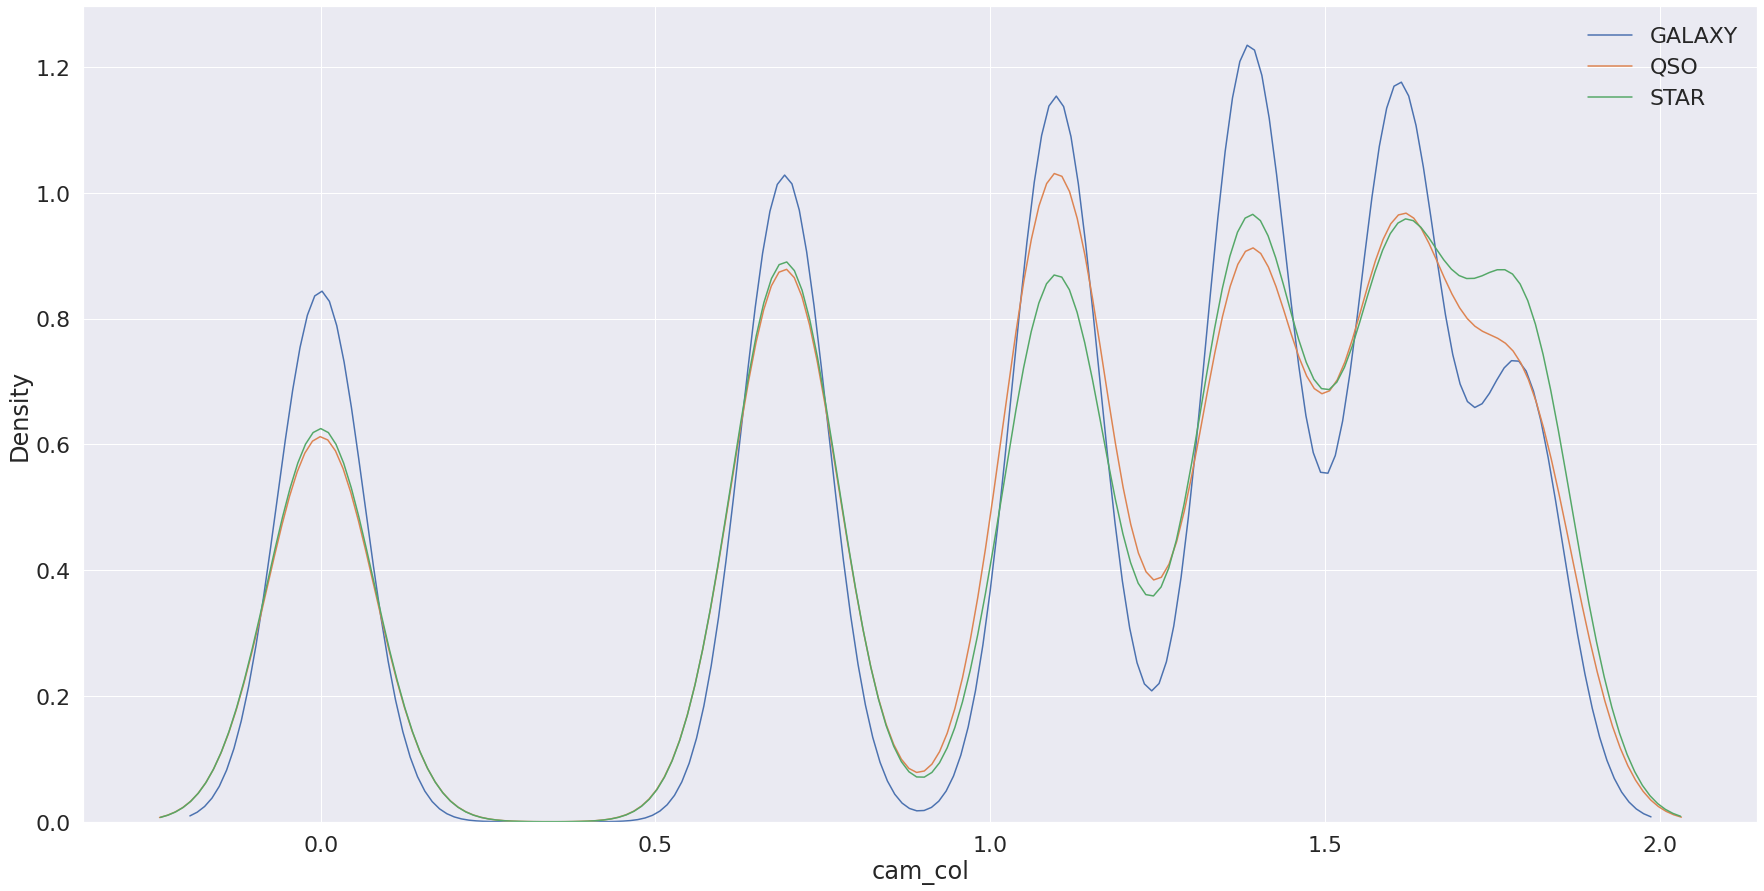

In [491]:
# graph shows that corlation is too similar with this feature for each class, no correlation to the target class.
# this will be no use in the model be cause of multicollinearity
kdeplot('cam_col')

#### Univariate (field_ID)

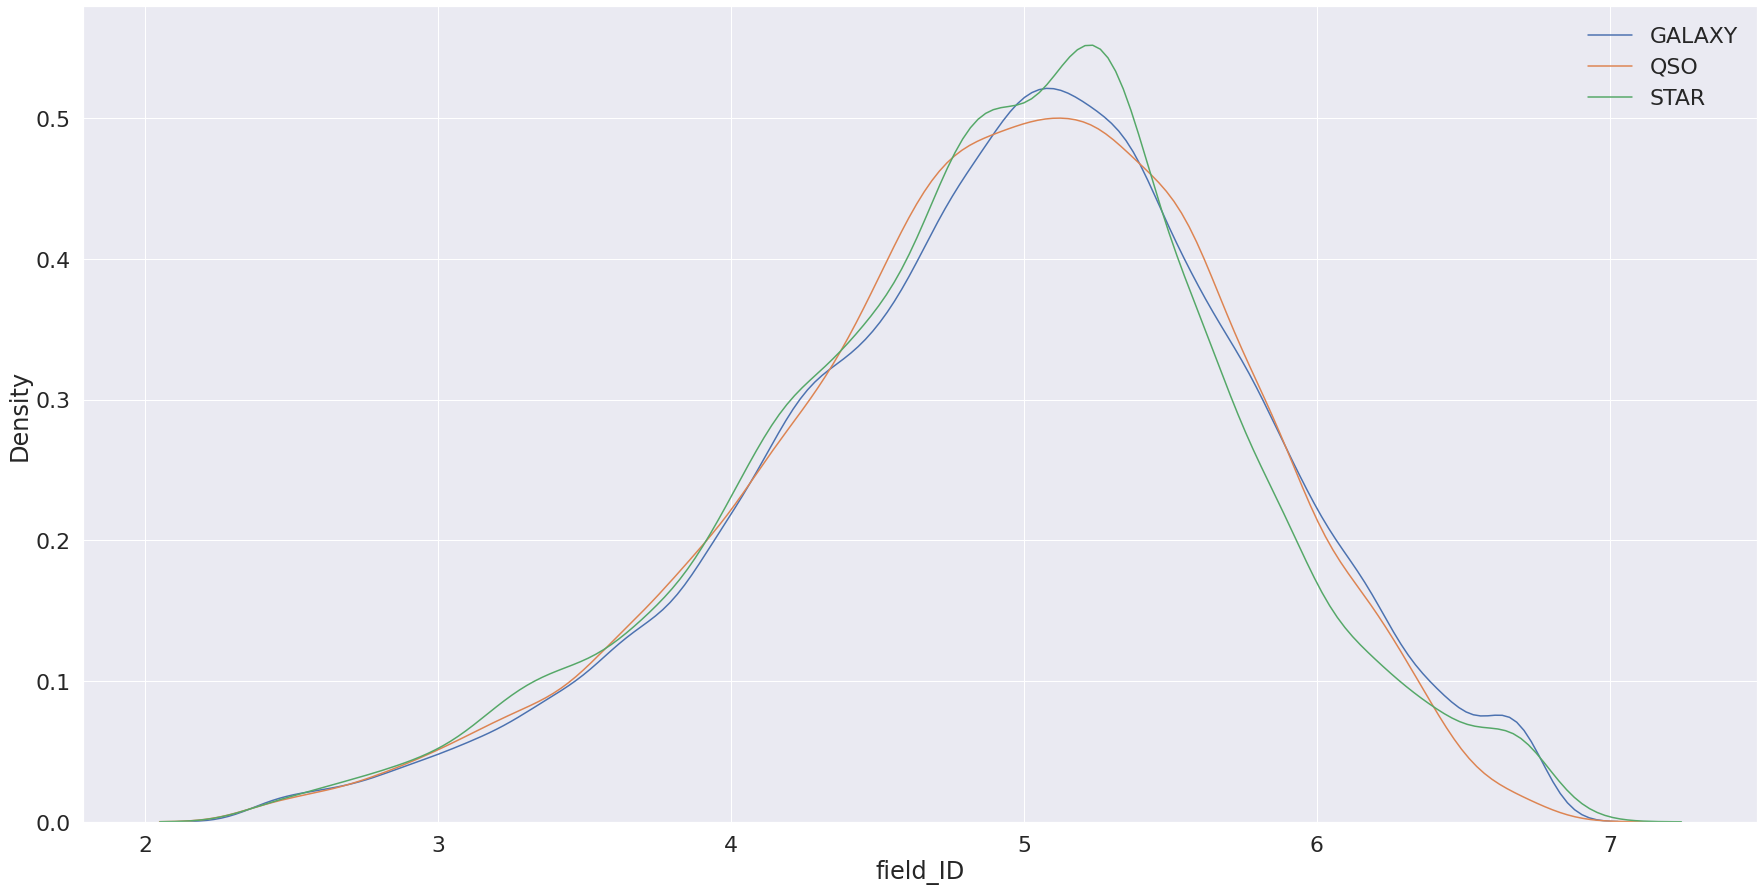

In [492]:
# graph shows that corlation is too similar with this feature for each class, no correlation to the target class.
# this will be no use in the model be cause of multicollinearity
kdeplot('field_ID')

#### Univariate (spec_obj_ID)

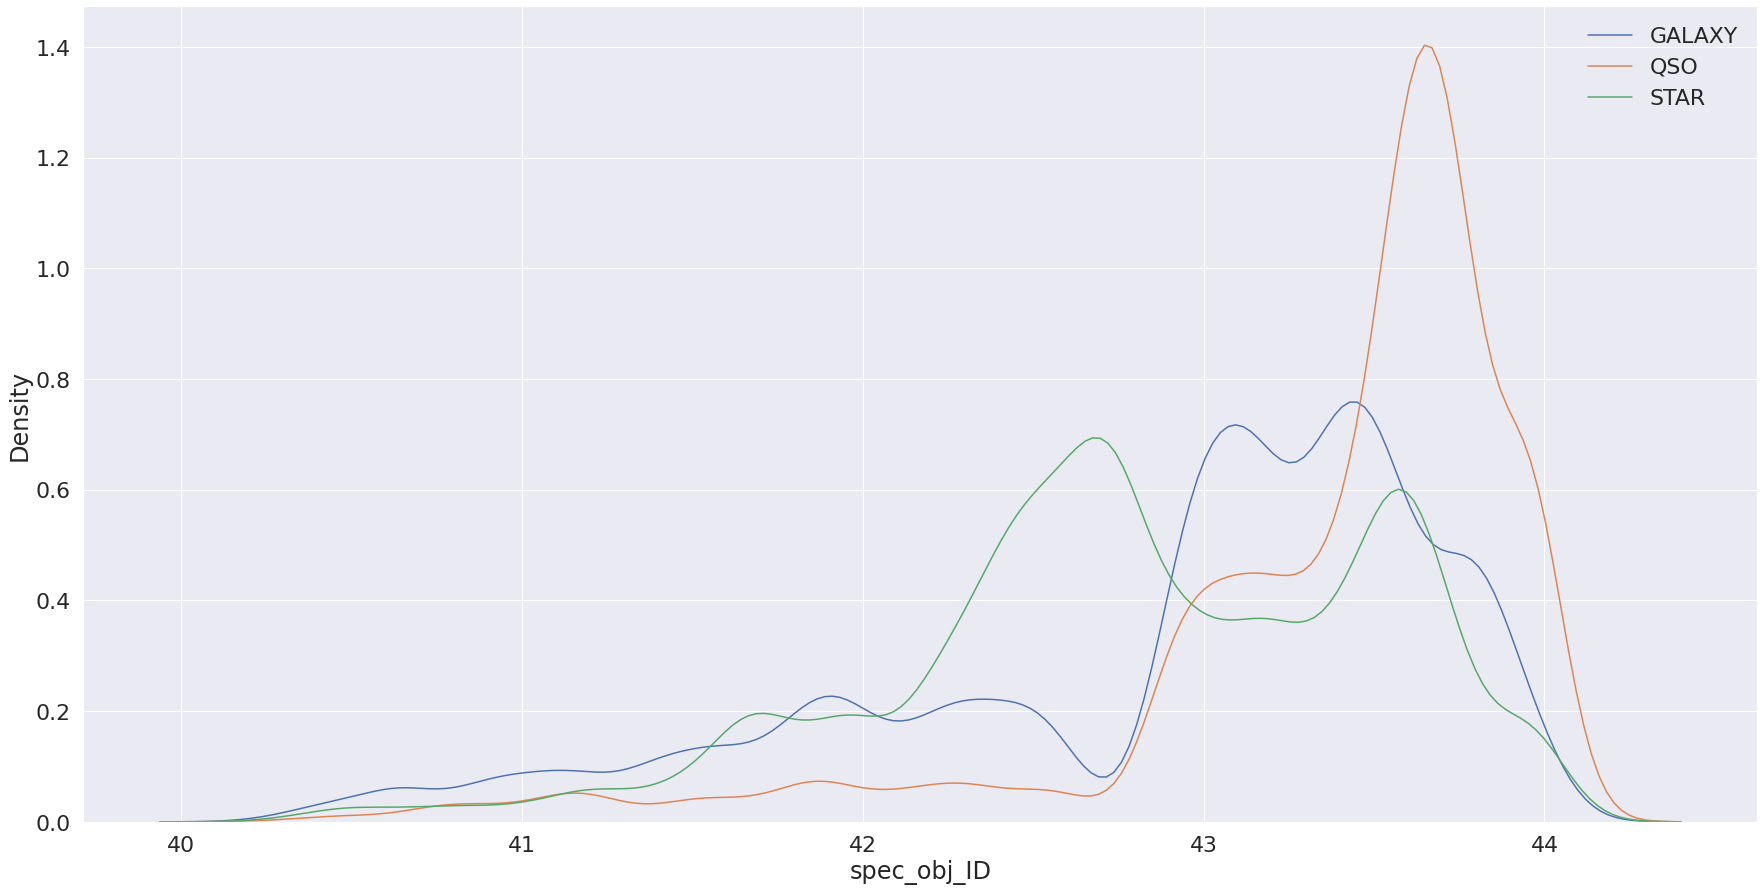

In [493]:
# standard corlation
kdeplot('spec_obj_ID')

#### Univariate (redshift)

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


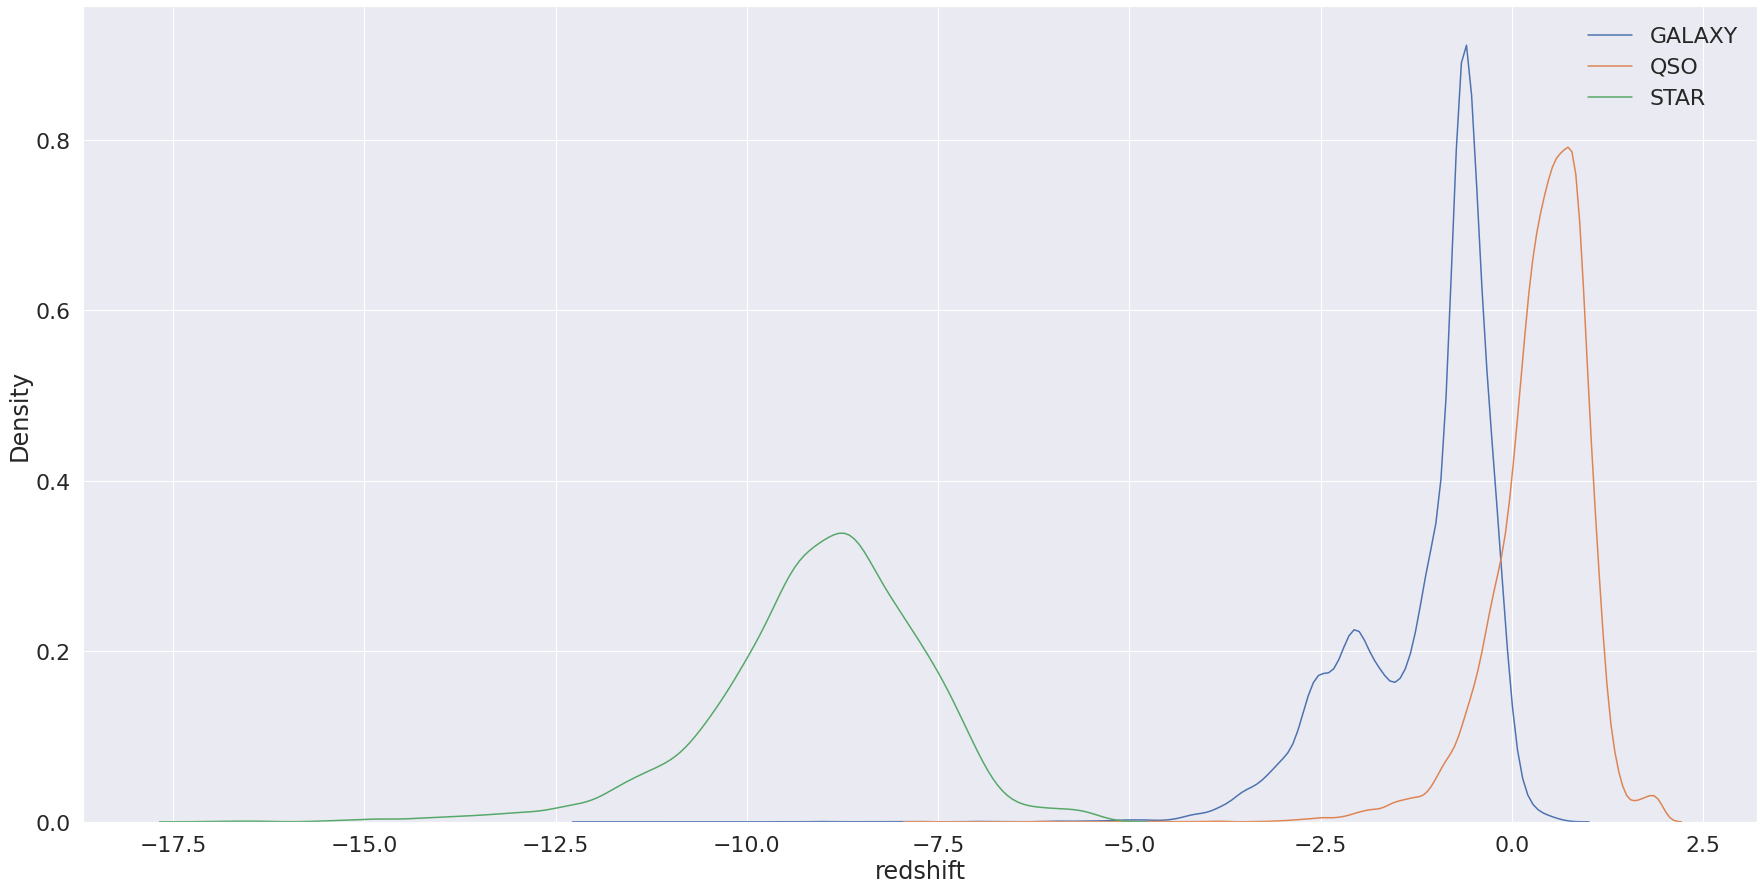

In [494]:
# standard corlation
kdeplot('redshift')

#### Univariate (plate)

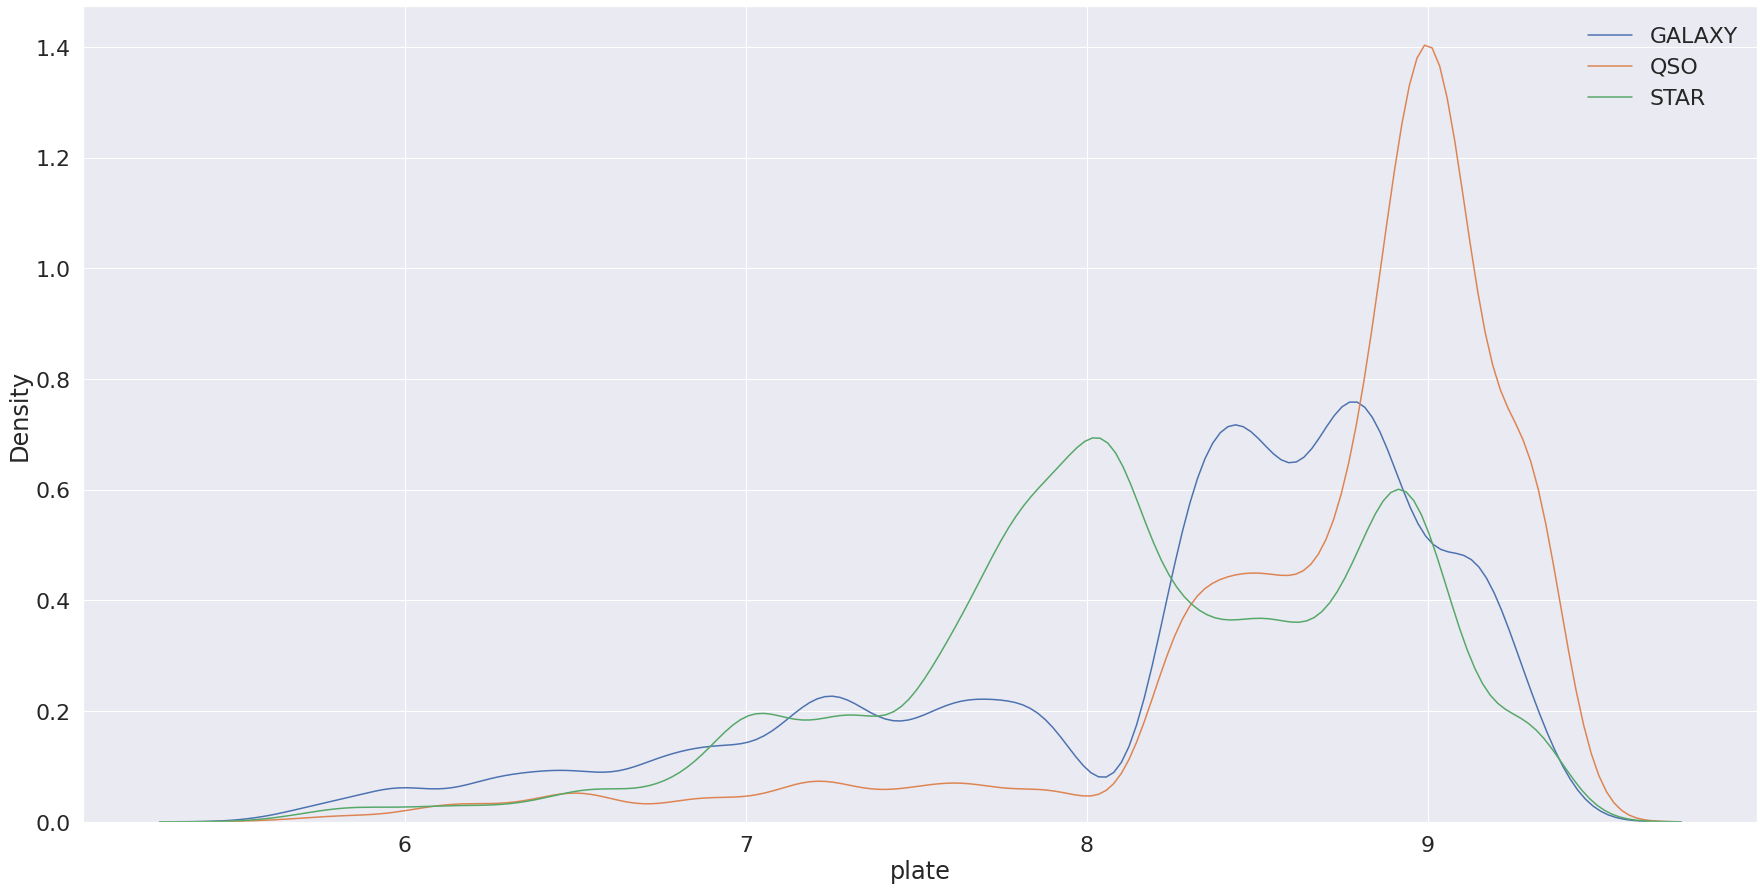

In [495]:
# standard corlation
kdeplot('plate')

#### Univariate (MJD)

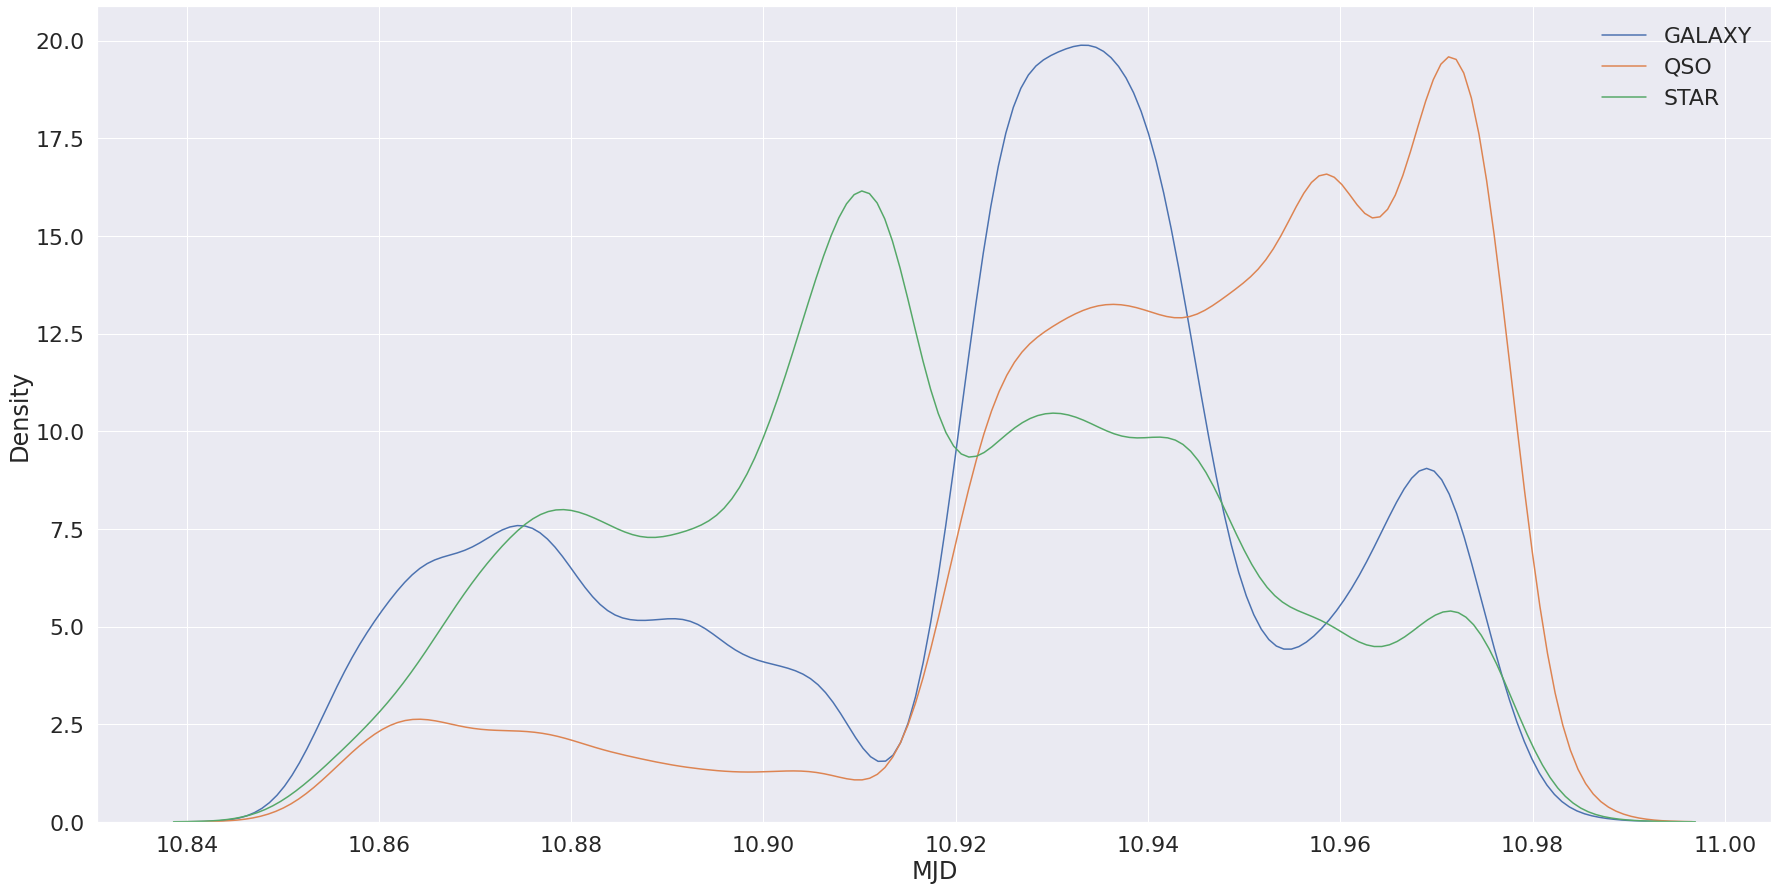

In [496]:
# standard corlation
kdeplot('MJD')

#### Univariate (fiber_ID)

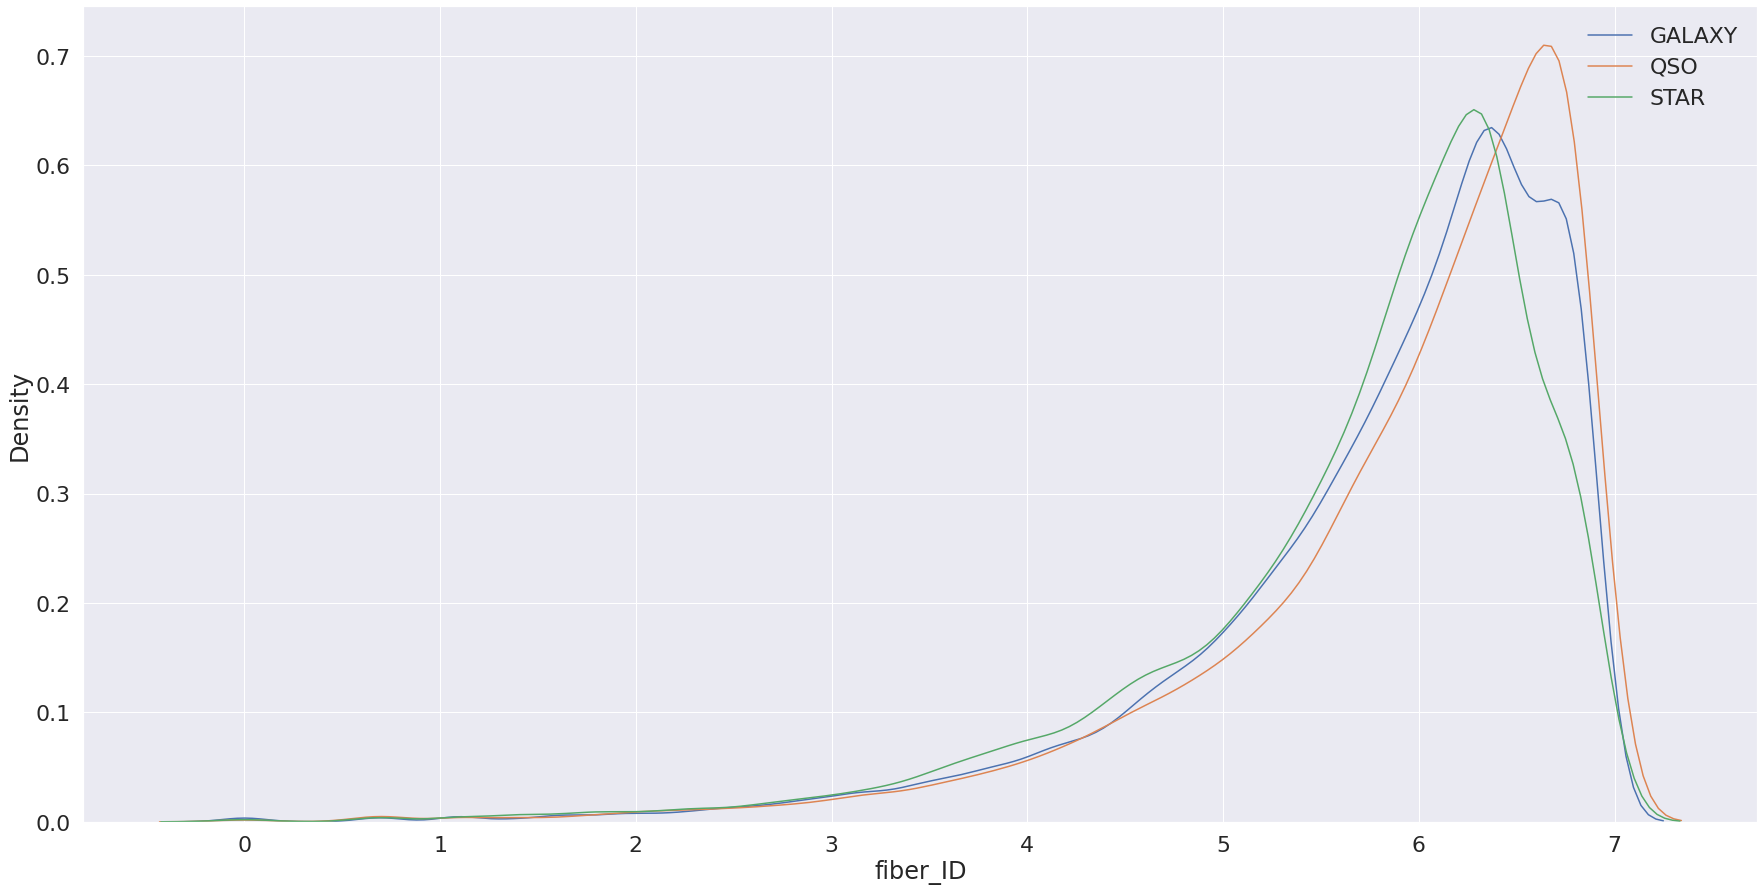

In [497]:
# graph shows that corlation is too similar with this feature for each class, no correlation to the target class.
# this will be no use in the model be cause of multicollinearity
kdeplot('fiber_ID')

### 2.1.4 - Redshift and Target Variable Analysis (Analysing question 6 and 7)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


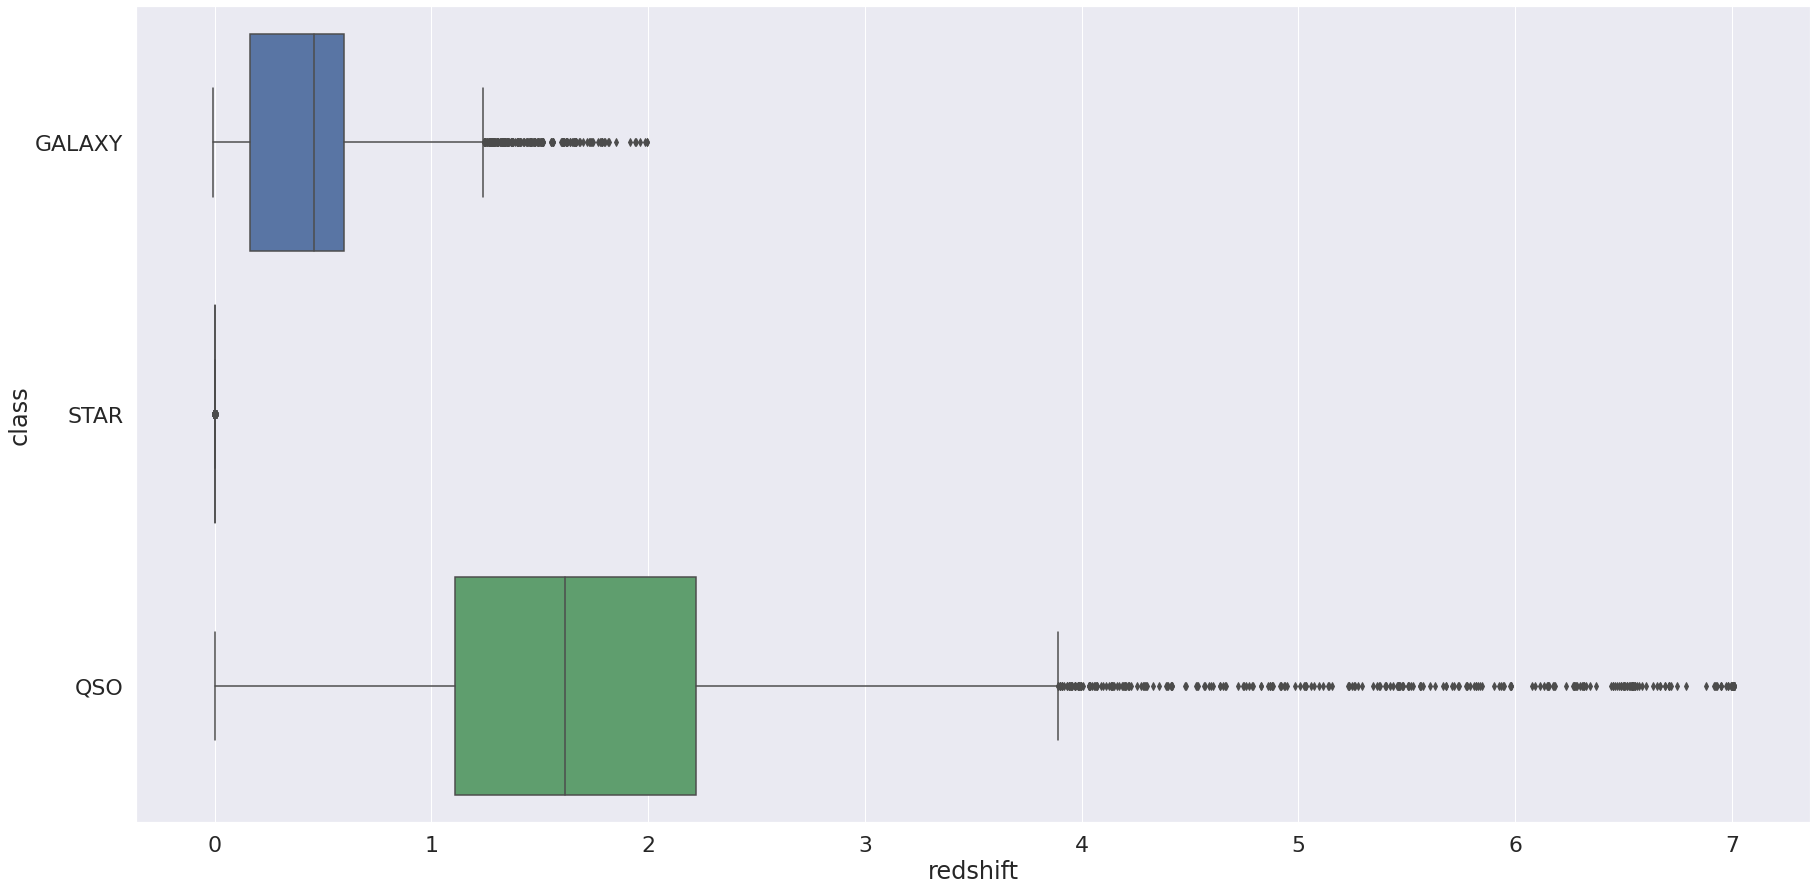

In [498]:
# Are the majority of observation in the high end or low end of redshift? (Question)
# How is redshift effected by the size/distance of celestial bodies? (Question 6)

# shows the all the data for galaxy and qso are on the right of the middle 50% of the data.

plt.figure(figsize = (30,15))
sns.set(font_scale=2)
sns.boxplot(df_train['redshift'], y = df_train['class'])

## 2.2 - Multivariate Analysis

> 




### 2.2.1 - Checking for Missing Values (Analysing question 1)

> 



In [499]:
# Through analysing the dataset, no inital missing values was found.
# so no futher action needs to take place here later on.

# this where two of our EDA questions we set out to analyse. (question 1)

# view the number of missing values for each feature
df_train.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
redshift       0
plate          0
MJD            0
fiber_ID       0
class          0
dtype: int64

<Figure size 2160x1080 with 0 Axes>

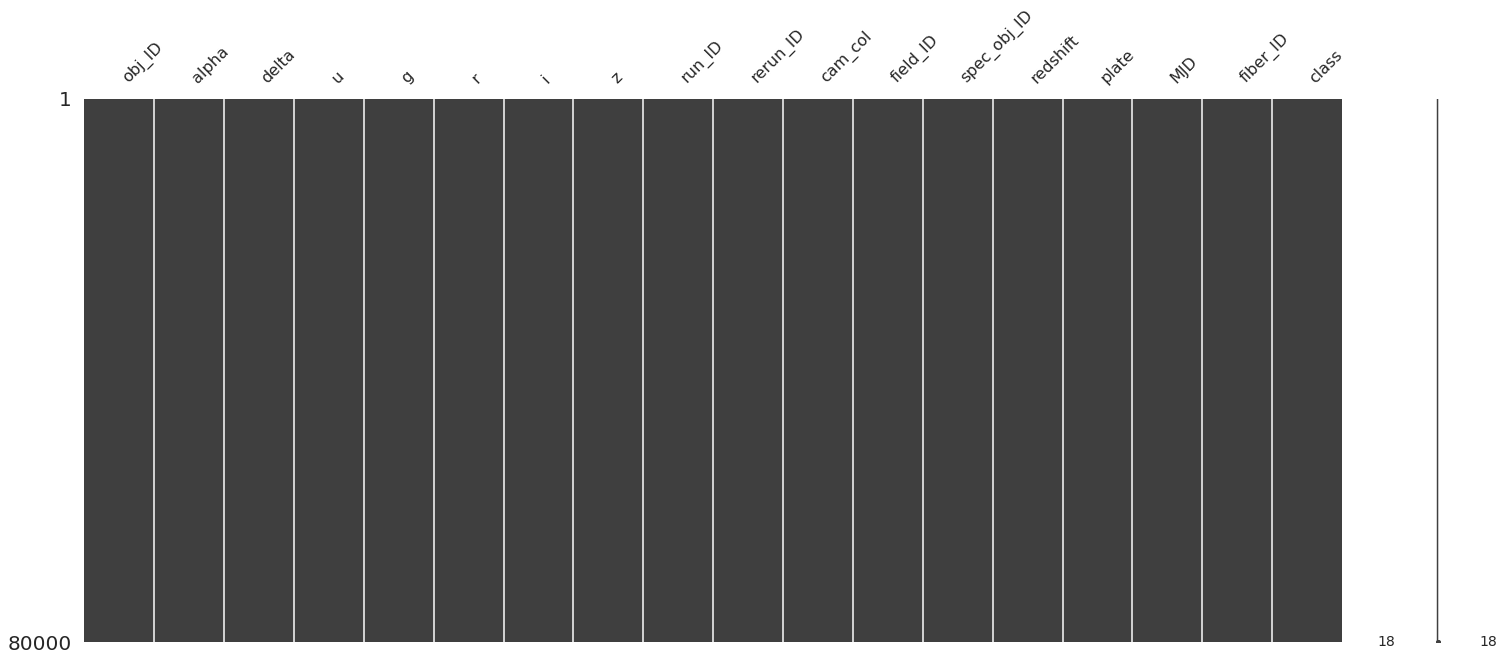

In [500]:
# this graph represents any patterns witin our dataset in terms of missing NULL values.
# there is a consistant pattern with any gaps, meaning there are no missing numbers in the datset.

plt.figure(figsize = (30,15))
sns.set(font_scale=2)
msno.matrix(df_train)

In [501]:
# shows all features within the dataset are int/float datatype
# but the class datatype is objects
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 75220 to 15795
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       80000 non-null  float64
 1   alpha        80000 non-null  float64
 2   delta        80000 non-null  float64
 3   u            80000 non-null  float64
 4   g            80000 non-null  float64
 5   r            80000 non-null  float64
 6   i            80000 non-null  float64
 7   z            80000 non-null  float64
 8   run_ID       80000 non-null  int64  
 9   rerun_ID     80000 non-null  int64  
 10  cam_col      80000 non-null  int64  
 11  field_ID     80000 non-null  int64  
 12  spec_obj_ID  80000 non-null  float64
 13  redshift     80000 non-null  float64
 14  plate        80000 non-null  int64  
 15  MJD          80000 non-null  int64  
 16  fiber_ID     80000 non-null  int64  
 17  class        80000 non-null  object 
dtypes: float64(10), int64(7), object(1)
memory

In [502]:
# there are a total of 326 values being 0, this is bad as they will be no use to train the model
(df_train == 0).sum().sum()

326

### 2.2.2 - Feature and Feature Analysis (Analysing question 5)

> 



In [503]:
#sns.pairplot(df_train,hue="class")

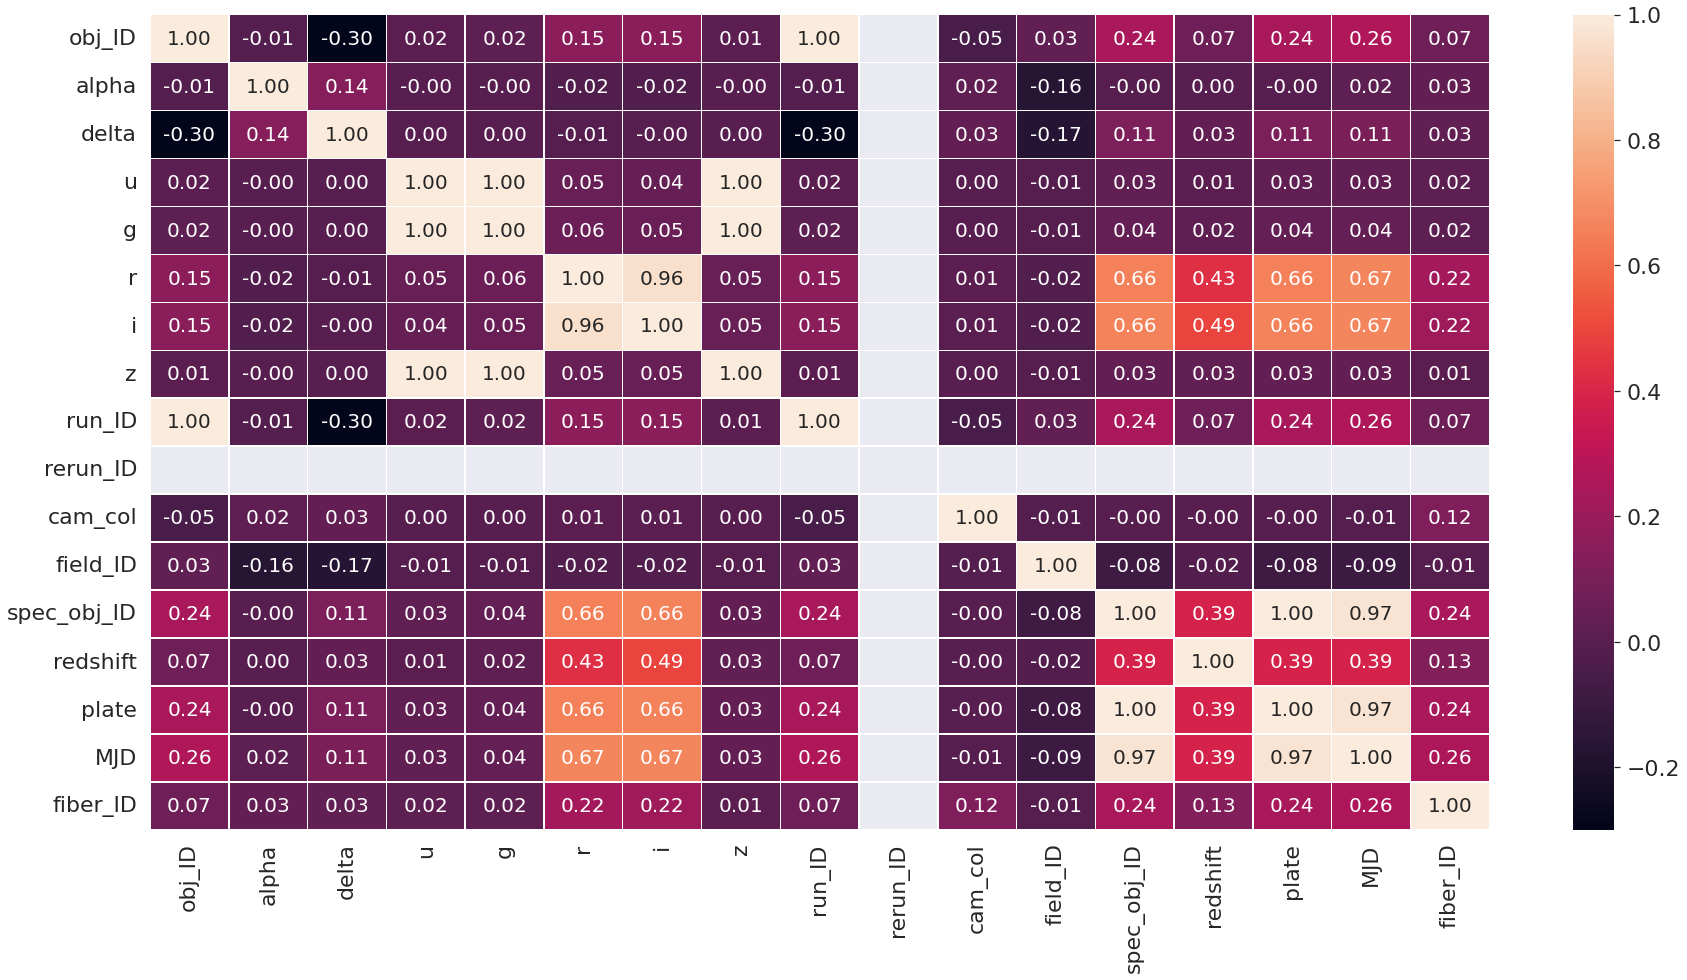

In [504]:
"""
now that i have analyises the correlated for each feature to the class objects
i will analysis the correlated for each feature to other features
for this i used a a heatmap and the correlation function
i will also look for any reacurring values for features.
"""
# this where two of our EDA questions we set out to analyse. (question 4 and 5)

plt.figure(figsize = (30,15))
sns.set(font_scale=2)
sns.heatmap(df_train.corr(), annot = True, fmt = ".2f", linewidths = .5, annot_kws={"size": 20})
plt.show()

# can see that rerun_ID has no correlation to any other features as well, as before i found it has reacurring data.
# so it will be dropped in the data processing and cleaning phase.

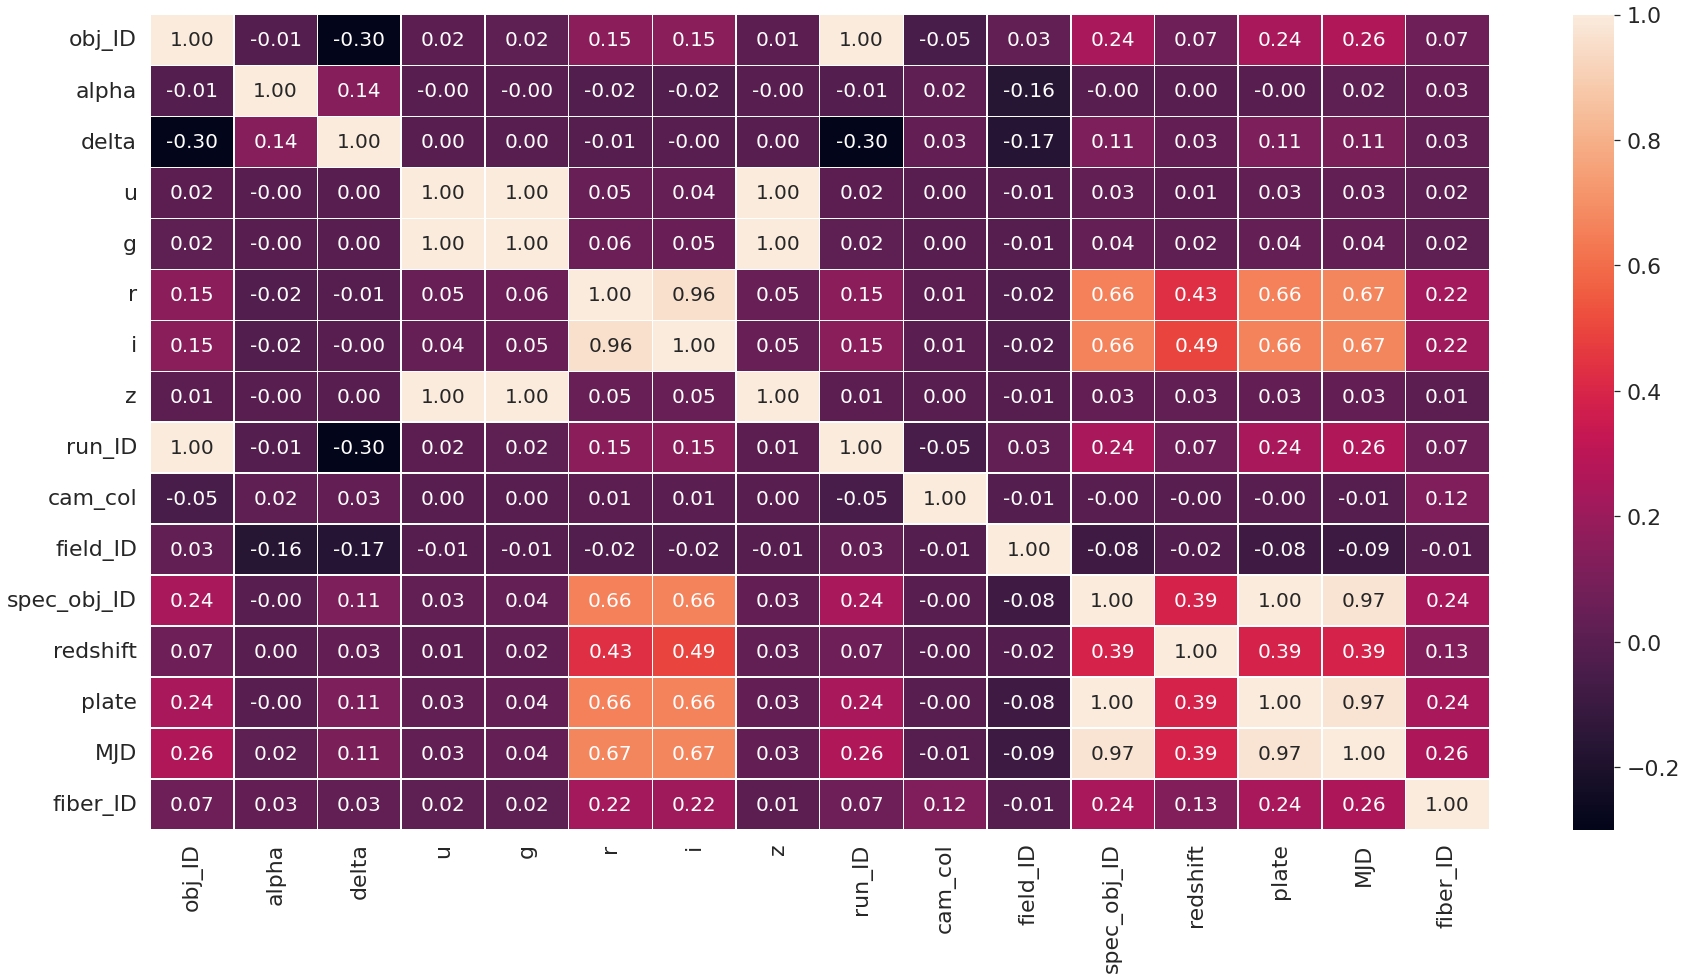

In [505]:
# heatmap without rerun_ID, so its more easily readable
# highly postive correlate features exist like  U, G, plate, MJD but they dont effect many other features so they wont be removed
plt.figure(figsize = (30,15))
sns.set(font_scale=2)
sns.heatmap(df_train.drop(['rerun_ID'], axis = 1).corr(), annot = True, fmt = ".2f", linewidths = .5, annot_kws={"size": 20})
plt.show()

# **3 - DATA PRE-PROCESSING AND CLEANING**
---
  

## 3.1 - Splitting New Dataset

In [506]:
# i split a fresh dataset for the pre-processing, cleaning and modeling of my algorithm.
# the new split is the exact same as the EDA split.

# the dataset was split first to avoid data leakage

# seperated the features from the dataset so i can preform a train/test split  
X = df.drop(['class'], axis=1) # FEATURES WITHOT LABEL
Y = df['class'] # LABEL WITHOUT FEATURES

# 80/20 split between training and testing split
# 42 random state
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [507]:
# shows the dataset size for each train/test split

# training set has 80,000 observations for features and class label
# testing set has 20,000 observations for features and class label
print(f"X_train -\nShape: {X_train.shape}\n\nX_test -\nShape: {X_test.shape}\n")

print(f"Y_train -\nShape: {Y_train.shape}\n\nY_test -\nShape: {Y_test.shape}\n")

X_train -
Shape: (80000, 17)

X_test -
Shape: (20000, 17)

Y_train -
Shape: (80000,)

Y_test -
Shape: (20000,)



In [508]:
# merged the training and testing features to their coresponding class label for the data cleaning and pre-processin, so both will be effected
df_train = pd.merge(X_train, Y_train, left_index=True, right_index=True)

df_test = pd.merge(X_test, Y_test, left_index=True, right_index=True)

## 3.2 - Dropping Unwanted Features (Feature Selection)

> 

In [509]:
# all the highly correlated features and features with reaccuring values found throughout the EDA univariate and multivariate analysis where dropped
# this was done for both the training and testing set as they both need the same features for modeling 

# a total of 8 features where dropped
df_train = df_train.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)
df_test = df_test.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)

In [510]:
# shows the new size of total observations and features within the testing and training set after correlated features where dropped 
print(f"df_train -\nShape: {df_train.shape}\n")

print(f"df_test -\nShape: {df_test.shape}\n")

df_train -
Shape: (80000, 10)

df_test -
Shape: (20000, 10)



In [511]:
# shows how the new dataset looks after correlated features where dropped 
df_train

u         g         r         i         z   spec_obj_ID  \
75220  22.32247  21.40113  20.51302  19.62691  19.34791  5.136368e+18   
48955  25.85486  24.22573  21.48514  20.38426  19.38826  8.709046e+18   
44966  22.62750  21.41766  19.54710  18.87770  18.39861  5.986547e+18   
13568  20.25937  18.53387  17.58141  17.16960  16.85448  2.200026e+18   
92727  22.03892  21.46501  21.32925  21.26120  21.17124  4.340534e+18   
...         ...       ...       ...       ...       ...           ...   
6265   20.82854  20.32382  20.25718  20.39426  20.36549  1.208439e+19   
54886  18.93209  16.96611  16.05940  15.64639  15.30356  1.140565e+18   
76820  23.95684  21.37612  19.75149  18.49137  17.77083  3.672834e+18   
860    17.79224  16.47265  15.84970  15.59104  15.46414  3.016365e+18   
15795  24.93142  21.08619  19.28560  18.66209  18.36053  4.471072e+18   

       redshift  plate    MJD   class  
75220  0.659869   4562  55570  GALAXY  
48955  0.813819   7735  58136  GALAXY  
44966  0.404277   5317  56000  GALAXY  
13568  0.108840   1954  53357  GALAXY  
92727 -0.001039   3855  55268    STAR  
...         ...    ...    ...     ...  
6265   2.412806  10733  58244     QSO  
54886  0.081128   1013  52707  GALAXY  
76820  0.000253   3262  54884    STAR  
860    0.000000   2679  54368  GALAXY  
15795  0.352529   3971  55322  GALAXY  

[80000 rows x 10 columns]

## 3.3 - Detecting and Removing Outliers (Data Cleaning)

> 



In [512]:
# IQR method used to detect remove outliers as it was discorved that many feartures had them throughout the EDA univariate analysis
# this was done for both the training and testing set as they both cannot have outliers

# this varibale is used for the later before_outlier_removal() function to show feature before removing outliers
dataset_before_removal = df_train.copy(deep=True)

def outlier_removal(dataset):

    # dataset before removal
    shape_before = dataset.shape

    for feature in dataset.select_dtypes(include = 'number').columns:
        # 0.25 and 0.75 quantile used to later calculate lower and upper bound
        # 0.25 and 0.75 used for IQR method
        QT1 = dataset[feature].quantile(0.25)
        QT3 = dataset[feature].quantile(0.75)
  
        IQR =  abs(QT3 - QT1)
        
        # to calcuate upper and lower bound
        lower = QT1 - (1.5 * IQR)
        upper = QT3 + (1.5 * IQR)
        
        # anything over the upper and lower bound will be detected as an outlier
        min_in = dataset[dataset[feature] < lower].index
        max_in = dataset[dataset[feature] > upper].index
        
        # detected outliers outside lower and higher bound are dropped from the dataset
        dataset.drop(min_in, inplace = True)
        dataset.drop(max_in, inplace = True)
    
    # dataset after removal
    shape_after = dataset.shape

    # caluclated different before and after outlier removal to get the sum of outliers removed
    outlier_count = abs(shape_before[0] - shape_after[0])
    
    return outlier_count

In [513]:
# shows numbers of outliers removed within the training set 
print("Number of outliers deleted in training set: ", outlier_removal(df_train))

# shows numbers of outliers removed within the training set 
print("Number of outliers deleted in testing set: ", outlier_removal(df_test))

Number of outliers deleted in training set:  7487
Number of outliers deleted in testing set:  1922


In [514]:
# shows the new size of total observations and features within the testing and training set after outliers are detected and removed

# 7487 + 72513 = 80000
# 80000 which was the original size of the training set when split
print('Training set shape:', df_train.shape)
#
print('Testing set shape:', df_test.shape)

Training set shape: (72513, 10)
Testing set shape: (18078, 10)


In [515]:
# created functions to compare before and after removing outliers

# prints boxplot graph of feature before removing outliers 
def before_outlier_removal(feature):
    plt.figure(figsize = (30,15))
    sns.set(font_scale=2)
    sns.boxplot(data = dataset_before_removal, x = dataset_before_removal[feature])

# prints boxplot graph of feature after removing outliers 
def after_outlier_removal(feature):
    plt.figure(figsize = (30,15))
    sns.set(font_scale=2)
    sns.boxplot(data = df_train, x = df_train[feature])

### Feature Outlier Removal Comparison (u)

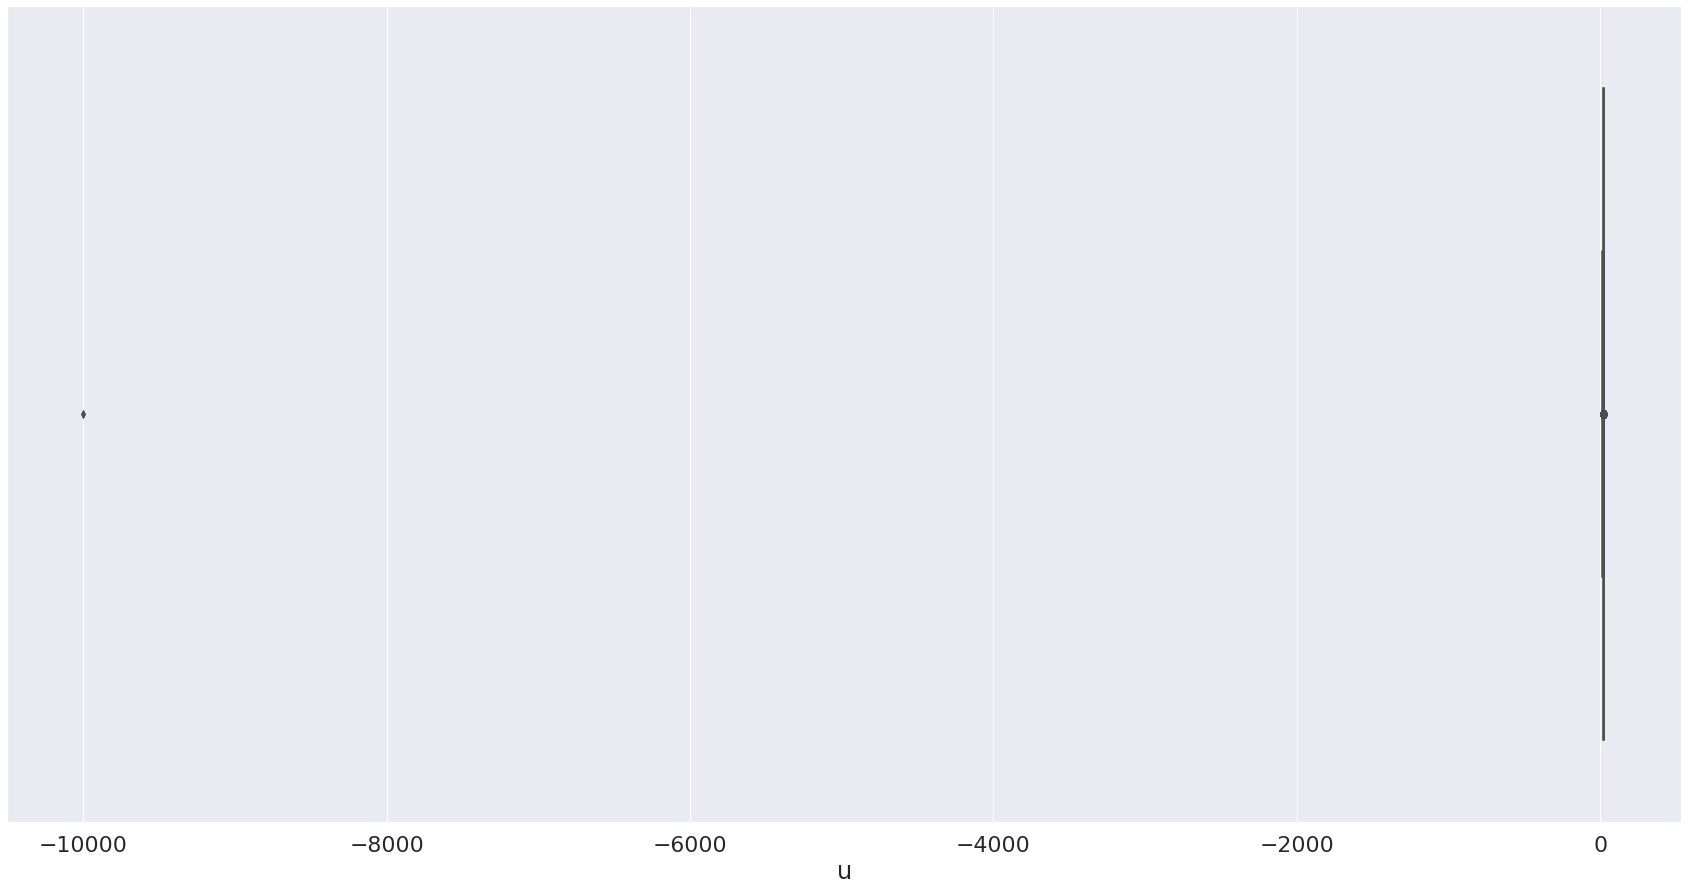

In [516]:
# before removing outliers
before_outlier_removal('u')

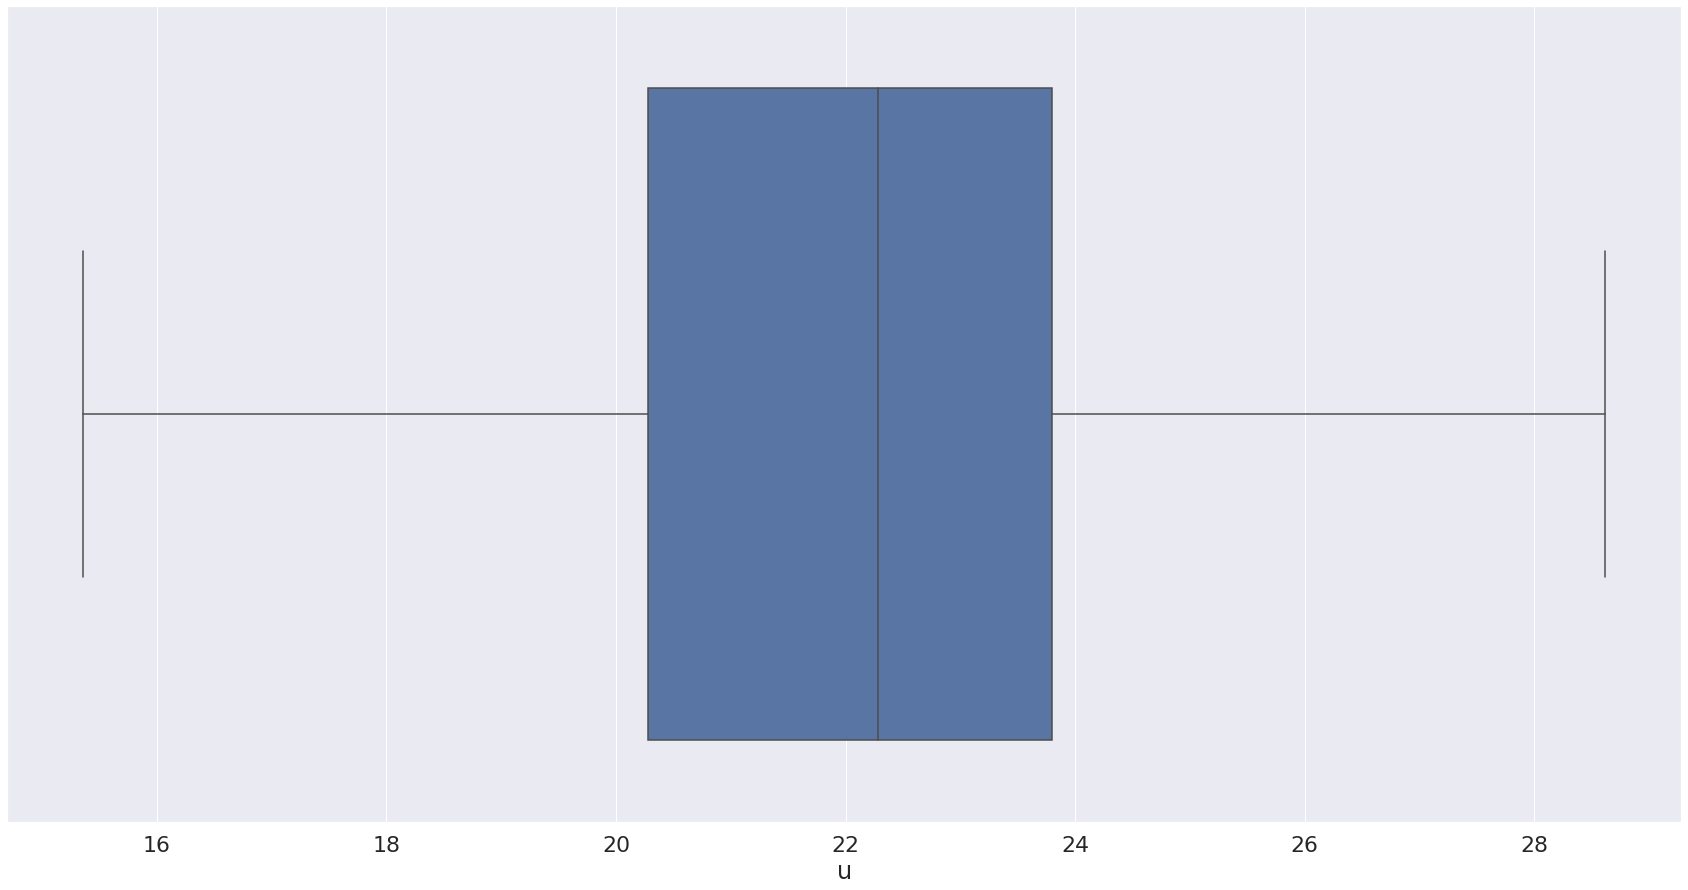

In [517]:
# after removing outliers, all outliers are gone now
after_outlier_removal('u')

### Feature Outlier Removal Comparison (g)

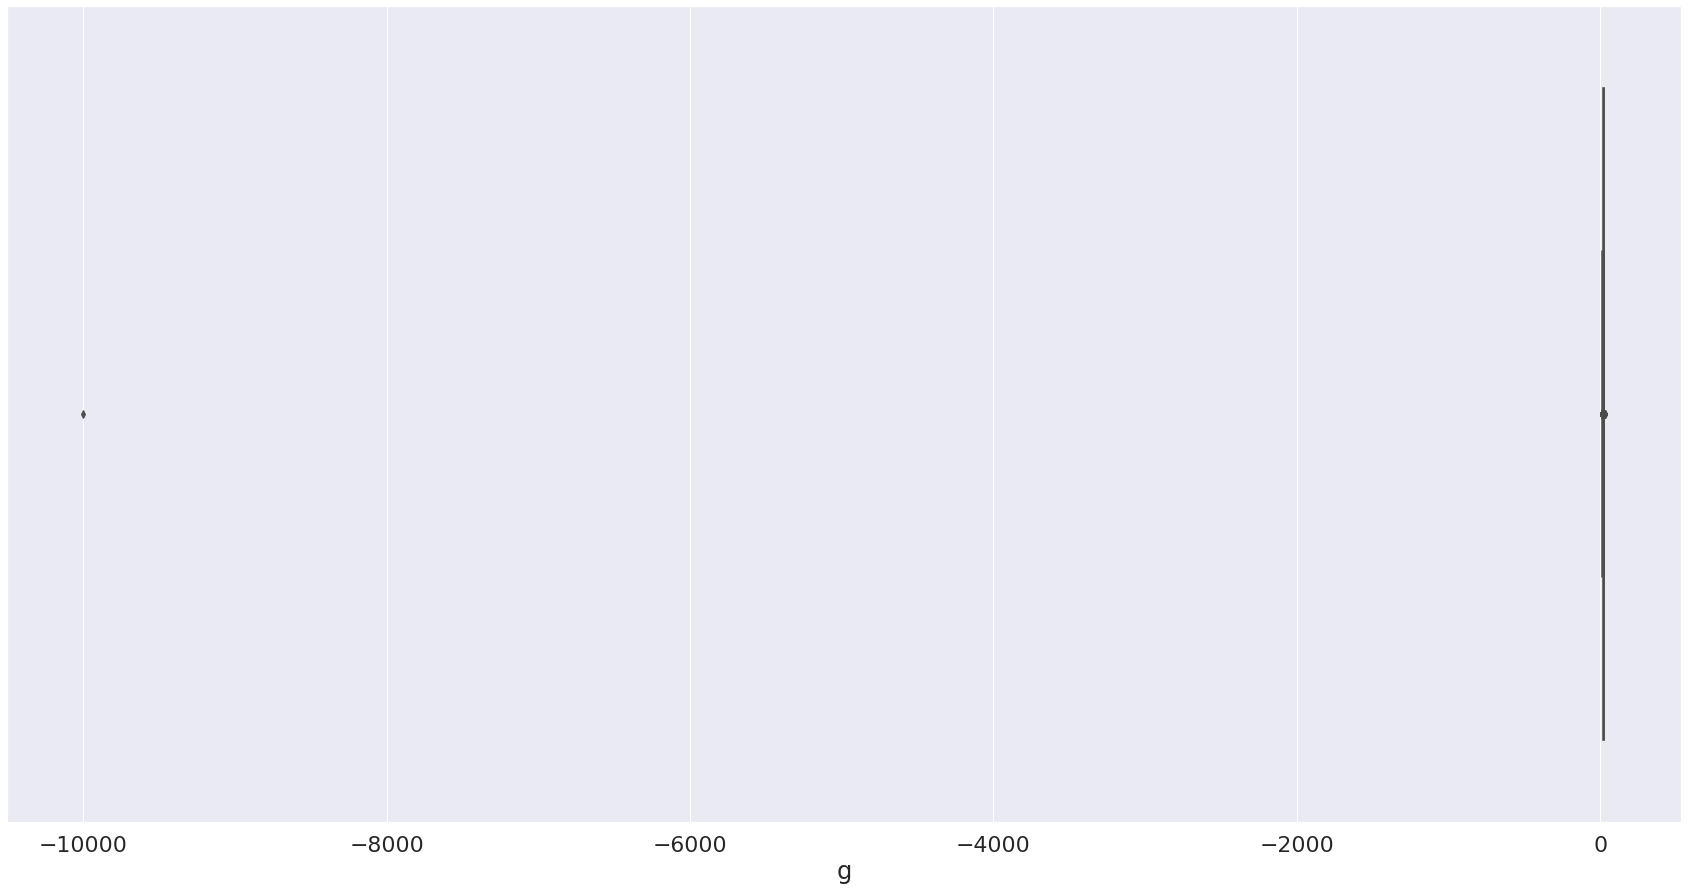

In [518]:
# before removing outliers
before_outlier_removal('g')

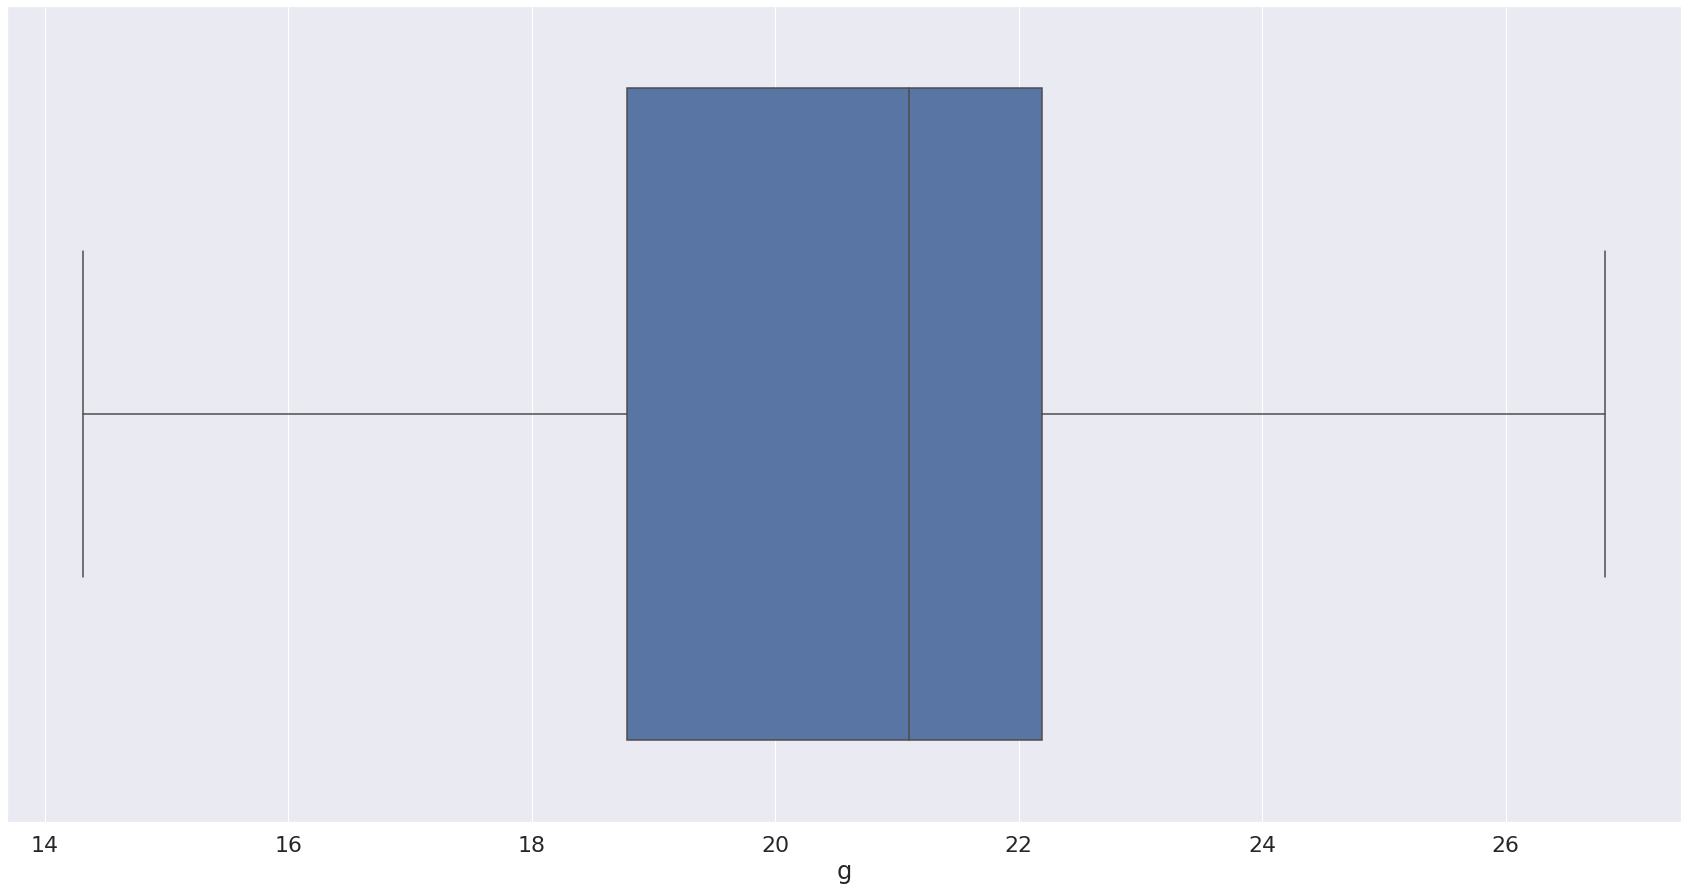

In [519]:
# after removing outliers, all outliers are gone now
after_outlier_removal('g')

### Feature Outlier Removal Comparison (r)

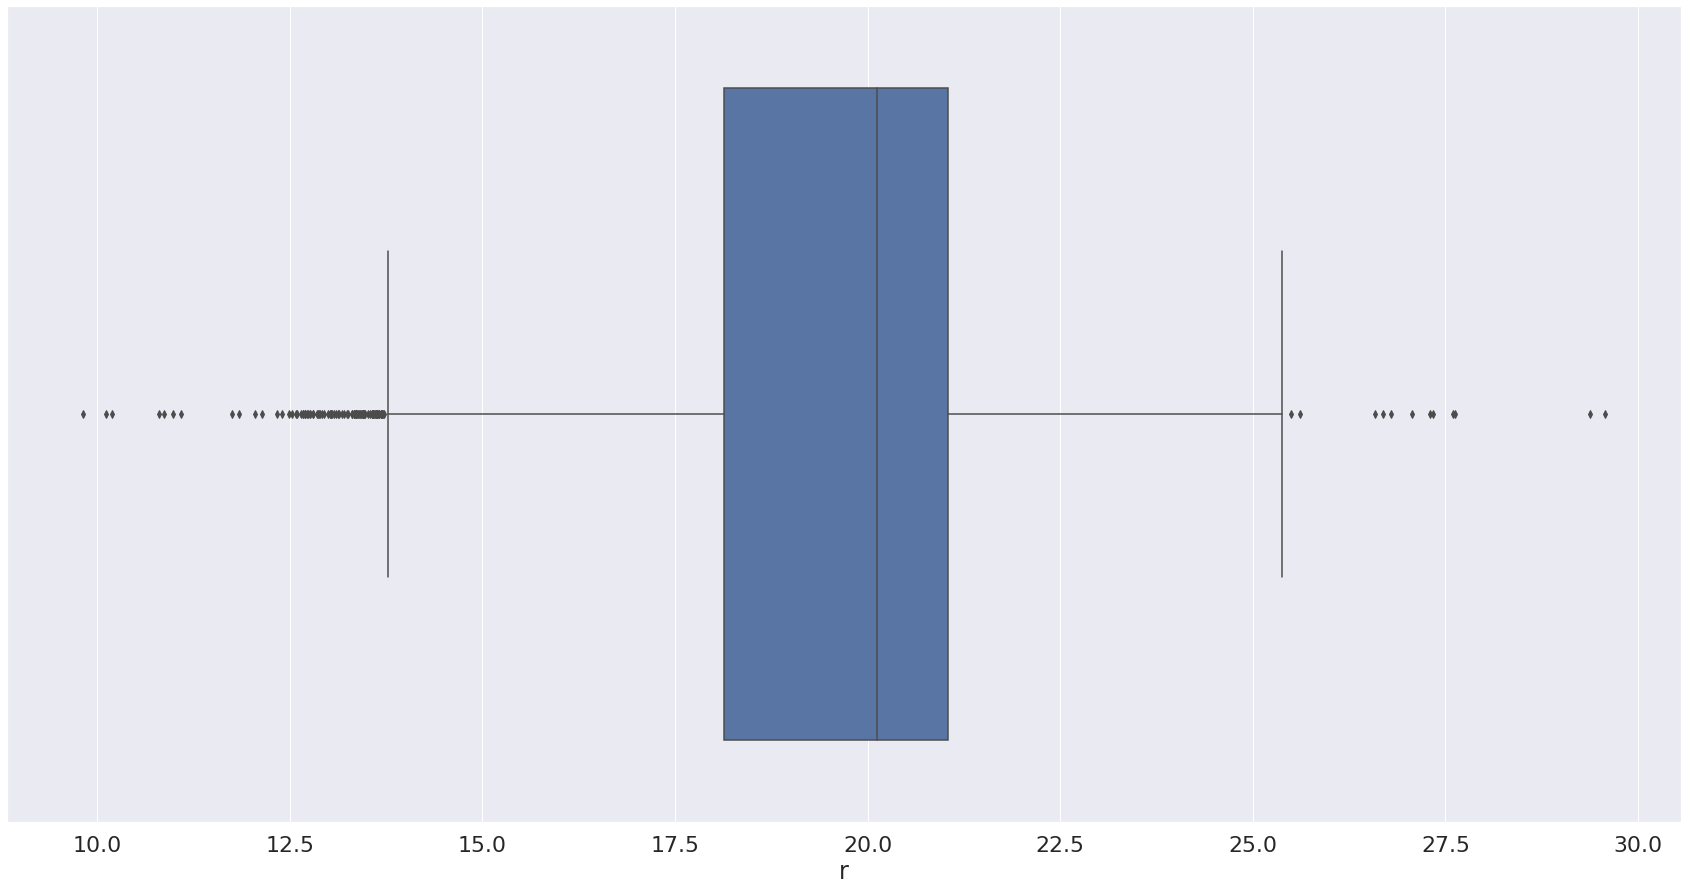

In [520]:
# before removing outliers
before_outlier_removal('r')

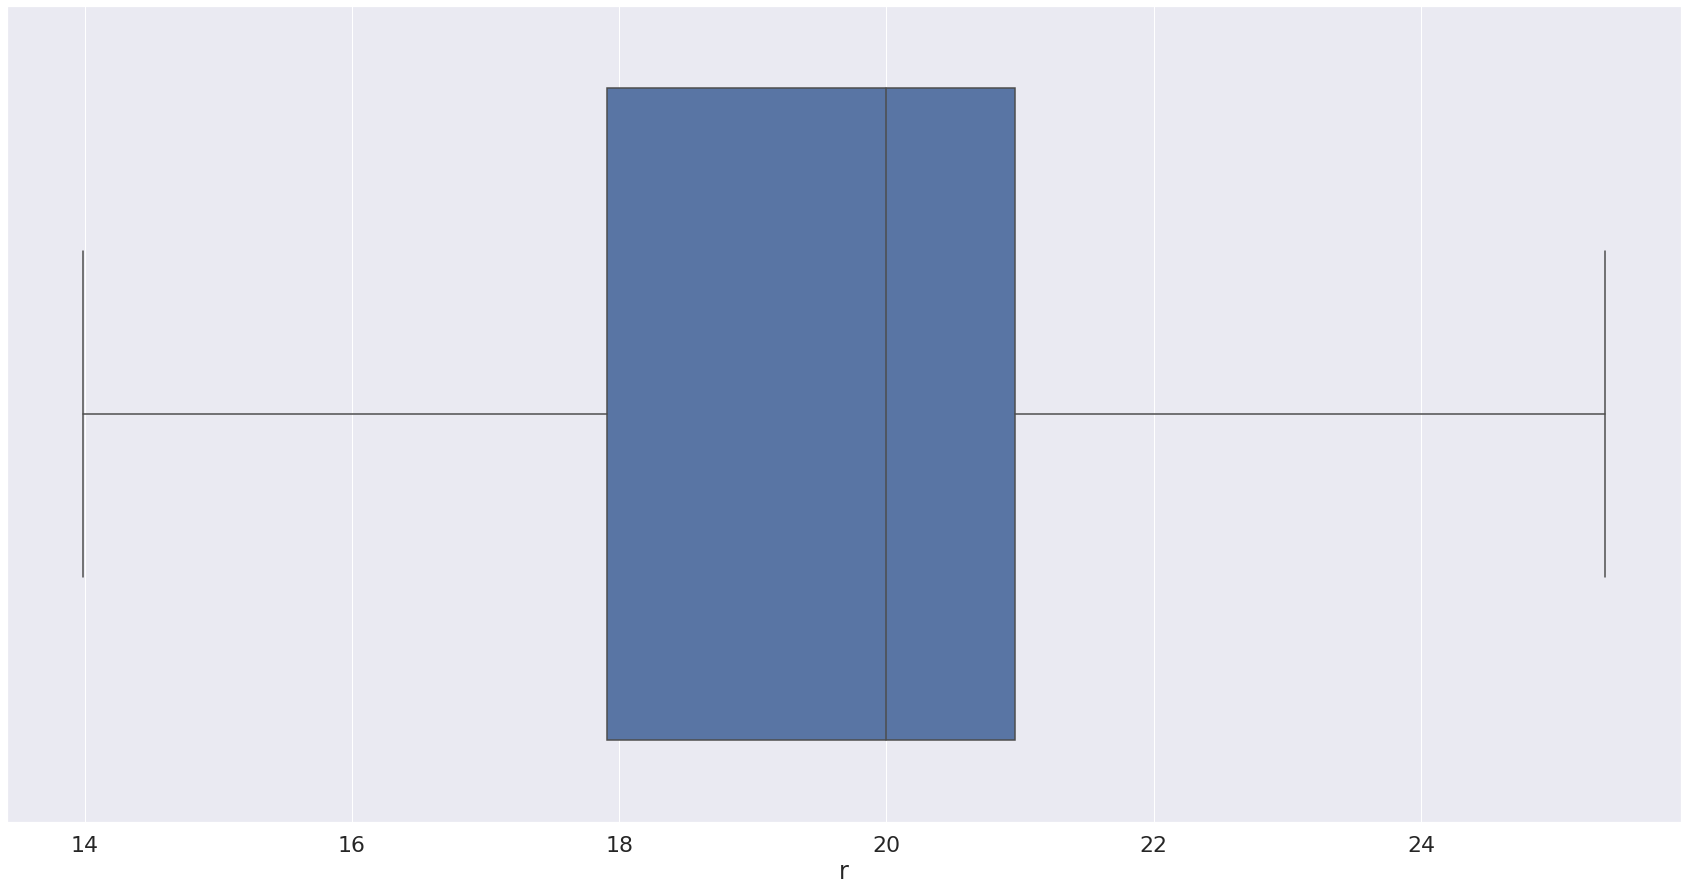

In [521]:
# after removing outliers, all outliers are gone now
after_outlier_removal('r')

### Feature Outlier Removal Comparison (i)

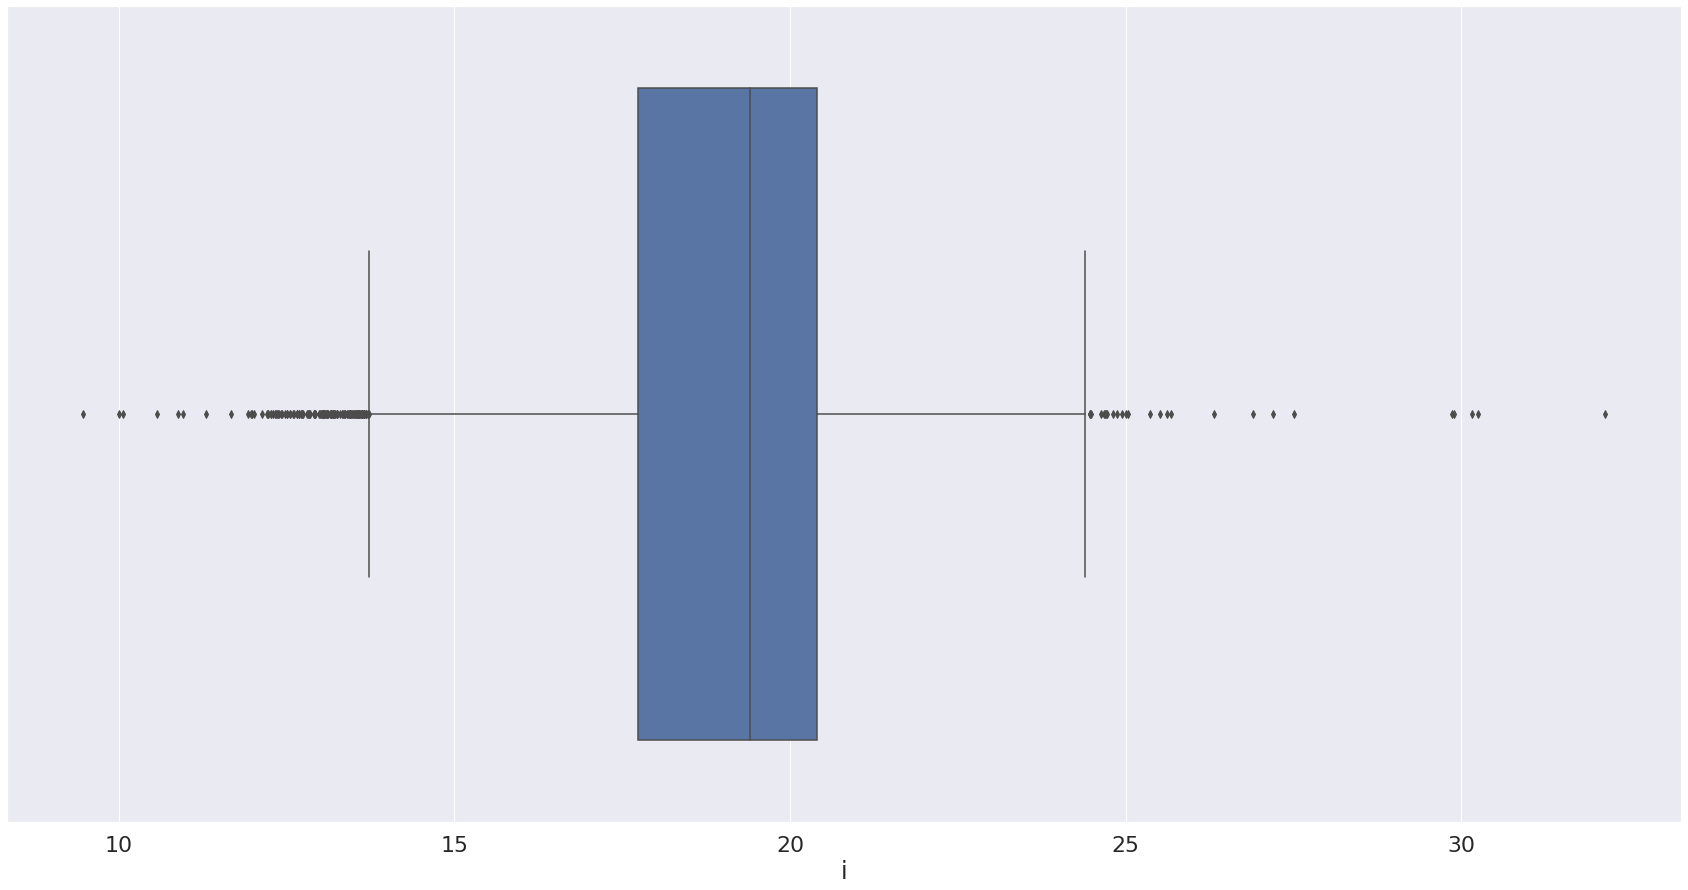

In [522]:
# before removing outliers
before_outlier_removal('i')

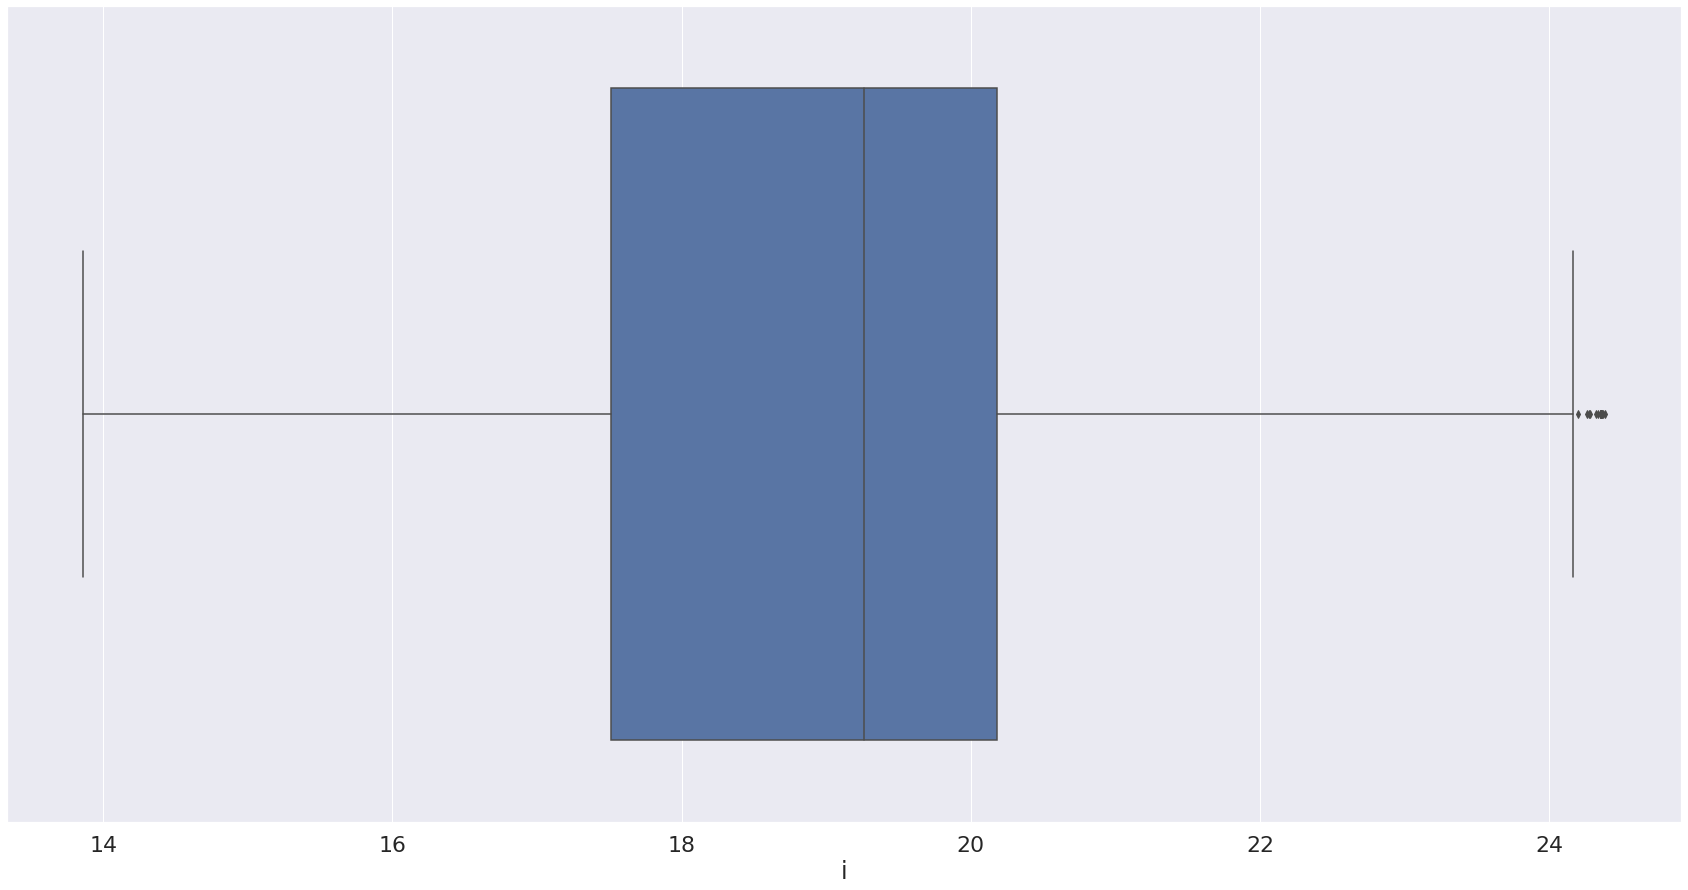

In [523]:
# some outliers rename 
after_outlier_removal('i')

### Feature Outlier Removal Comparison (z)

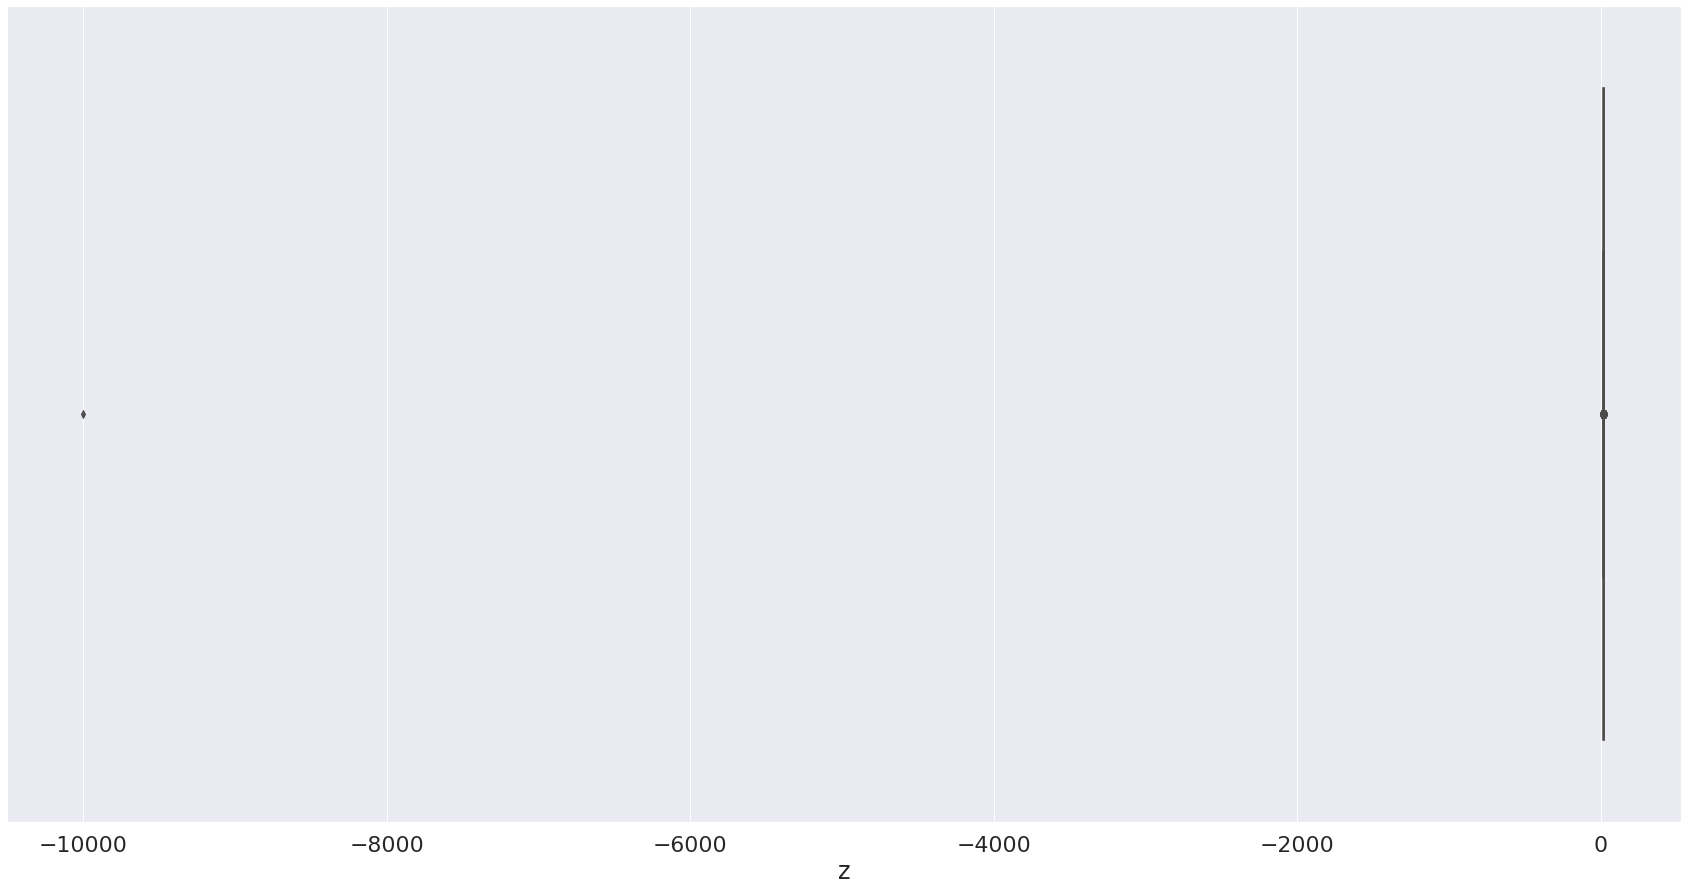

In [524]:
# before removing outliers
before_outlier_removal('z')

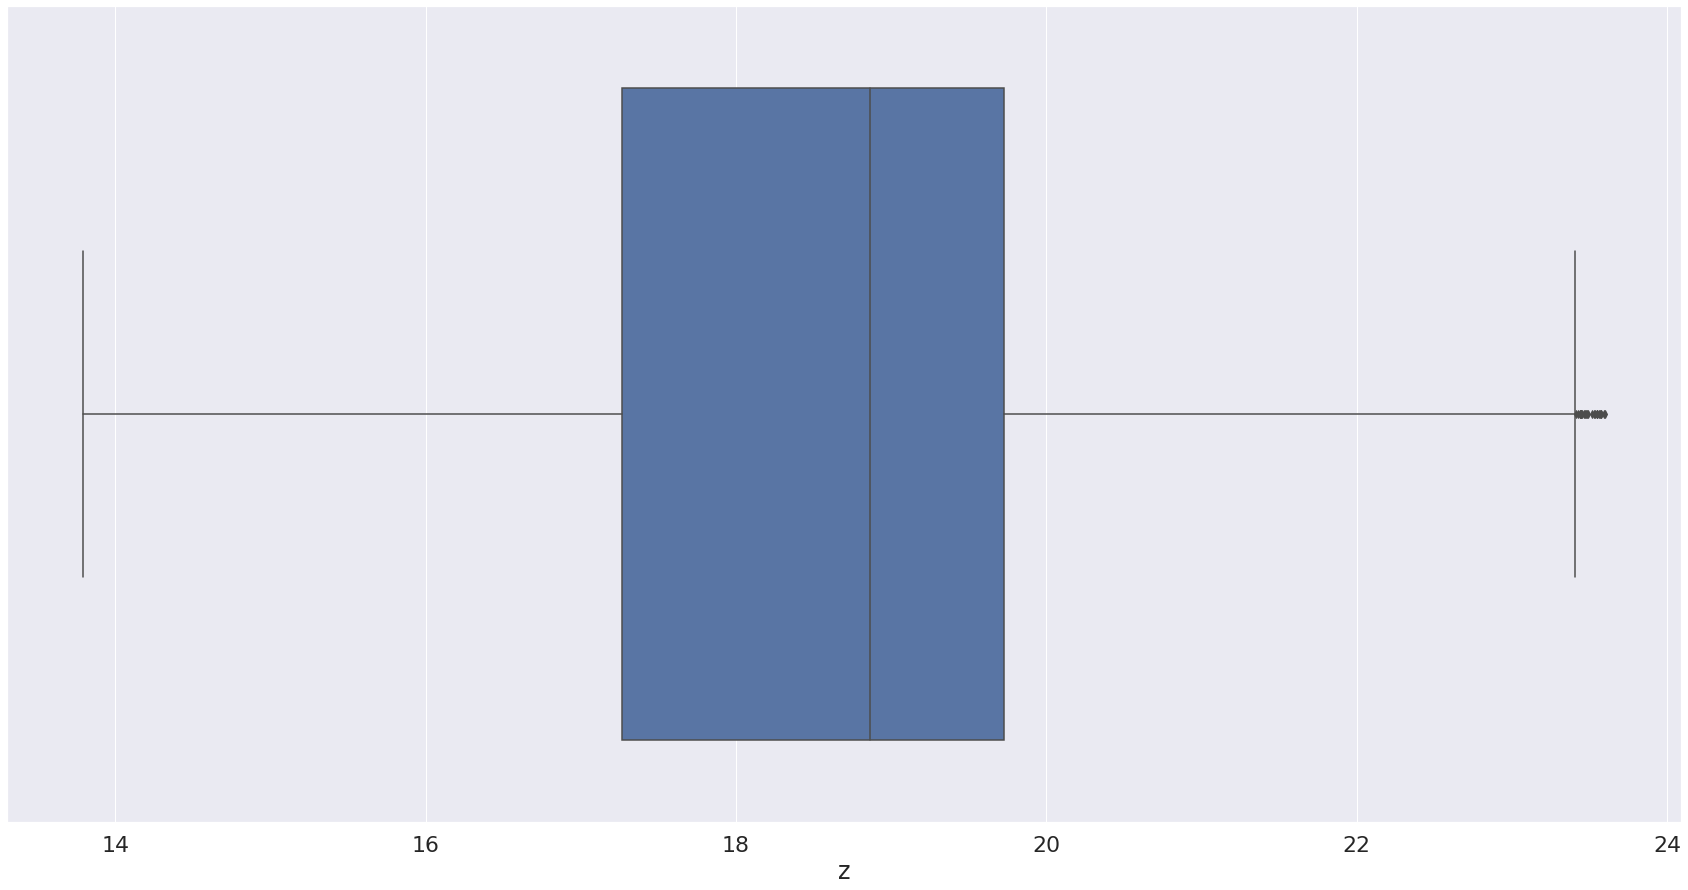

In [525]:
# some outliers rename 
after_outlier_removal('z')

### Feature Outlier Removal Comparison (spec_obj_ID)

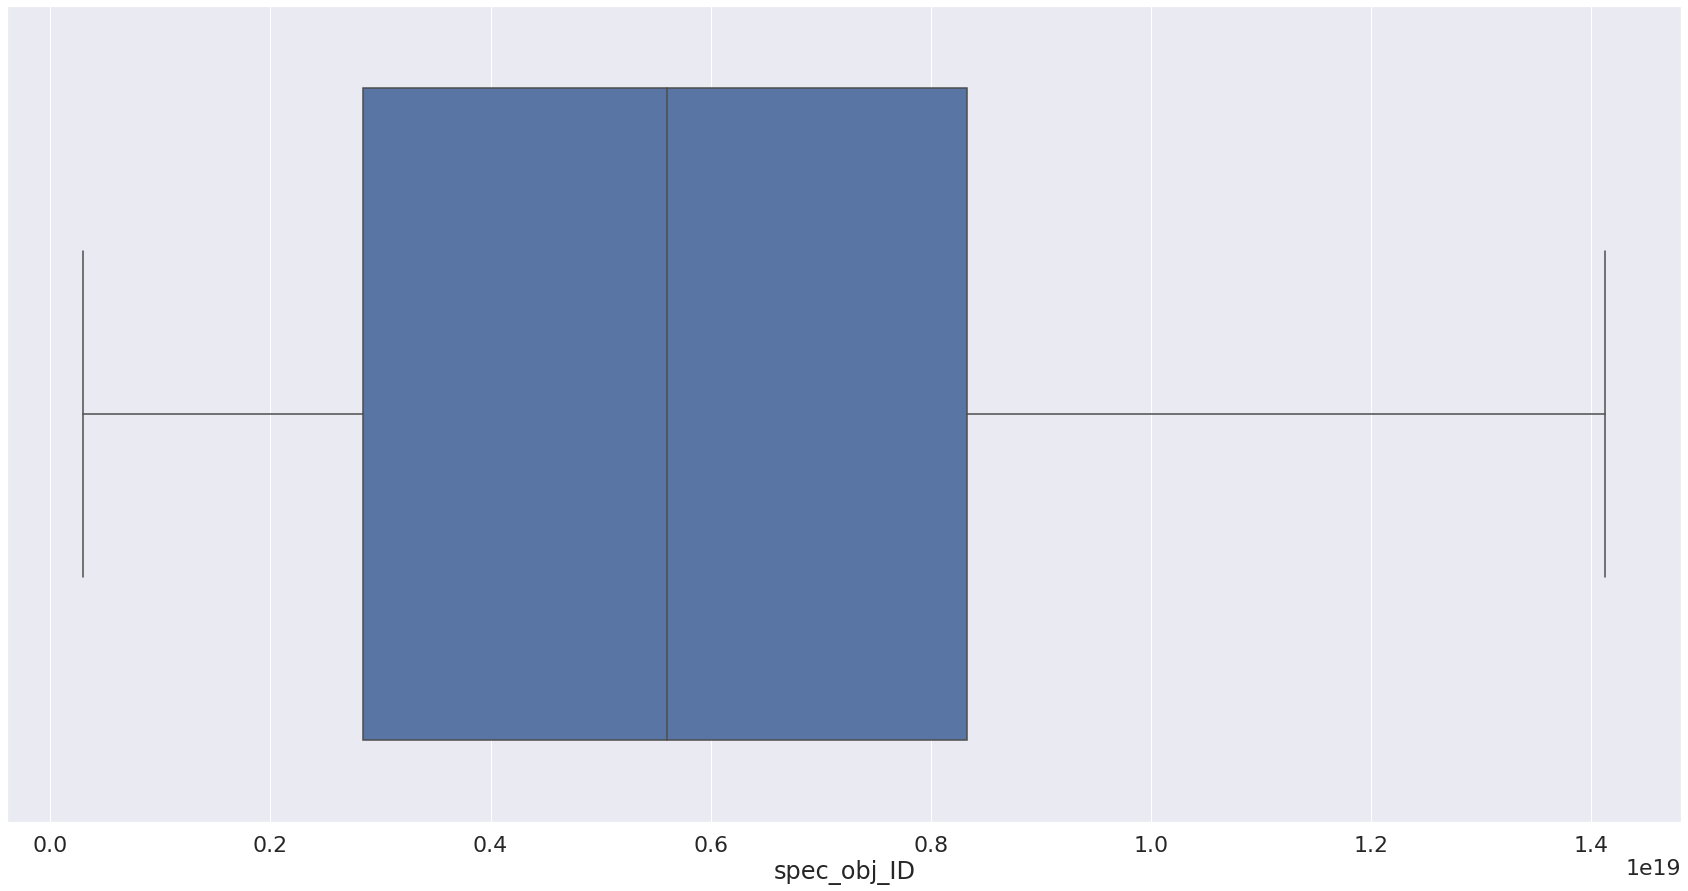

In [526]:
# before removing outliers
before_outlier_removal('spec_obj_ID')

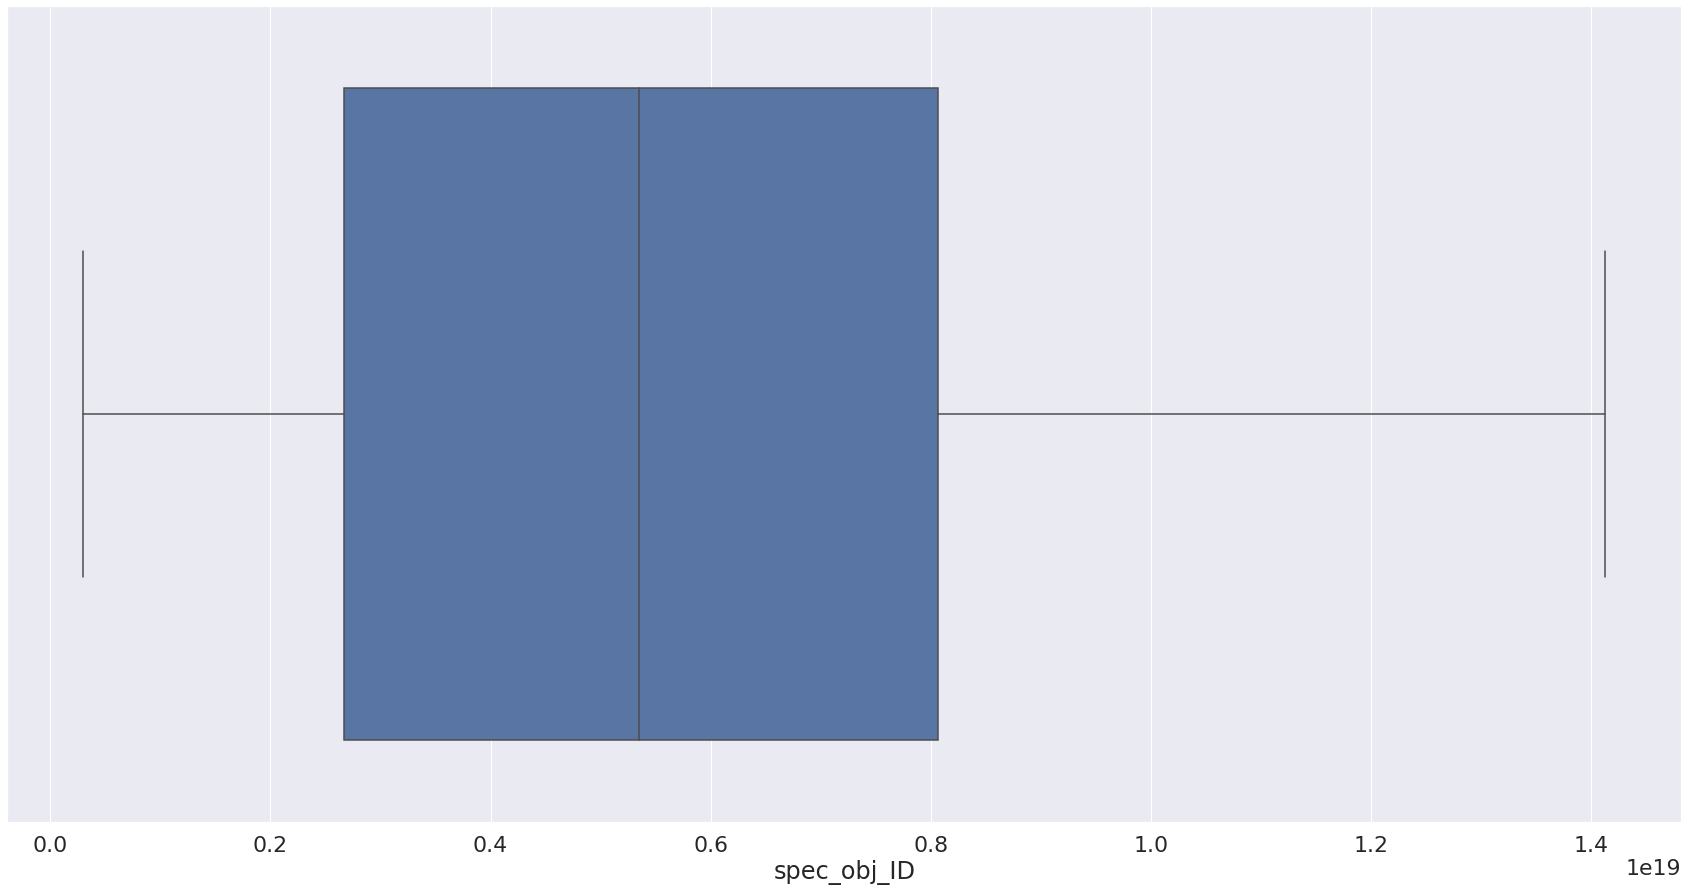

In [527]:
# no changes was made as the original didnt have any outliers
after_outlier_removal('spec_obj_ID')

### Feature Outlier Removal Comparison (redshift)

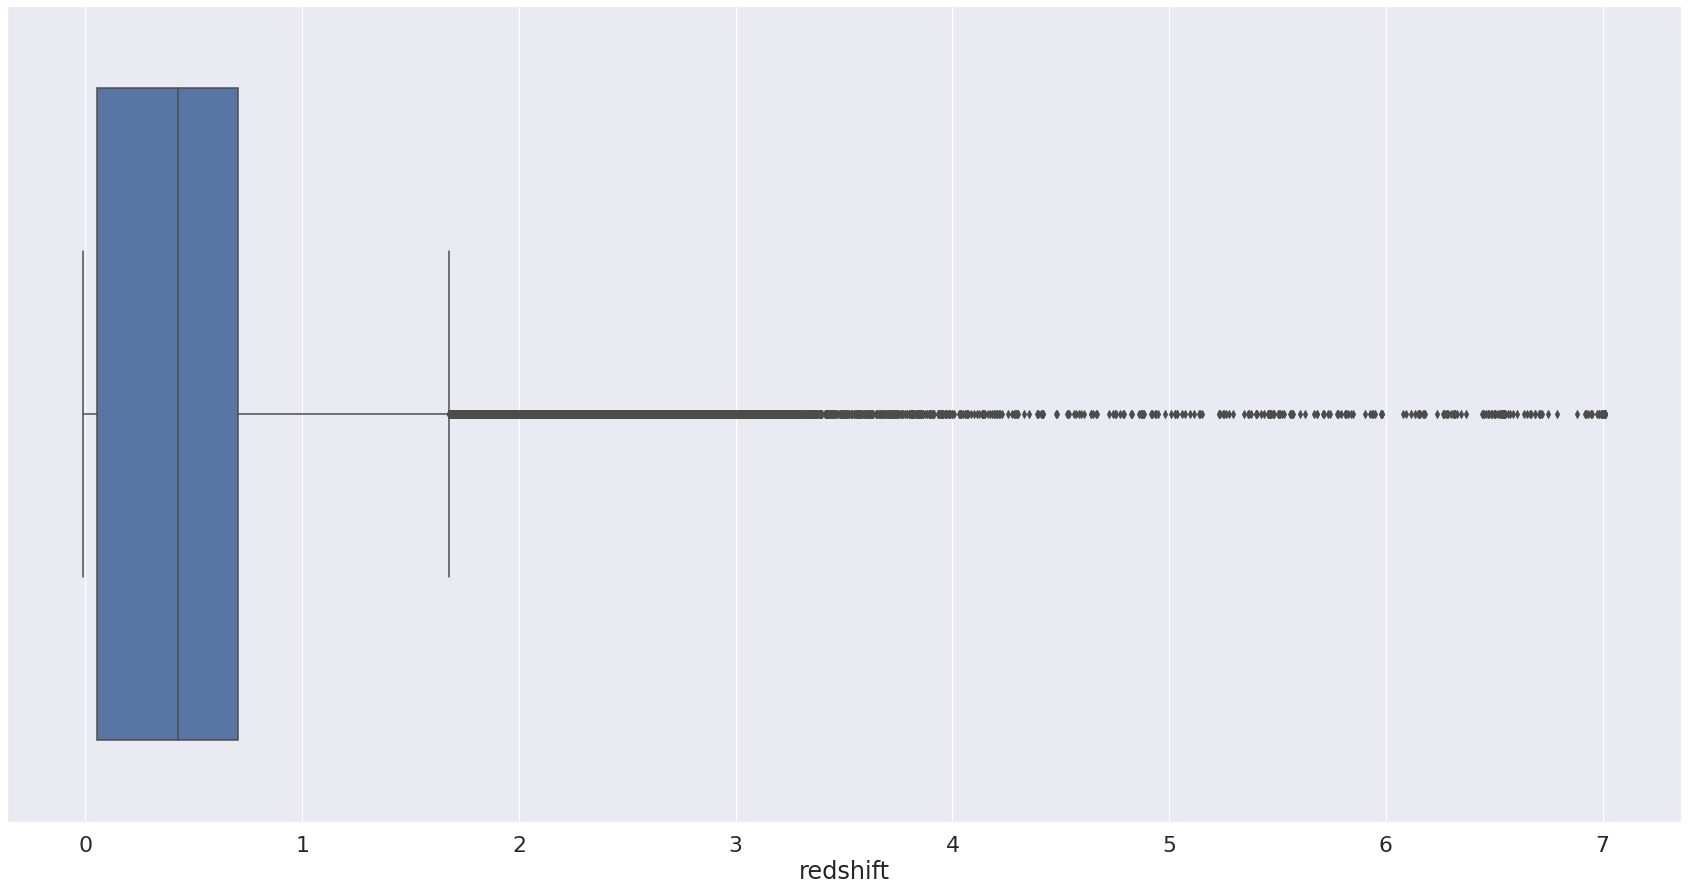

In [528]:
# before removing outliers
before_outlier_removal('redshift')

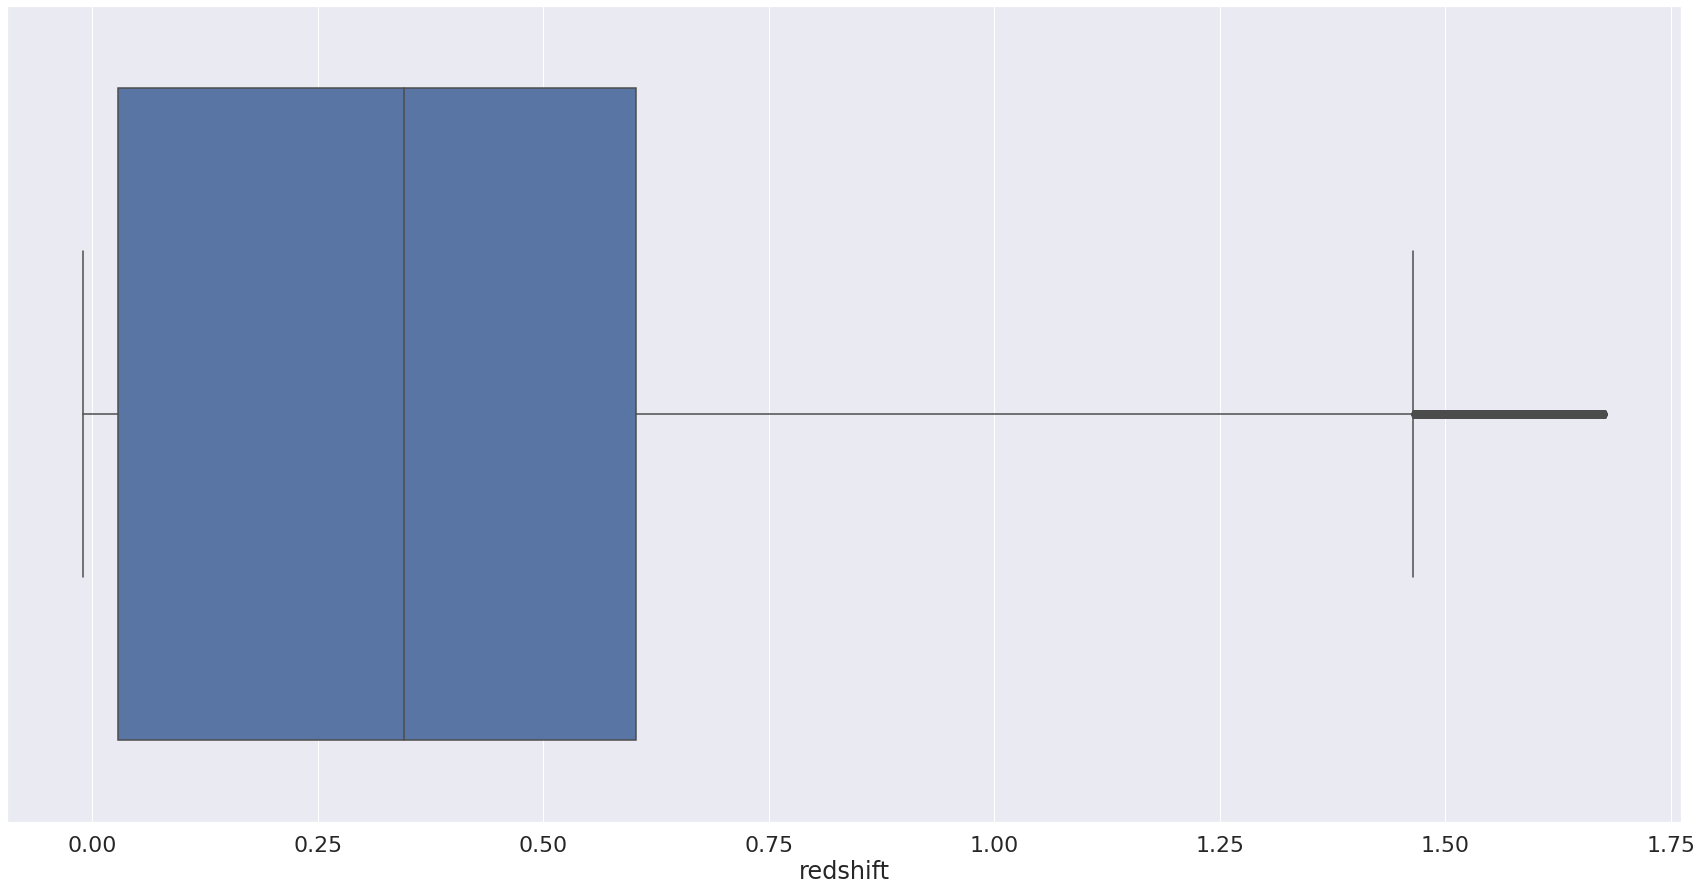

In [529]:
# some outliers rename 
after_outlier_removal('redshift')

### Feature Outlier Removal Comparison (plate)

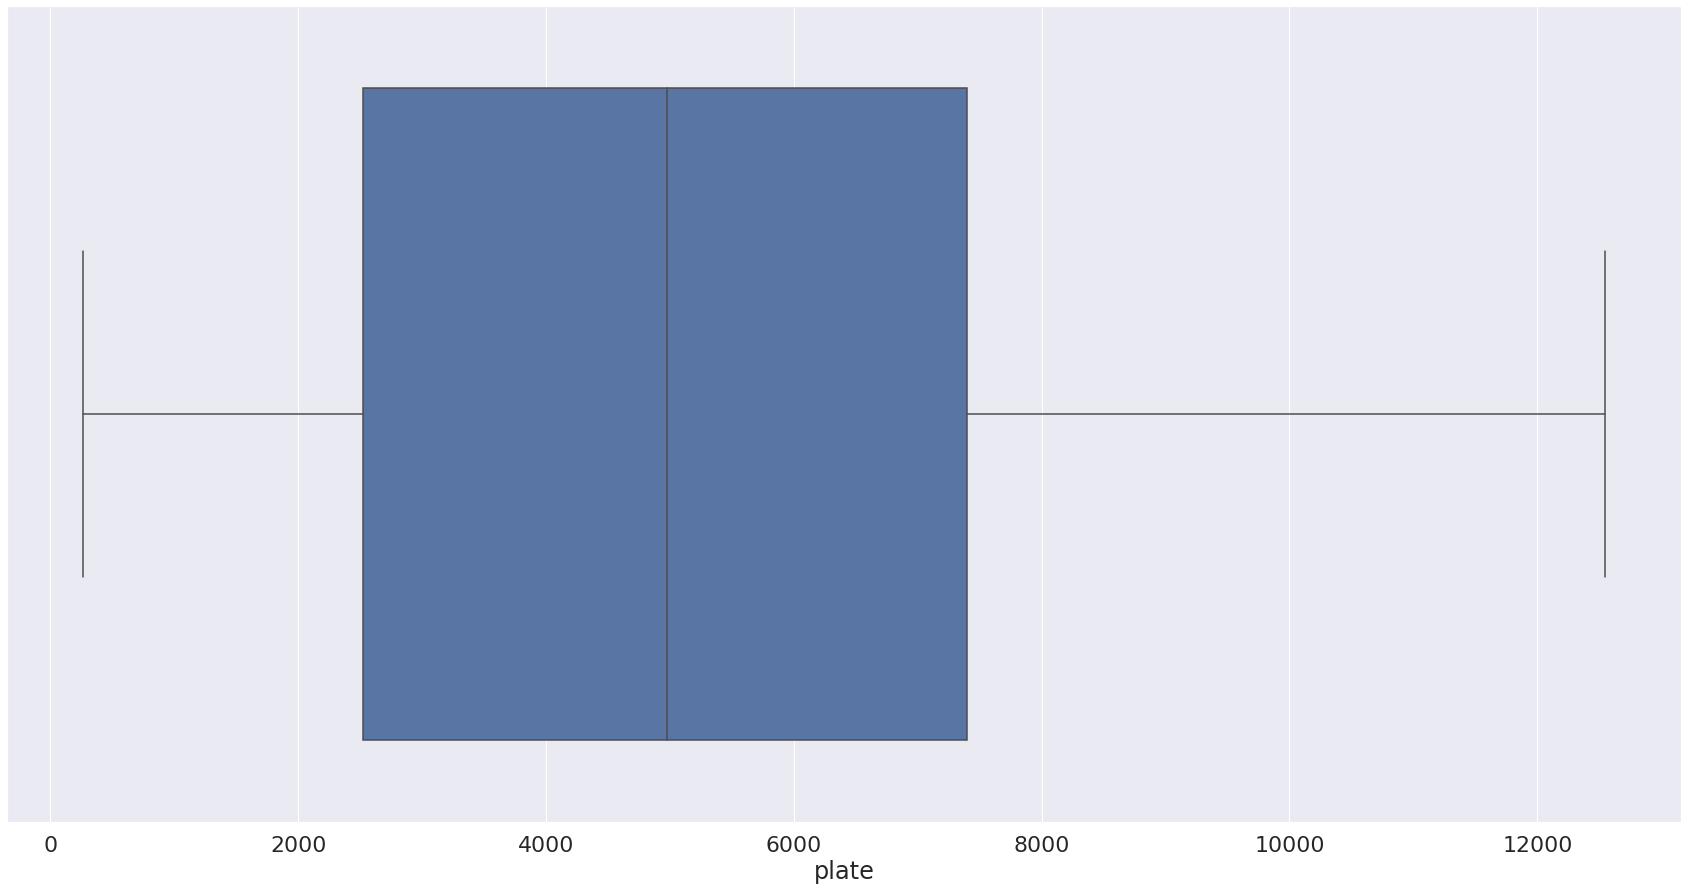

In [530]:
# before removing outliers
before_outlier_removal('plate')

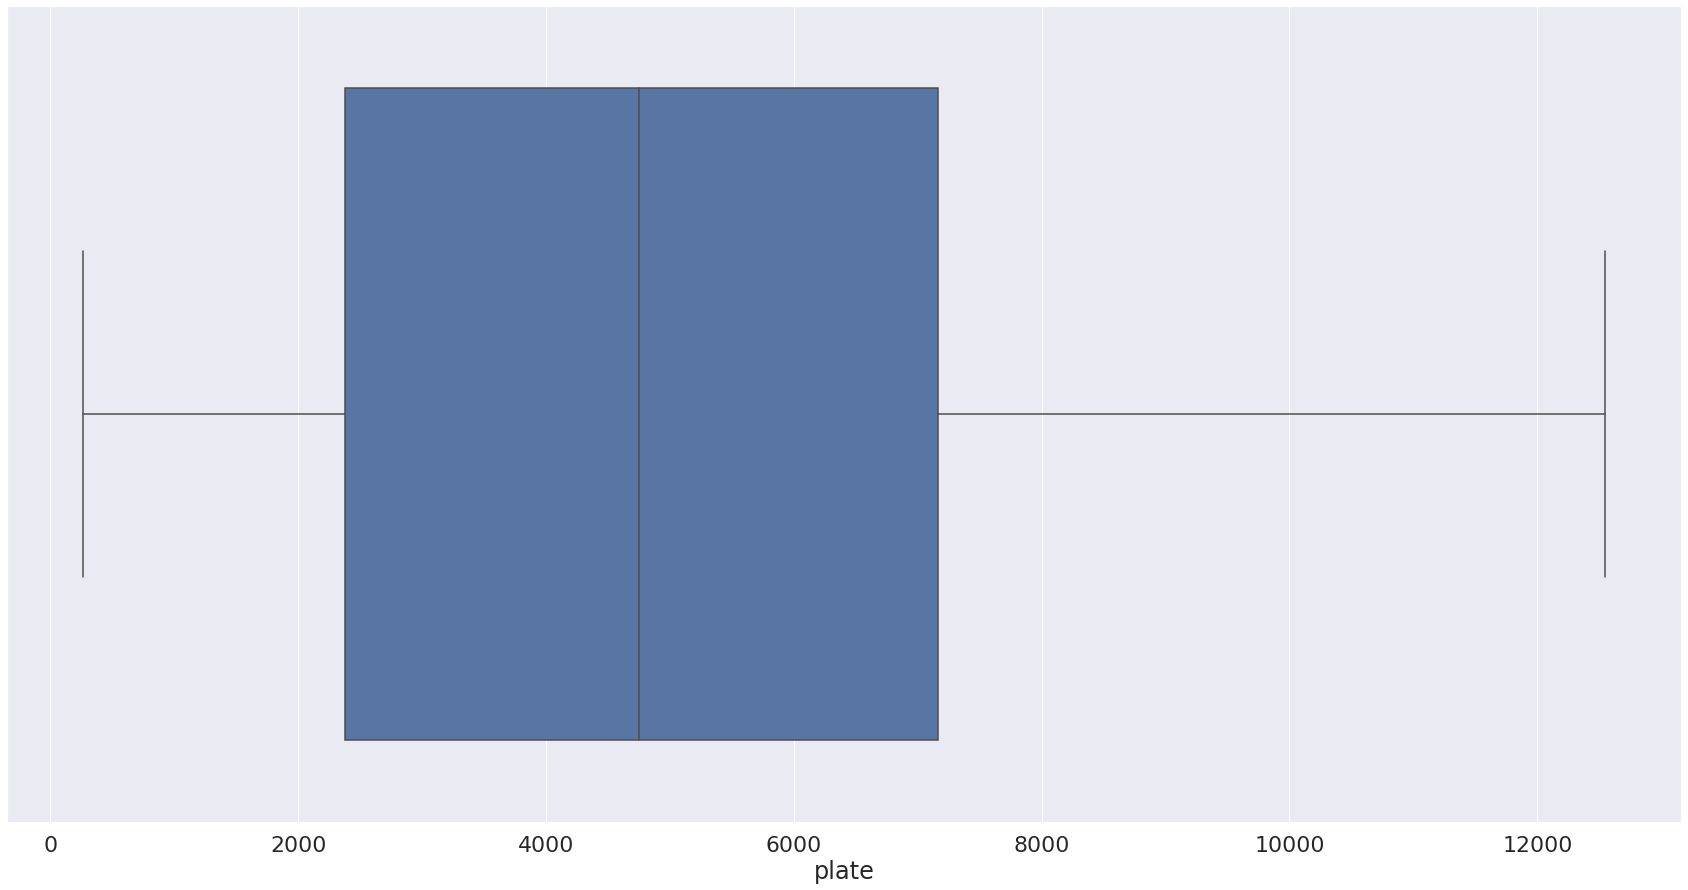

In [531]:
# no changes was made as the original didnt have any outliers
after_outlier_removal('plate')

### Feature Outlier Removal Comparison (MJD)

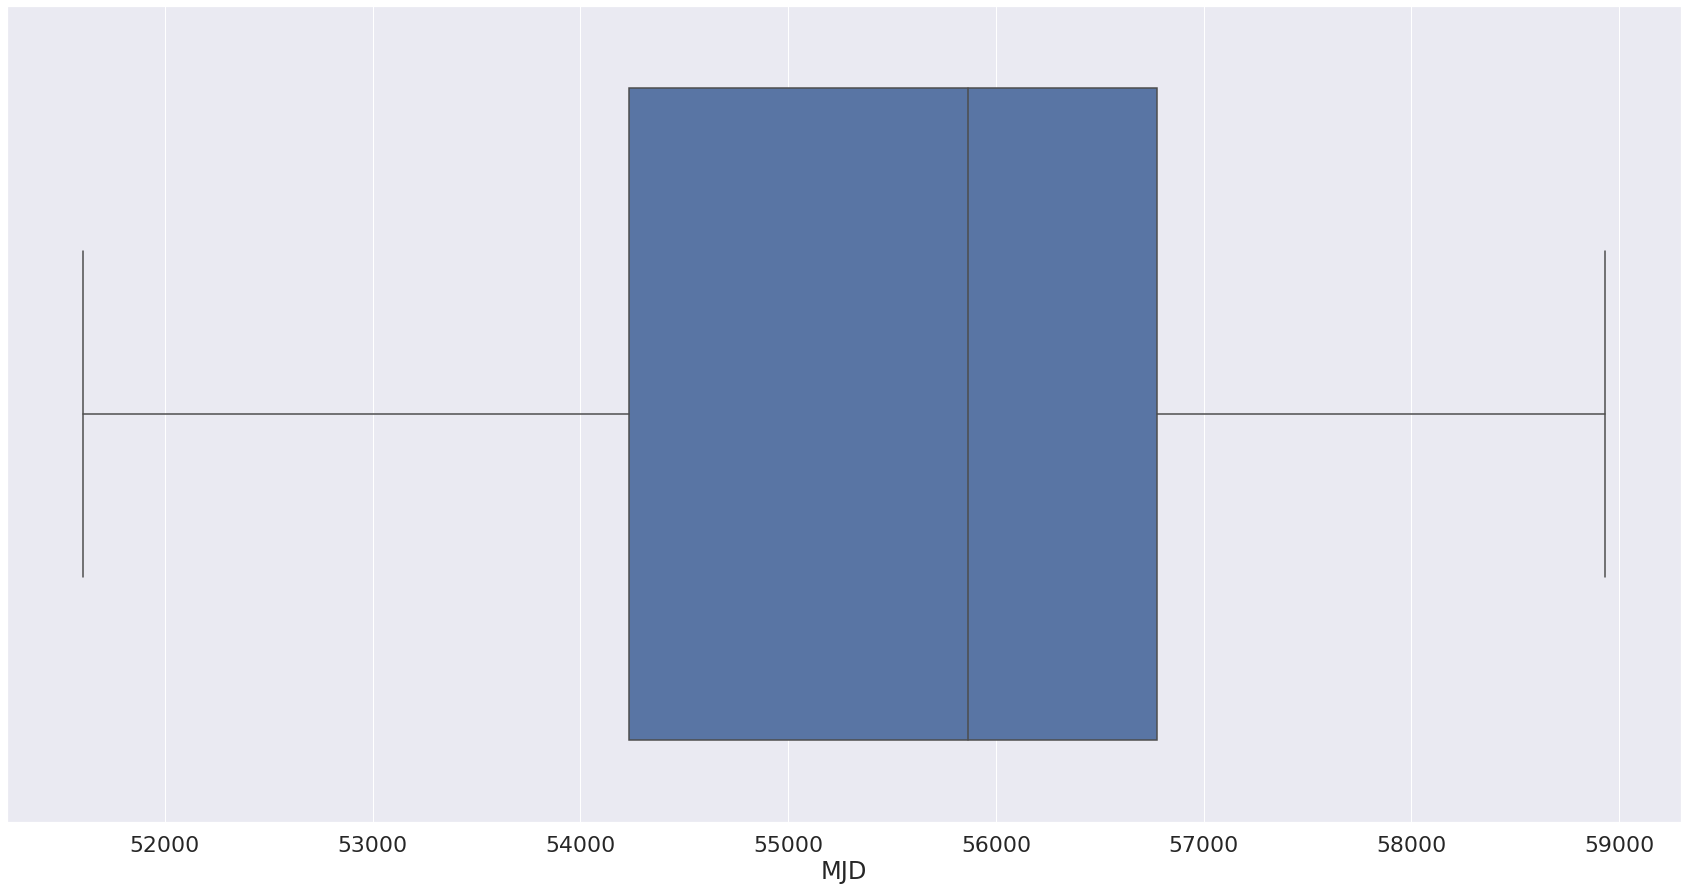

In [532]:
# before removing outliers
before_outlier_removal('MJD')

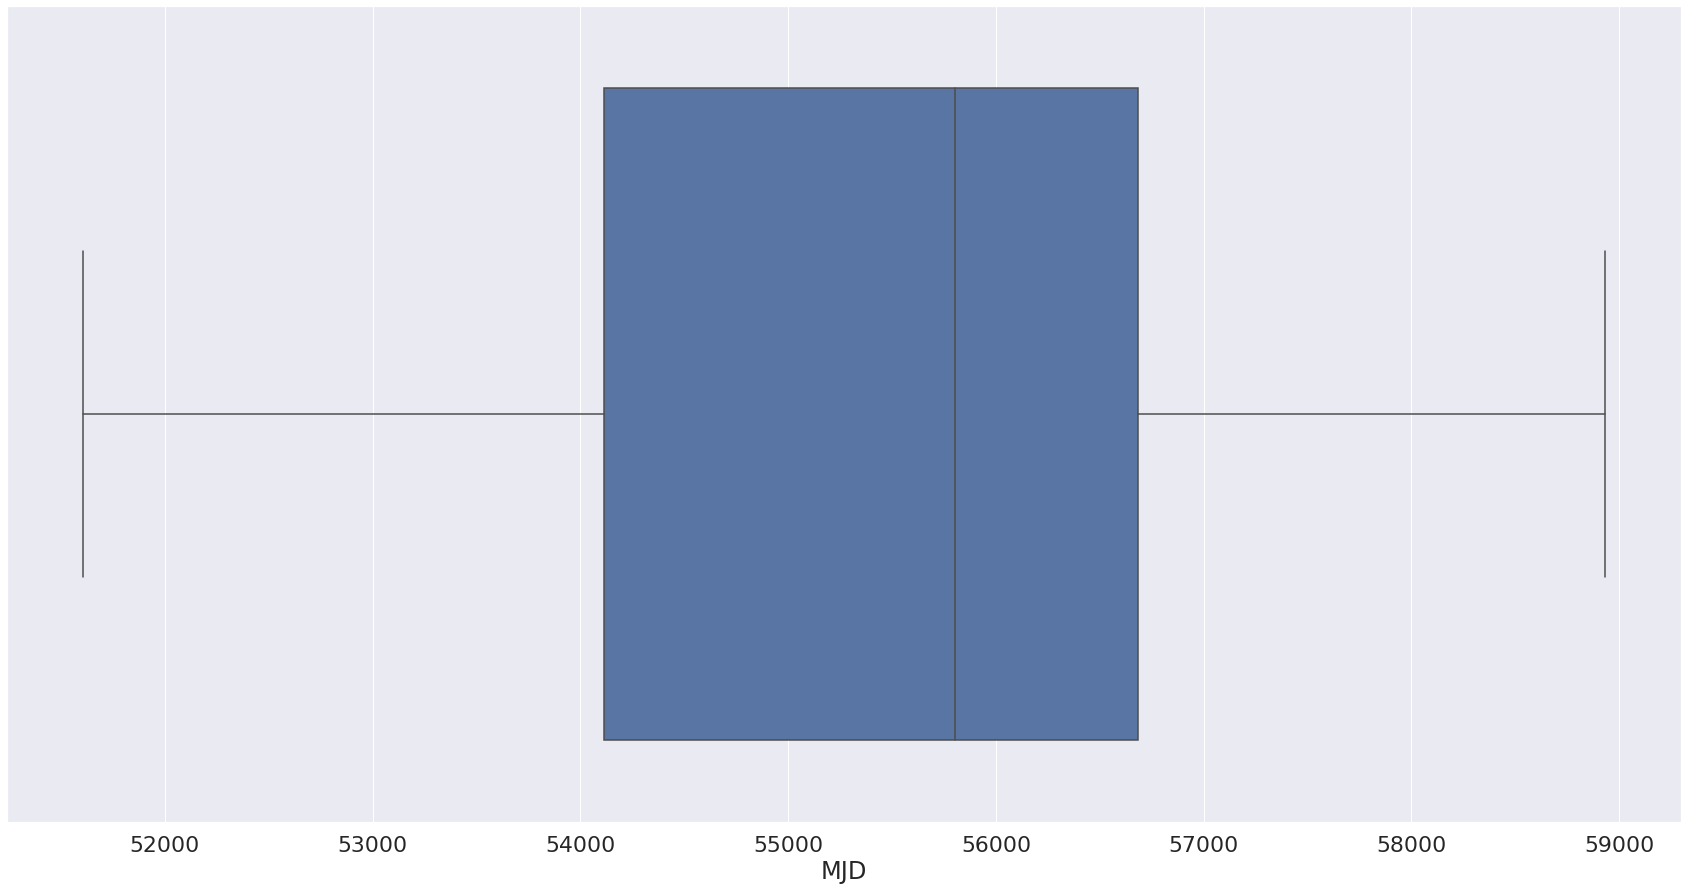

In [533]:
# no changes was made as the original didnt have any outliers
after_outlier_removal('MJD')

## 3.4 - Checking and Fixing Missing Values (Data Cleaning)

> 



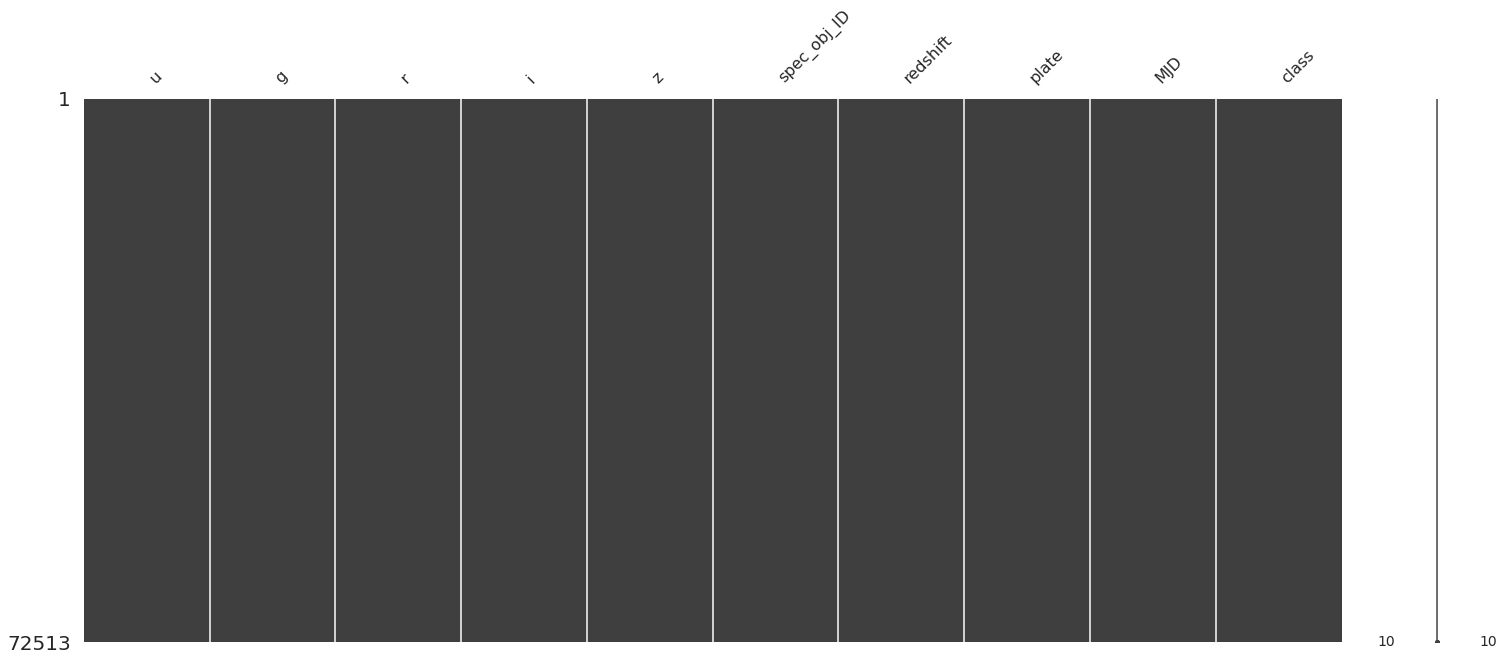

In [534]:
# this graph represents any patterns witin our dataset in terms of missing NULL values on the training set.
# there is a consistant pattern with any gaps, meaning there are no missing NULL values in the training set.

msno.matrix(df_train)

In [535]:
# no missing values where found after the IQR method on the training set as it removes the whole observation containing and outlier 

# view the number of missing values for each feature within the training set
df_train.isnull().sum()

u              0
g              0
r              0
i              0
z              0
spec_obj_ID    0
redshift       0
plate          0
MJD            0
class          0
dtype: int64

In [536]:
# shows all features are int/float datatype 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72513 entries, 75220 to 15795
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   u            72513 non-null  float64
 1   g            72513 non-null  float64
 2   r            72513 non-null  float64
 3   i            72513 non-null  float64
 4   z            72513 non-null  float64
 5   spec_obj_ID  72513 non-null  float64
 6   redshift     72513 non-null  float64
 7   plate        72513 non-null  int64  
 8   MJD          72513 non-null  int64  
 9   class        72513 non-null  object 
dtypes: float64(7), int64(2), object(1)
memory usage: 8.1+ MB


In [537]:
# counts the amount of values that are 0 in the dataset, these must also be
(df_train == 0).sum().sum()

323

In [538]:
## this removes all observations that have 0 in it
df_train = df_train[(df_train != 0).all(1)]

# can see now there are no values that are 0
(df_train == 0).sum().sum()

0

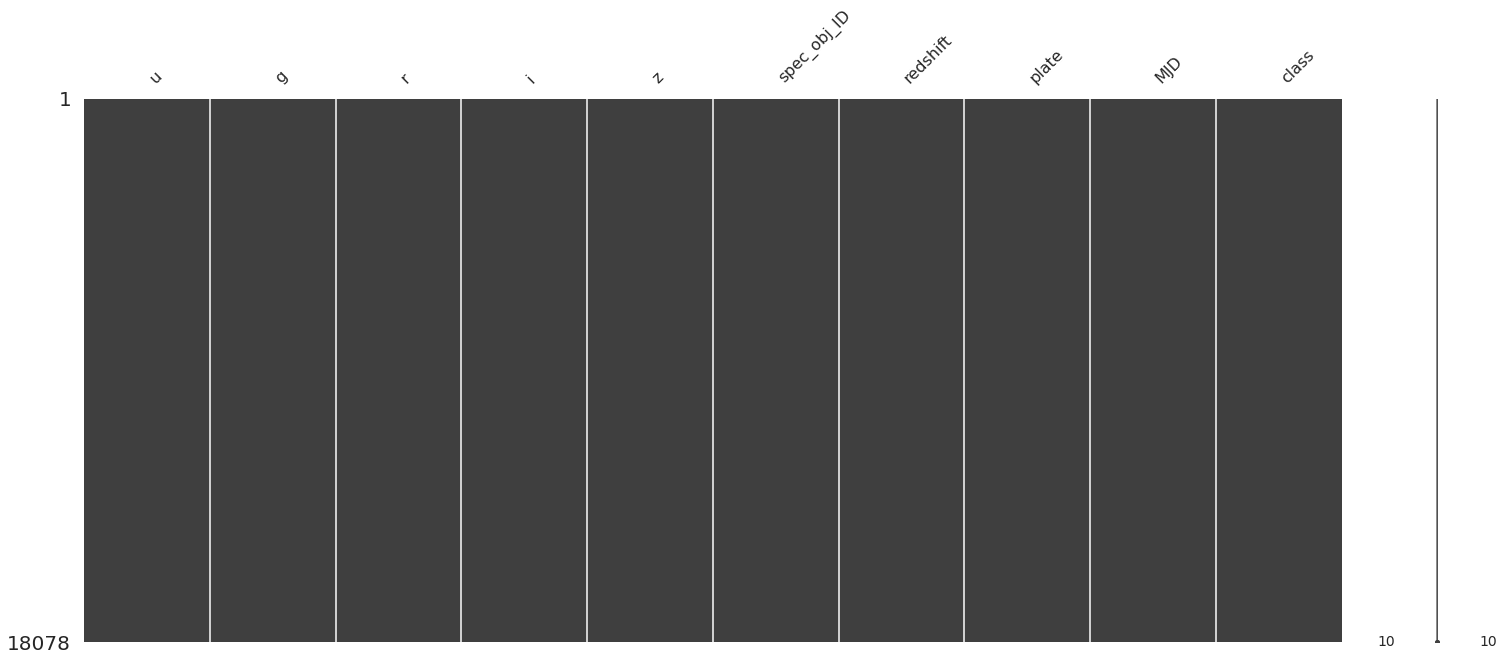

In [539]:
# this graph represents any patterns witin our dataset in terms of missing NULL values on the testing set.
# there is a consistant pattern with any gaps, meaning there are no missing NULL values in the testing set.

msno.matrix(df_test)

In [540]:
# no missing values where found after the IQR method on the testing set as it removes the whole observation containing and outlier 

# view the number of missing values for each feature within the testing set
df_test.isnull().sum()

u              0
g              0
r              0
i              0
z              0
spec_obj_ID    0
redshift       0
plate          0
MJD            0
class          0
dtype: int64

In [541]:
# shows all features are int/float datatype 
# wont have any blank spaces as all datatypes are numbers
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72190 entries, 75220 to 15795
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   u            72190 non-null  float64
 1   g            72190 non-null  float64
 2   r            72190 non-null  float64
 3   i            72190 non-null  float64
 4   z            72190 non-null  float64
 5   spec_obj_ID  72190 non-null  float64
 6   redshift     72190 non-null  float64
 7   plate        72190 non-null  int64  
 8   MJD          72190 non-null  int64  
 9   class        72190 non-null  object 
dtypes: float64(7), int64(2), object(1)
memory usage: 6.1+ MB


In [542]:
# counts the amount of values that are 0 in the dataset, these must also be removed
(df_test == 0).sum().sum()

86

In [543]:
# this removes all observations that have 0 in it
df_test = df_test[(df_test != 0).all(1)]

# can see now there are no values that are 0
(df_test == 0).sum().sum()

0

## 3.5 - Encoding Target Class (Data Encoding)

In [544]:
# estabish lebel encoder
encoder = LabelEncoder()

# encode the class column on the training set and replace the old class colum

df_train['class'] = encoder.fit_transform(df_train['class'])

<ipython-input-544-42094a5dda6b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['class'] = encoder.fit_transform(df_train['class'])


In [545]:
# encode the class column on the testing set and replace the old class colum

df_test['class'] = encoder.fit_transform(df_test['class'])

<ipython-input-545-b018c88a5ae4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['class'] = encoder.fit_transform(df_test['class'])


In [546]:
# can see now the target class is encodes

df_train['class']

75220    0
48955    0
44966    0
13568    0
92727    2
        ..
37194    0
82386    1
54886    0
76820    2
15795    0
Name: class, Length: 72190, dtype: int64

In [547]:
# it is not 0,2,1
# initally it was GALAXY, QSO, STAR

df_train['class'].unique()

array([0, 2, 1])

## 3.6 - Normalization (Data Scaling)

> 



In [548]:
# seperete target class and features from the training and testing set to preform normizaltion just onto the features

# training set
X_train = df_train.drop(["class"], axis = 1)
Y_train = df_train["class"]

# testing set
X_test = df_test.drop(["class"], axis = 1)
Y_test = df_test["class"]

In [549]:
# decided to normalize the data using MinMaxScaler to remove unwanted noise from dataset like duplicated observations and redundancies.
# this was done for both the testing and training set as both need to be normalizsed for them to be fit into the model

# initiize scaler variable for MinMaxScaler function
scaler = MinMaxScaler()
# fit with training to estimate the minimum and maximum observable values for when training and testing set are transformed
scaler.fit(X_train)

# normalizing training set
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train)

# normalizing testing set
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)

In [550]:
# shows how the new dataset looks after normalization
X_train

0         1         2         3         4         5         6  \
0      0.525182  0.566664  0.572816  0.547707  0.566357  0.349798  0.397045   
1      0.791571  0.792652  0.658188  0.619662  0.570472  0.608176  0.488298   
2      0.548185  0.567986  0.487989  0.476525  0.469560  0.411284  0.245544   
3      0.369597  0.337263  0.315361  0.314238  0.312110  0.137441  0.070425   
4      0.503799  0.571775  0.644498  0.702980  0.752277  0.292243  0.005294   
...         ...       ...       ...       ...       ...       ...       ...   
72185  0.404545  0.350163  0.318037  0.311756  0.299273  0.091933  0.082446   
72186  0.494857  0.471646  0.517781  0.707873  0.682057  0.384420  0.560741   
72187  0.269502  0.211831  0.181697  0.169518  0.153968  0.060820  0.053998   
72188  0.648435  0.564663  0.505938  0.439819  0.405548  0.243955  0.006060   
72189  0.721932  0.541466  0.465024  0.456039  0.465677  0.301684  0.214870   

              7         8  
0      0.349809  0.540961  
1      0.608175  0.891316  
2      0.411286  0.599672  
3      0.137448  0.238804  
4      0.292240  0.499727  
...         ...       ...  
72185  0.091931  0.166166  
72186  0.384415  0.564992  
72187  0.060826  0.150055  
72188  0.243954  0.447297  
72189  0.301686  0.507100  

[72190 rows x 9 columns]

## 3.7 - Balancing Dataset (Data Transformation)

> 



In [551]:
# throughout the EDA univariate analysis, it was found that dataset is indeed unbalanced.
# under sampling was used for this so every class will have the same amount as the class with the least sum of observations
# which was the QSO class after data scaling and cleaning.
# this was done for both the training and testing set to make the model less bias to a class with more obersvations

# rus variable to inintalize RandomUnderSampler function
rus = RandomUnderSampler()

# process of balancing training set
X_train, Y_train = rus.fit_resample(X_train, Y_train)

In [552]:
df_test = pd.merge(X_test, Y_test, left_index=True, right_index=True)

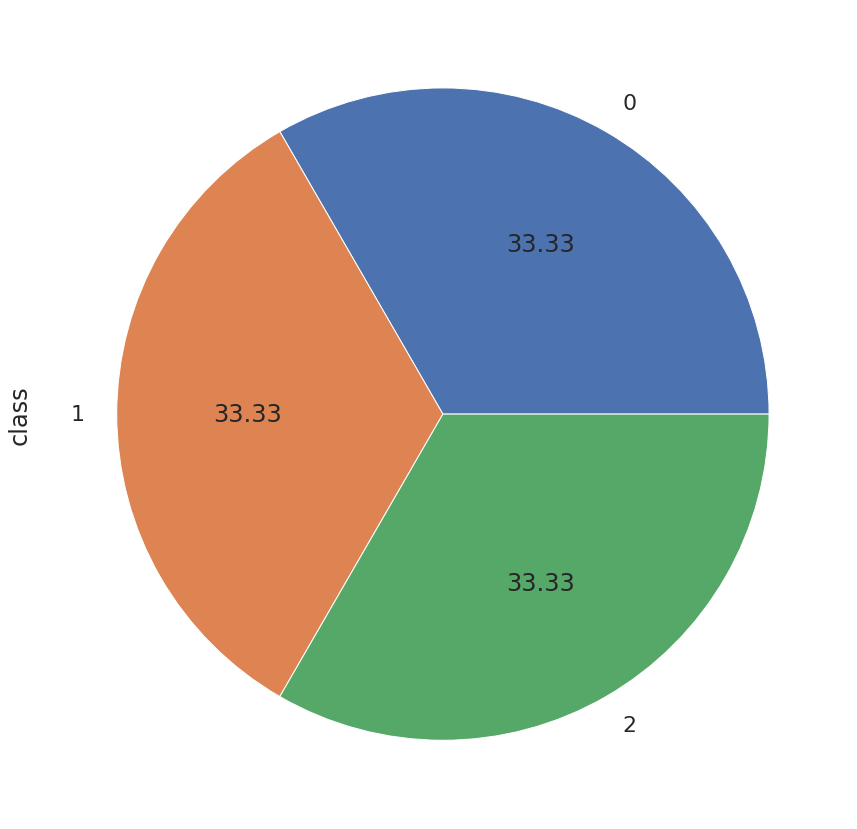

In [553]:
# 0: GALAXY
# 1: QSO
# 2: STAR

# showing that the training set is now balanced between classes with 33.33% each
plt.figure(figsize = (30,15))
sns.set(font_scale=2)
Y_train.value_counts().plot.pie(autopct='%.2f')

In [554]:
# 0: GALAXY
# 1: QSO
# 2: STAR

# showing the balanaced sum of obersvations for each class object for training set
# each class has 7995 observations after under sampling
Y_train.value_counts()

0    7995
1    7995
2    7995
Name: class, dtype: int64

In [555]:
# process of balancing testing set

X_test, Y_test = rus.fit_resample(X_test, Y_test)

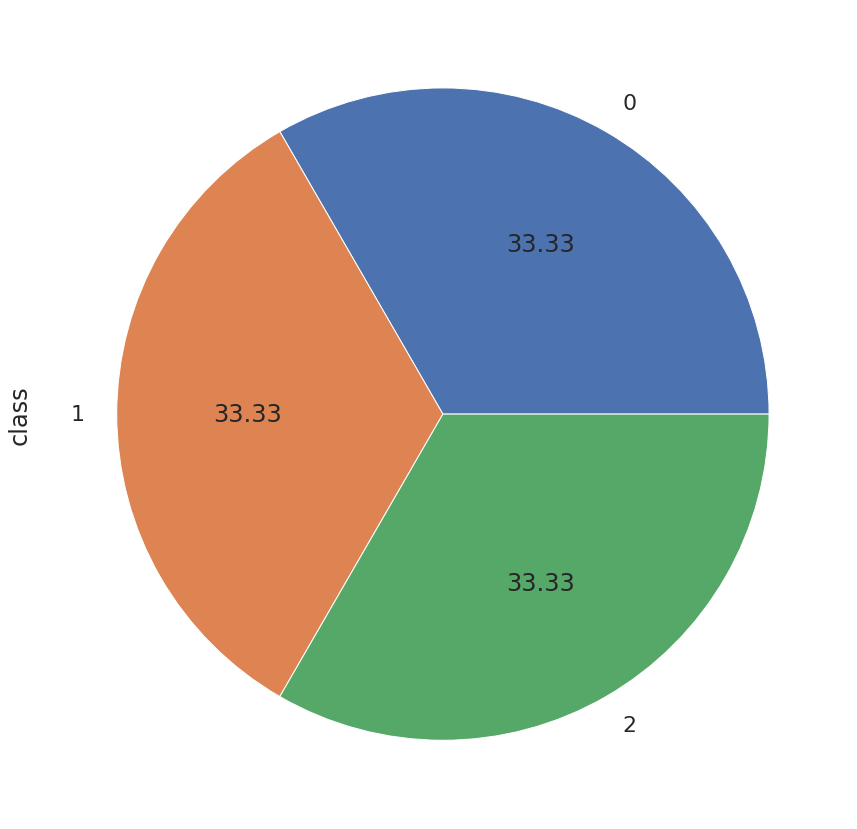

In [556]:
# 0: GALAXY
# 1: QSO
# 2: STAR

# showing that the testing set is now balanced between classes with 33.33% each
plt.figure(figsize = (30,15))
sns.set(font_scale=2)
Y_test.value_counts().plot.pie(autopct='%.2f')

In [557]:
# 0: GALAXY
# 1: QSO
# 2: STAR

# showing the balanaced sum of obersvations for each class object for testing set
# each class has 1977 observations after under sampling
Y_test.value_counts()

0    1977
1    1977
2    1977
Name: class, dtype: int64

# **4 - MODELING AND EVALUATION**
---

## 4.1 - Modeling and Evaluation (SEEN DATA)

>





In [558]:
# initilized the Logistic Regression model so the training and testing sets can be later fit
# paramater of "multi_class" was set to "ovr" as its the problem type is multi-classification 
LR = LogisticRegression(multi_class='ovr')

# model fit with be tested with the training set (SEEN)
LR.fit(X_train, Y_train)

print(f"X_train -\nShape: {X_train.shape}")
print(f"Y_train -\nShape: {Y_train.shape}")

X_train -
Shape: (23985, 9)
Y_train -
Shape: (23985,)


In [559]:
# returns predicted class for each observation as an array
Y_pred = LR.predict(X_train)

# shows array of predicted classes
print(Y_pred)
# length of predicted classes
print("\nY_pred length:", len(Y_pred))

# length of X_train and Y_train, to check and show they are the same length as the Y_pred array
# 23985 predictions were made
print("\nX_train length:", len(X_train))

[0 0 1 ... 2 2 2]

Y_pred length: 23985

X_train length: 23985


In [560]:
# used various evlaution metrics to view the preformance of my model
# used accuracy, recall, precision, F1 score
# tested with the training set (SEEN)

# accuracy 
print('- Accuracy : %.2f' % (accuracy_score(Y_train, Y_pred)))

# recall 
print('\n- Recall : %.2f' % (recall_score(Y_train, Y_pred, average='micro')))

# precision 
print('\n- Precision : %.2f' % (precision_score(Y_train, Y_pred, average='micro')))

# f1 score 
print('\n- F1 : %.2f' % (f1_score(Y_train, Y_pred, average='micro')))

- Accuracy : 0.90

- Recall : 0.90

- Precision : 0.90

- F1 : 0.90


In [561]:
# classification report further shows precision, recall, f1-score metric scores with moire detail such as macro and weighgted avaerge 
print(classification_report(Y_train, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      7995
           1       0.91      0.92      0.91      7995
           2       0.90      0.97      0.94      7995

    accuracy                           0.90     23985
   macro avg       0.90      0.90      0.90     23985
weighted avg       0.90      0.90      0.90     23985



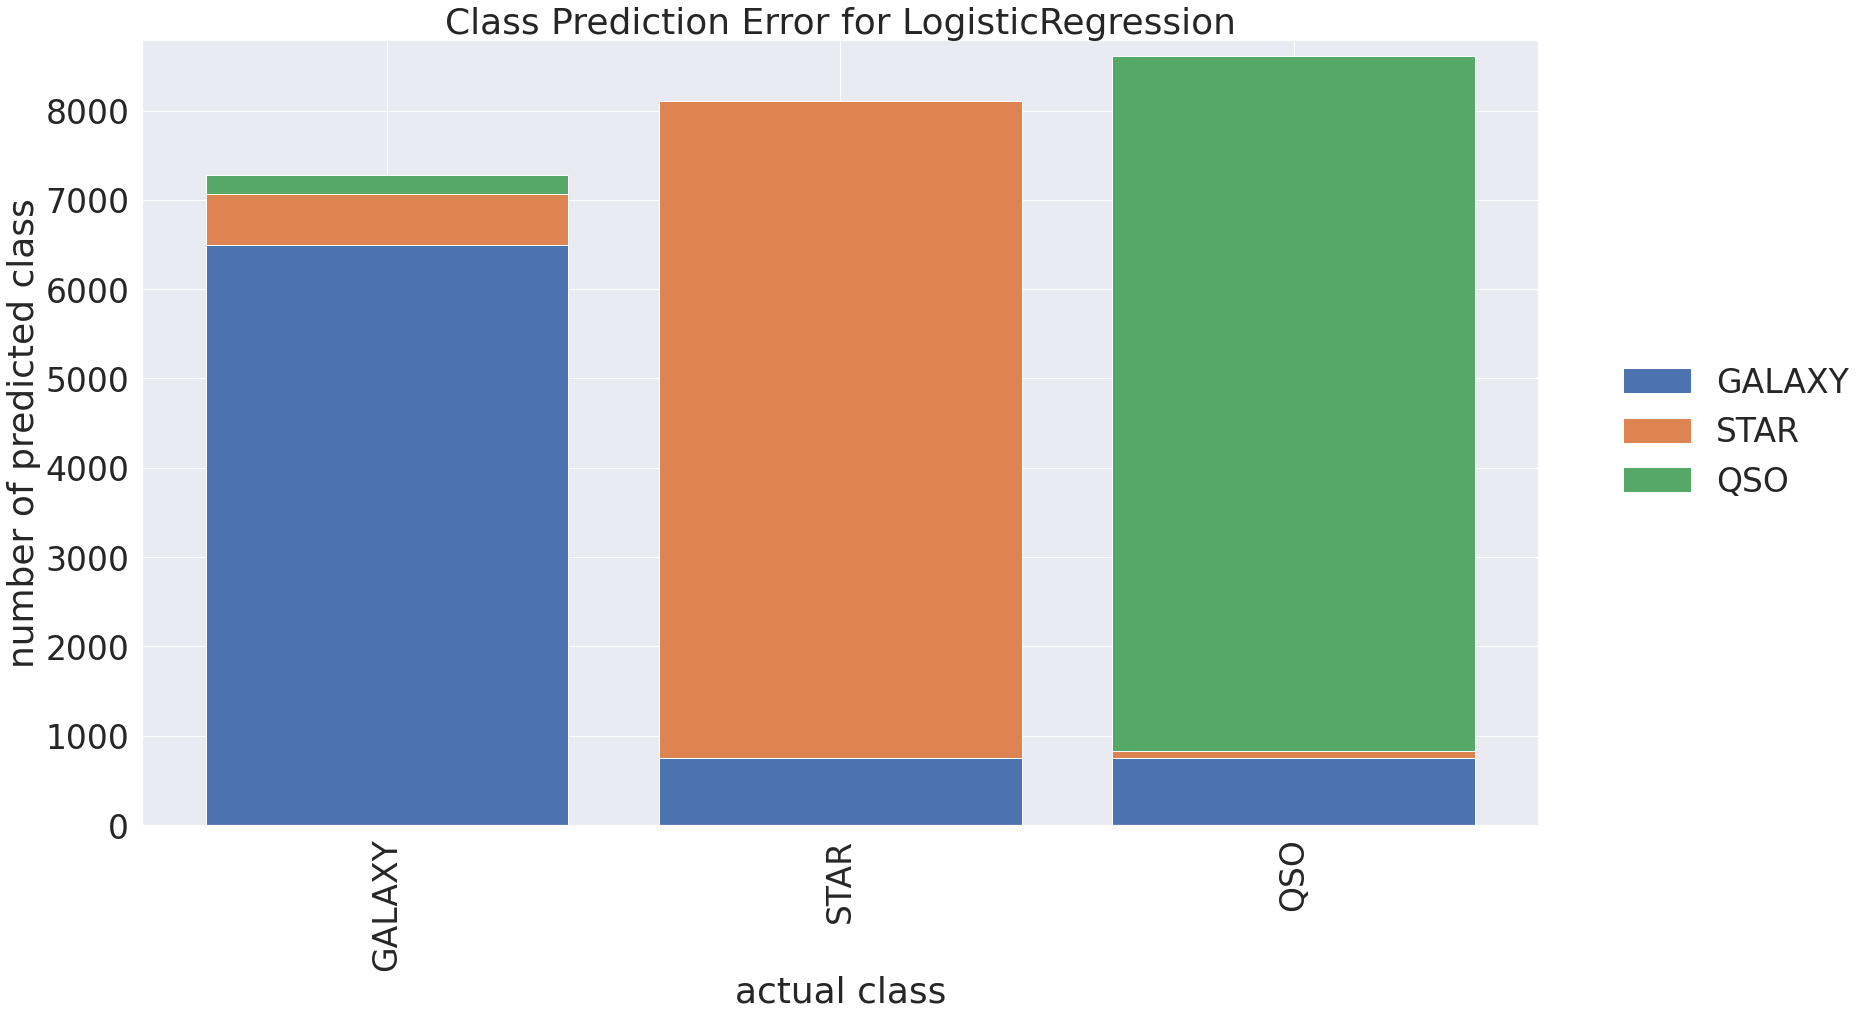

In [562]:
# for further model evalution the ClassPredictionError graph was used to see how many classes were correclty predicted within a bar chart
# can see that the QSO class was hardly predicted in the galaxy and star class, and star class was hardly predicted in the QSO class
# shows alot of correct predictions was made
CPE = ClassPredictionError(LR, classes=['GALAXY','STAR','QSO'])

plt.figure(figsize = (30,15))
sns.set(font_scale=3)
CPE.fit(X_train, Y_train)
CPE.score(X_train, Y_train)
CPE.show()  

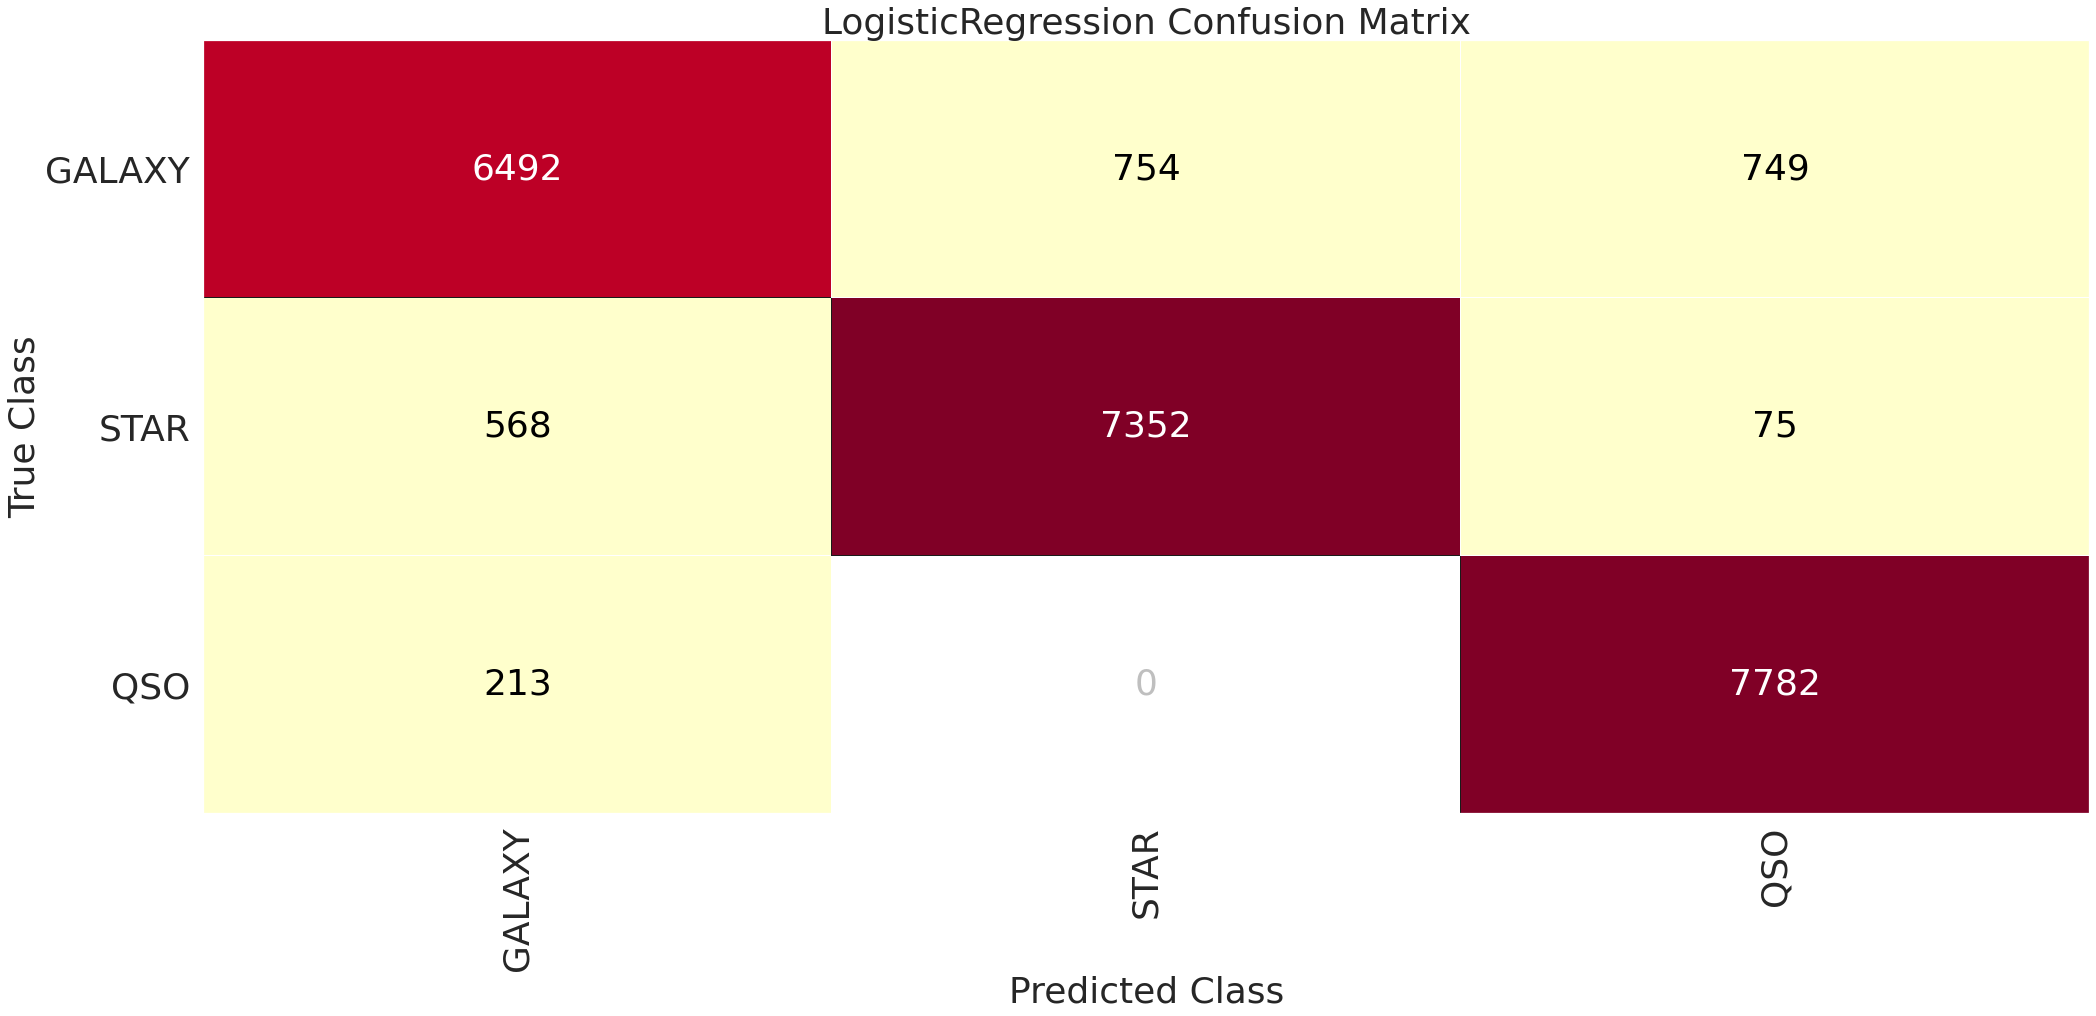

In [563]:
# for further model evalution the ConfusionMatrix graph was used to show the difference of total predictions for each class 
# shows alot of correct predictions was made in red
CM = ConfusionMatrix(LR, classes=['GALAXY','STAR','QSO'])

plt.figure(figsize = (30,15))
sns.set(font_scale=3)
CM.fit(X_train,Y_train)
CM.score(X_train, Y_train)
CM.show()

## 4.2 - Modeling and Evaulation (UNSEEN DATA)

>

In [564]:
# initilized the Logistic Regression model so the training and testing sets can be later fit
# a paramater of "multi_class" was set to "ovr" as its the problem type is for a multi-classification problem
LR = LogisticRegression(multi_class='ovr')

# model fit with be tested with the testing set (UNSEEN)
LR.fit(X_train, Y_train)

print(f"X_train -\nShape: {X_train.shape}")
print(f"Y_train -\nShape: {Y_train.shape}")

X_train -
Shape: (23985, 9)
Y_train -
Shape: (23985,)


In [565]:
# returns predicted class for each observation as an array
Y_pred = LR.predict(X_test)

# shows array of predicted classes
print(Y_pred)
# length of predicted classes
print("\nY_pred length:", len(Y_pred))

# length of X_test and Y_test, to check and show they are the same length as the Y_pred array
# 5931 predictions were made
print("\nX_train length:", len(X_test))

[0 0 0 ... 2 2 2]

Y_pred length: 5931

X_train length: 5931


In [566]:
# used various evlaution metrics to view the preformance of my model
# used accuracy, recall, precision, F1 score 
# tested with the test set (UNSEEN)
# metric results were all the same compared to the model that was trained with SEEN data

# accuracy 
print('\n- Accuracy : %.2f' % (accuracy_score(Y_test, Y_pred)))

# recall 
print('\n- Recall : %.2f' % (recall_score(Y_test, Y_pred, average='micro')))

# precision 
print('\n- Precision : %.2f' % (precision_score(Y_test, Y_pred, average='micro')))

# f1 score 
print('\n- F1 : %.2f' % (f1_score(Y_test, Y_pred, average='micro')))


- Accuracy : 0.90

- Recall : 0.90

- Precision : 0.90

- F1 : 0.90


In [567]:
# classification report further shows precision, recall, f1-score metric scores with moire detail such as macro and weighgted avaerge 
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1977
           1       0.90      0.90      0.90      1977
           2       0.91      0.98      0.94      1977

    accuracy                           0.90      5931
   macro avg       0.90      0.90      0.90      5931
weighted avg       0.90      0.90      0.90      5931



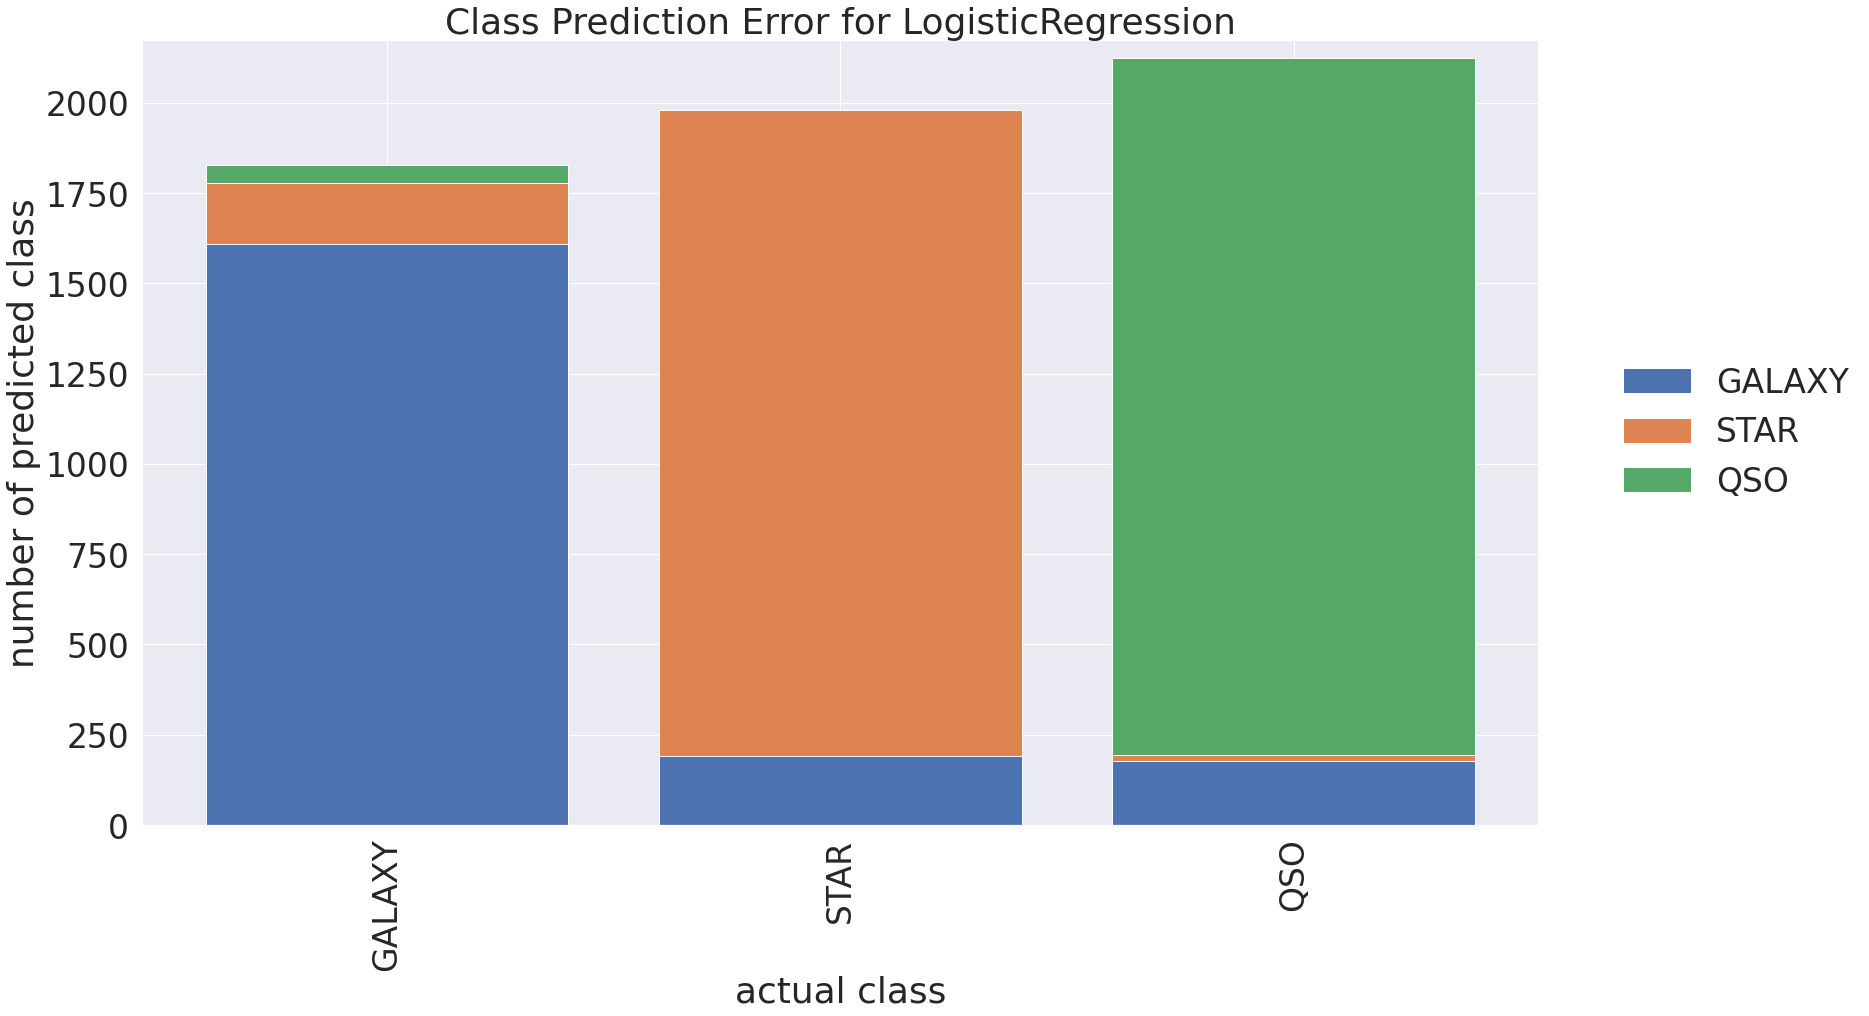

In [568]:
# for further model evalution the ClassPredictionError graph was used to see how many classes were correclty predicted within a bar chart
# can see that the QSO class was hardly predicted in the galaxy and star class, and star class was hardly predicted in the QSO class
# shows alot of correct predictions was made
# results every simmilar to the model that was trained with SEEN data

CPE = ClassPredictionError(LR, classes=['GALAXY','STAR','QSO'])

plt.figure(figsize = (30,15))
sns.set(font_scale=3)
CPE.fit(X_train, Y_train)
CPE.score(X_test, Y_test)
CPE.show()  

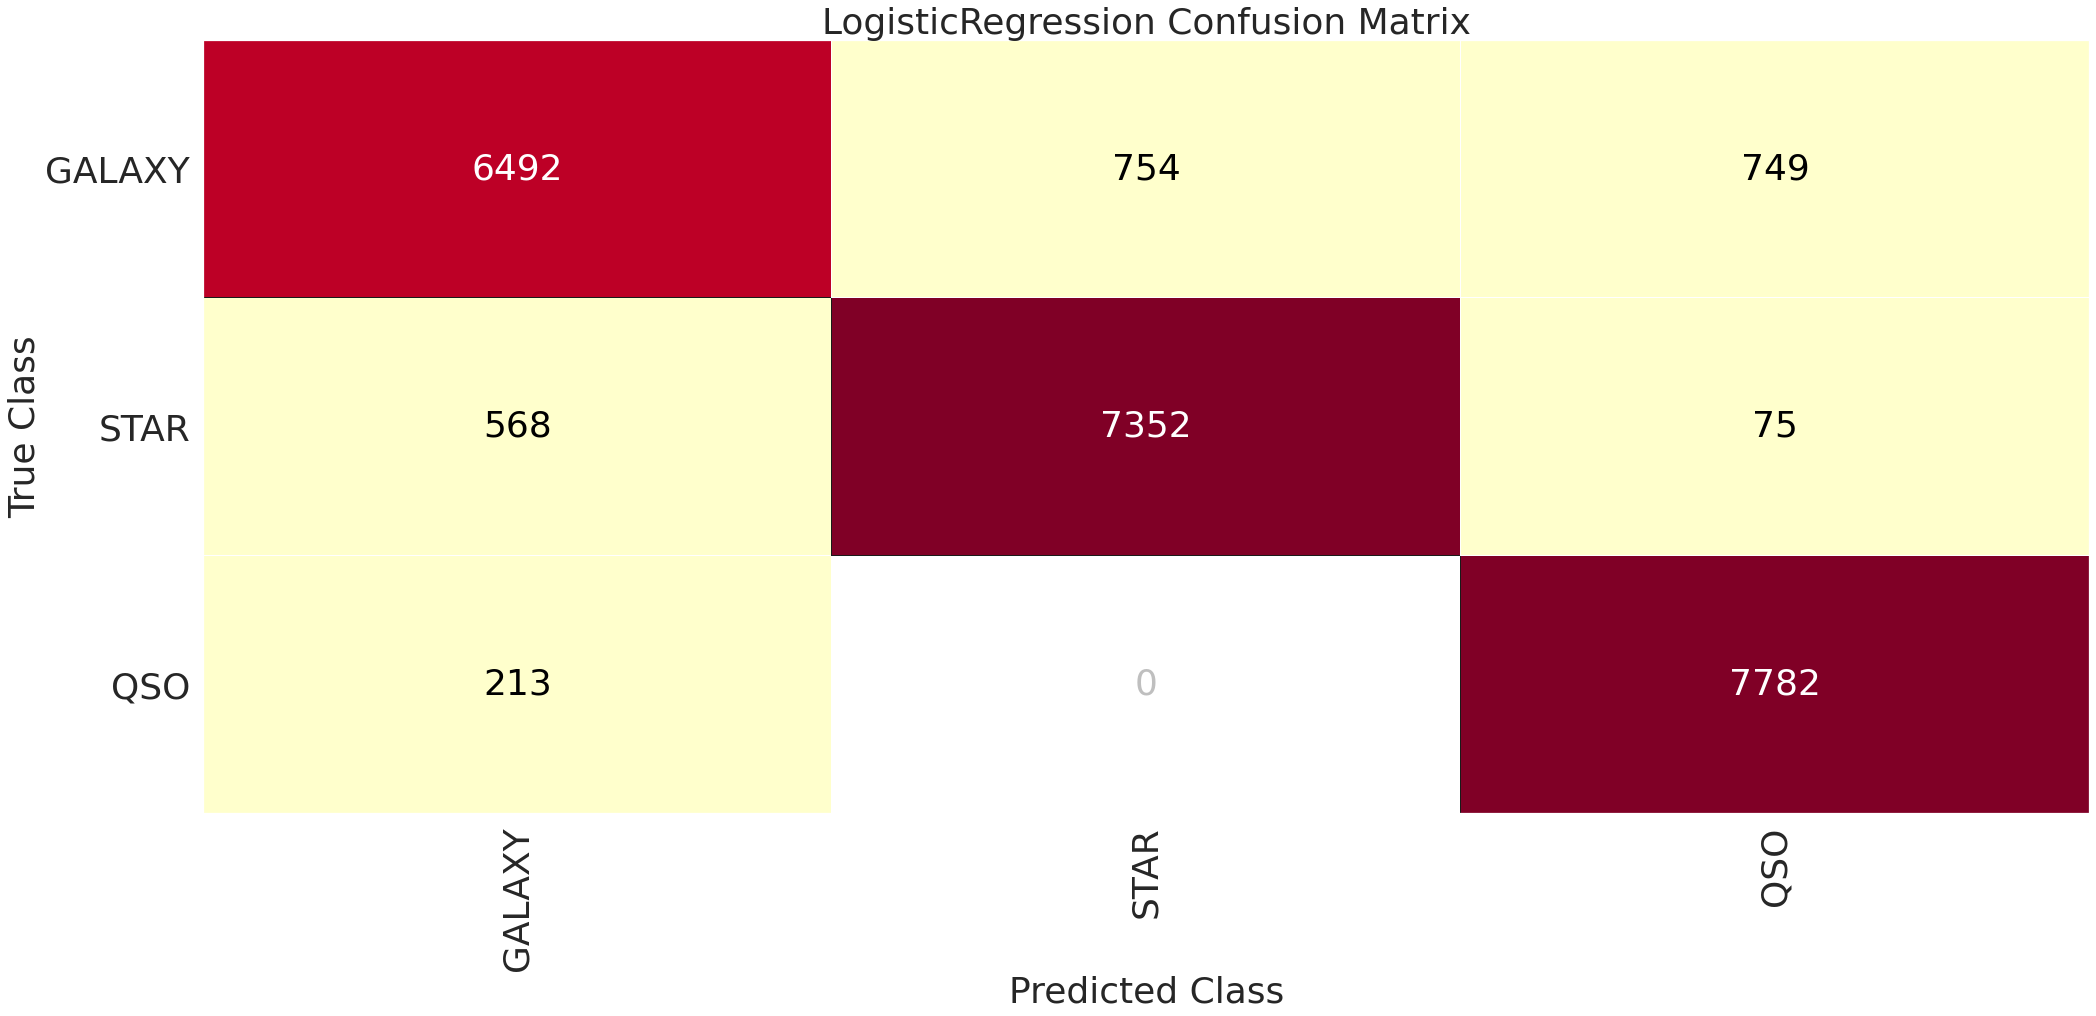

In [569]:
# for further model evalution the ConfusionMatrix graph was used to show the difference of total predictions for each class as a heatmap
# shows alot of correct predictions was made in red
CM = ConfusionMatrix(LR, classes=['GALAXY','STAR','QSO'])

plt.figure(figsize = (30,15))
sns.set(font_scale=3)
CM.fit(X_train,Y_train)
CM.score(X_train, Y_train)
CM.show()

# **5 - MODEL IMPROVEMENTS AND EVALUATION**
---

## 5.1 - Data Pre-processing and Cleaning

### 5.1.1 - Splitting New Dataset

In [570]:
# i split a fresh dataset for the pre-processing, cleaning and modeling of my algorithm.
# the new split is the exact same as the EDA split.

# the dataset was split first to avoid data leakage

# seperated the features from the dataset so i can preform a train/test split  
X = df.drop(['class'], axis=1) # FEATURES WITHOT LABEL
Y = df['class'] # LABEL WITHOUT FEATURES

# 80/20 split between training and testing split
# 42 random state
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [571]:
# merged the training and testing features to their coresponding class label for the data cleaning and pre-processin, so both will be effected
df_train = pd.merge(X_train, Y_train, left_index=True, right_index=True)

df_test = pd.merge(X_test, Y_test, left_index=True, right_index=True)

### 5.1.2 - Dropping Unwanted Features (Feature Selection)

In [572]:
# all the highly correlated features and features with reaccuring values found throughout the EDA univariate and multivariate analysis where dropped
# this was done for both the training and testing set as they both need the same features for modeling 

# a total of 8 features where dropped
df_train = df_train.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)
df_test = df_test.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)

In [573]:
# shows the new size of total observations and features within the testing and training set after correlated features where dropped 
print(f"df_train -\nShape: {df_train.shape}\n")

print(f"df_test -\nShape: {df_test.shape}\n")

df_train -
Shape: (80000, 10)

df_test -
Shape: (20000, 10)



### 5.1.3 - Detecting and Removing Outliers (Data Cleaning)

In [574]:
# IQR method used to detect remove outliers as it was discorved that many feartures had them throughout the EDA univariate analysis
# this was done for both the training and testing set as they both cannot have outliers

# this varibale is used for the later before_outlier_removal() function to show feature before removing outliers
dataset_before_removal = df_train.copy(deep=True)

def rem_outliers(dataset):

    # dataset before removal
    shape_before = dataset.shape

    for feature in df_train.select_dtypes(include = 'number').columns:
        # 0.25 and 0.75 quantile used to later calculate lower and upper bound
        # 0.25 and 0.75 used for IQR method
        QT1 = dataset[feature].quantile(0.25)
        QT3 = dataset[feature].quantile(0.75)
  
        IQR =  abs(QT3 - QT1)
        
        # to calcuate upper and lower bound
        lower = QT1 - (1.5 * IQR)
        upper = QT3 + (1.5 * IQR)
        
        # anything over the upper and lower bound will be detected as an outlier
        min_in = dataset[dataset[feature] < lower].index
        max_in = dataset[dataset[feature] > upper].index
        
        # detected outliers outside lower and higher bound are dropped from the dataset
        dataset.drop(min_in, inplace = True)
        dataset.drop(max_in, inplace = True)
    
    # dataset after removal
    shape_after = dataset.shape

    # caluclated different before and after outlier removal to get the sum of outliers removed
    outlier_count = abs(shape_before[0] - shape_after[0])
    
    return outlier_count

In [575]:
# shows numbers of outliers removed within the training set 
print("Number of outliers deleted in training set: ", rem_outliers(df_train))

# shows numbers of outliers removed within the training set 
print("Number of outliers deleted in testing set: ", rem_outliers(df_test))

Number of outliers deleted in training set:  7487
Number of outliers deleted in testing set:  1922


### 5.1.4 - Checking for Missing Values (Data Cleaning)

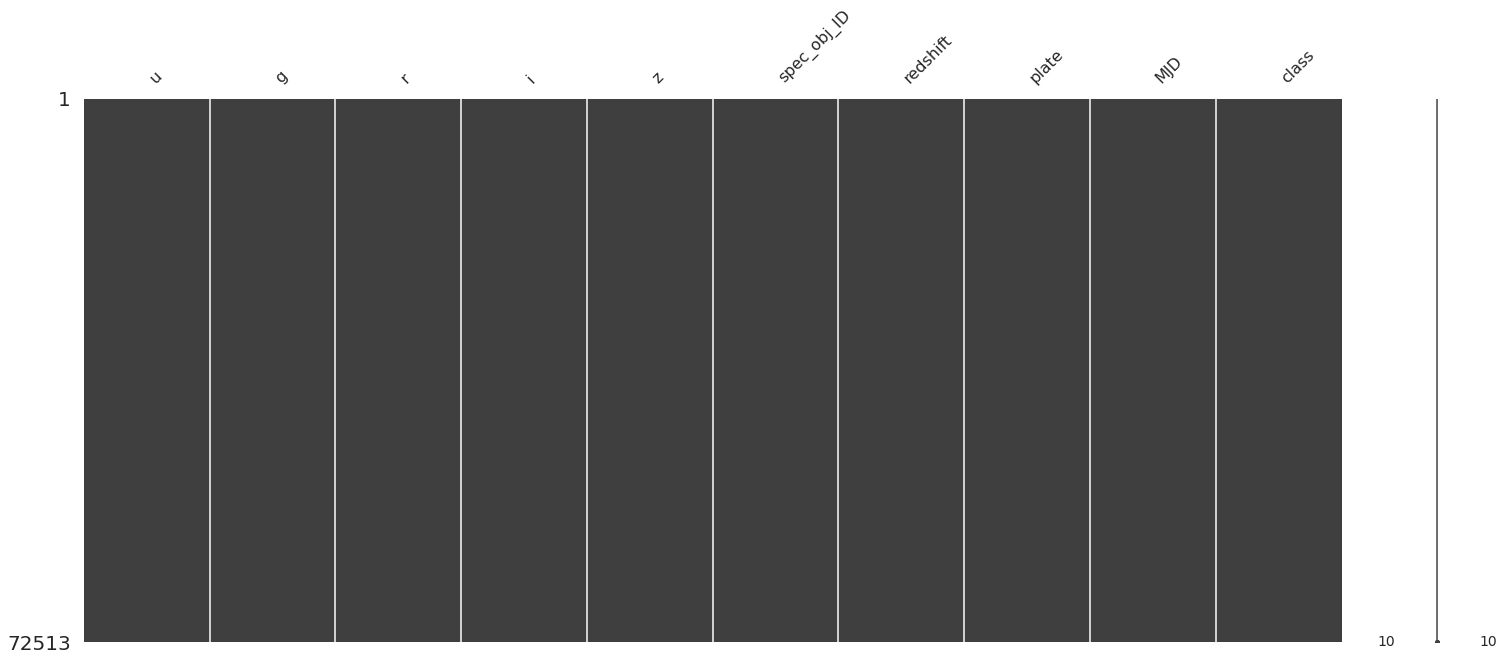

In [576]:
# this graph represents any patterns witin our dataset in terms of missing NULL values on the training set.
# there is a consistant pattern with any gaps, meaning there are no missing NULL values in the training set.

msno.matrix(df_train)

In [577]:
# no missing values where found after the IQR method on the training set as it removes the whole observation containing and outlier 

# view the number of missing values for each feature within the training set

df_train.isnull().sum()

u              0
g              0
r              0
i              0
z              0
spec_obj_ID    0
redshift       0
plate          0
MJD            0
class          0
dtype: int64

In [578]:
# shows all features are int/float datatype 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72513 entries, 75220 to 15795
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   u            72513 non-null  float64
 1   g            72513 non-null  float64
 2   r            72513 non-null  float64
 3   i            72513 non-null  float64
 4   z            72513 non-null  float64
 5   spec_obj_ID  72513 non-null  float64
 6   redshift     72513 non-null  float64
 7   plate        72513 non-null  int64  
 8   MJD          72513 non-null  int64  
 9   class        72513 non-null  object 
dtypes: float64(7), int64(2), object(1)
memory usage: 8.1+ MB


In [579]:
# counts the amount of values that are 0 in the dataset, these must also be
(df_train == 0).sum().sum()

323

In [580]:
## this removes all observations that have 0 in it
df_train = df_train[(df_train != 0).all(1)]

# can see now there are no values that are 0
(df_train == 0).sum().sum()

0

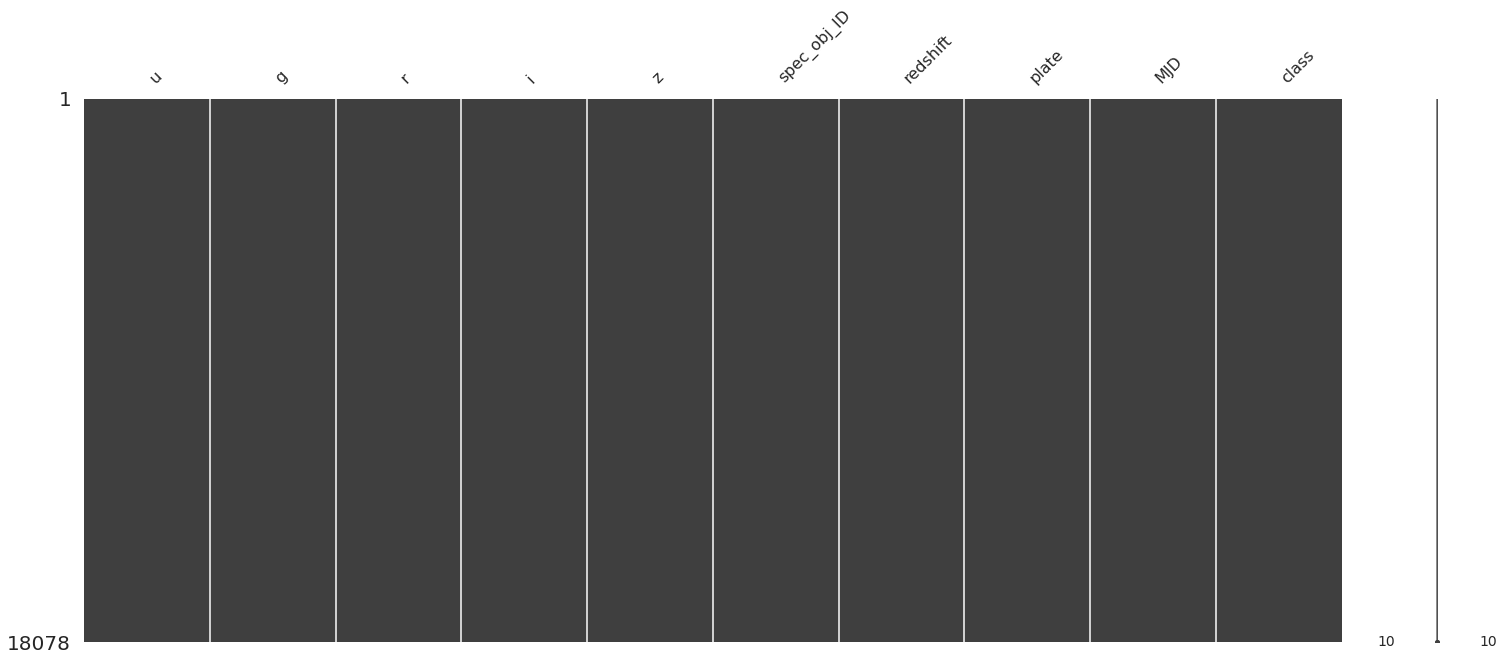

In [581]:
msno.matrix(df_test)

In [582]:
# shows all features are int/float datatype 
df_test.isnull().sum()

u              0
g              0
r              0
i              0
z              0
spec_obj_ID    0
redshift       0
plate          0
MJD            0
class          0
dtype: int64

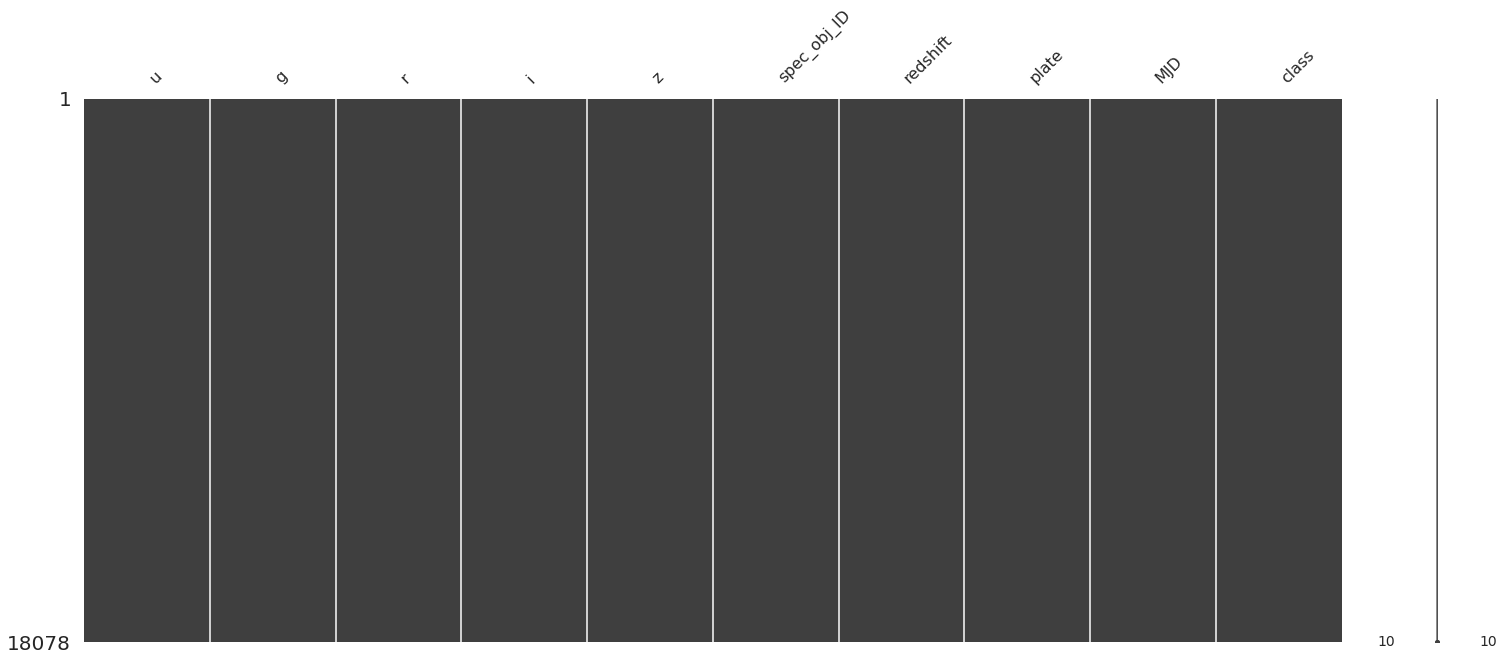

In [583]:
# this graph represents any patterns witin our dataset in terms of missing NULL values on the testing set.
# there is a consistant pattern with any gaps, meaning there are no missing NULL values in the testing set.

msno.matrix(df_test)

In [584]:
# no missing values where found after the IQR method on the testing set as it removes the whole observation containing and outlier 

# view the number of missing values for each feature within the testing set
df_test.isnull().sum()

u              0
g              0
r              0
i              0
z              0
spec_obj_ID    0
redshift       0
plate          0
MJD            0
class          0
dtype: int64

In [585]:
# shows all features are int/float datatype 
# wont have any blank spaces as all datatypes are numbers
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18078 entries, 75721 to 42410
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   u            18078 non-null  float64
 1   g            18078 non-null  float64
 2   r            18078 non-null  float64
 3   i            18078 non-null  float64
 4   z            18078 non-null  float64
 5   spec_obj_ID  18078 non-null  float64
 6   redshift     18078 non-null  float64
 7   plate        18078 non-null  int64  
 8   MJD          18078 non-null  int64  
 9   class        18078 non-null  object 
dtypes: float64(7), int64(2), object(1)
memory usage: 2.0+ MB


In [586]:
# counts the amount of values that are 0 in the dataset, these must also be removed
(df_test == 0).sum().sum()

86

In [587]:
# this removes all observations that have 0 in it
df_test = df_test[(df_test != 0).all(1)]

# can see now there are no values that are 0
(df_test == 0).sum().sum()

0

### 5.1.5 - Encoding Target Class (Data Encoding)

In [588]:
# estabish lebel encoder
encoder = LabelEncoder()

# encode the class column on the training set and replace the old class colum

df_train['class'] = encoder.fit_transform(df_train['class'])

In [589]:
# encode the class column on the testing set and replace the old class colum

df_test['class'] = encoder.fit_transform(df_test['class'])

<ipython-input-589-b018c88a5ae4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['class'] = encoder.fit_transform(df_test['class'])


In [590]:
# can see now the target class is encodes

df_train['class']

75220    0
48955    0
44966    0
13568    0
92727    2
        ..
37194    0
82386    1
54886    0
76820    2
15795    0
Name: class, Length: 72190, dtype: int64

In [591]:
# it is not 0,2,1
# initally it was GALAXY, QSO, STAR

df_train['class'].unique()

array([0, 2, 1])

### 5.1.6 - Standardization (Data Scaling) IMPROVEMENT MADE*

In [592]:
# seperete target class and features from the training and testing set to preform standardized just onto the features

# training set
X_train = df_train.drop(["class"], axis = 1)
Y_train = df_train["class"]

# testing set
X_test = df_test.drop(["class"], axis = 1)
Y_test = df_test["class"]

In [593]:
# decided to normalize the data using StandardScaler to remove unwanted noise from dataset like duplicated observations and redundancies.
# this was done for both the testing and training set as both need to be standardized for them to be fit into the model

# initiize scaler variable for MinMaxScaler function
scaler = StandardScaler()
# fit with training to estimate the minimum and maximum observable values for when training and testing set are transformed
scaler.fit(X_train)

# standardizing testing set
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train)

# standardizing testing set
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)

In [594]:
X_train

0         1         2         3         4         5         6  \
0      0.086330  0.380183  0.520683  0.397630  0.428555 -0.137916  0.679333   
1      1.625939  1.737647  1.044742  0.839184  0.452158  0.941204  1.075891   
2      0.219278  0.388127 -0.000032 -0.039177 -0.126735  0.118879  0.020955   
3     -0.812882 -0.997783 -1.059712 -1.035041 -1.029969 -1.024832 -0.740059   
4     -0.037257  0.410883  0.960703  1.350461  1.495107 -0.378296 -1.023096   
...         ...       ...       ...       ...       ...       ...       ...   
72185 -0.610898 -0.920298 -1.043286 -1.050276 -1.103614 -1.214898 -0.687818   
72186 -0.088936 -0.190571  0.182848  1.380487  1.092283  0.006682  1.390707   
72187 -1.391383 -1.751227 -1.880209 -1.923110 -1.937175 -1.344839 -0.811443   
72188  0.798678  0.368163  0.110152 -0.264417 -0.493953 -0.579973 -1.019768   
72189  1.223453  0.228827 -0.141004 -0.164883 -0.149010 -0.338867 -0.112343   

              7         8  
0     -0.137883  0.047239  
1      0.941183  1.461552  
2      0.118875  0.284244  
3     -1.024806 -1.172509  
4     -0.378318 -0.119216  
...         ...       ...  
72185 -1.214909 -1.465734  
72186  0.006650  0.144246  
72187 -1.344819 -1.530773  
72188 -0.579984 -0.330866  
72189 -0.338869 -0.089452  

[72190 rows x 9 columns]

### 5.1.7 - Dimensionality Reduction (Data Transformation) IMPROVEMENT MADE*

In [595]:
# this was done after standardscaler as the dataset first needs to be scaled for PCA to work
# this was done for both the testing and training set as both need to have the same number of features for them to be fit into the model

# initiize pca variable for PCA function
pca = PCA(0.95)
# fit with training to estimate the minimum and maximum observable values for when training and testing set are transformed
pca.fit(X_train)

# PCA on training set
X_train = pca.transform(X_train)
X_train = pd.DataFrame(X_train)

# PCA on testing set
X_test = pca.transform(X_test)
X_test = pd.DataFrame(X_test)

In [596]:
X_train

0         1         2         3
0     -0.744826 -0.495966  0.647755  0.019679
1     -3.318700 -0.247334 -0.364673 -1.127040
2     -0.319772  0.032330 -0.240733 -0.301104
3      2.982727 -0.138551  0.061731  0.009985
4     -0.947456 -1.338543 -0.294796  1.917634
...         ...       ...       ...       ...
72185  3.137047 -0.527228  0.115136 -0.150036
72186 -1.276240 -0.226674  1.547441  0.514777
72187  4.708681  0.449417  0.217116 -0.408324
72188  0.640601 -1.092177 -1.088057 -0.278817
72189  0.027558 -0.858158 -0.543630 -0.780652

[72190 rows x 4 columns]

### 5.1.8 - Balancing Dataset (Data Transformation) IMPROVEMENTS MADE*

In [597]:
# ROS variable to inintalize RandomOverSampler function
ROS = RandomOverSampler()

# process of balancing training set
X_train, Y_train = ROS.fit_resample(X_train, Y_train)

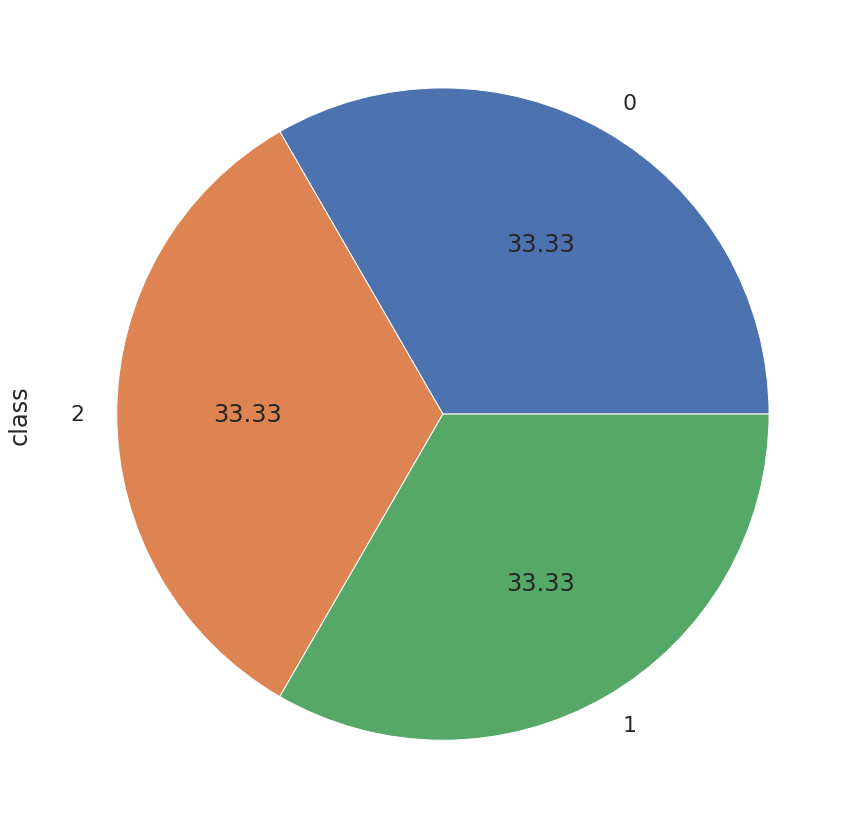

In [598]:
# 0: GALAXY
# 1: QSO
# 2: STAR

# showing that the training set is now balanced between classes with 33.33% each
plt.figure(figsize = (30,15))
sns.set(font_scale=2)
Y_train.value_counts().plot.pie(autopct='%.2f')

In [599]:
# 0: GALAXY
# 1: QSO
# 2: STAR

# showing the balanaced sum of obersvations for each class object for training set
# each class has 47332 observations after over sampling

Y_train.value_counts()

0    47009
2    47009
1    47009
Name: class, dtype: int64

In [600]:
# process of balancing training set with same ROS variable
X_test, Y_test = ROS.fit_resample(X_test, Y_test)

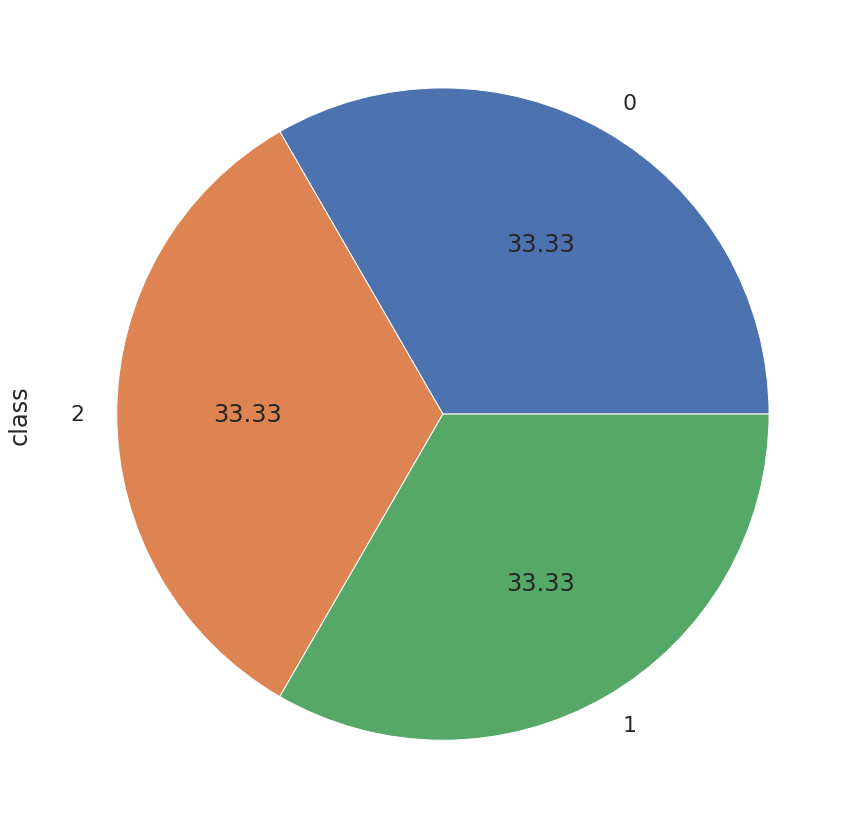

In [601]:
# 0: GALAXY
# 1: QSO
# 2: STAR

# showing that the testing set is now balanced between classes with 33.33% each
plt.figure(figsize = (30,15))
sns.set(font_scale=2)
Y_train.value_counts().plot.pie(autopct='%.2f')

In [602]:
# 0: GALAXY
# 1: QSO
# 2: STAR

# showing the balanaced sum of obersvations for each class object for testing set
# each class has 11785 observations after over sampling

Y_test.value_counts()

0    11699
2    11699
1    11699
Name: class, dtype: int64

## 5.2 - Algorhtim Modeling and Evaluation

### 5.2.1 Modeling and Evaluation (SEEN DATA)

>





In [603]:
# initilized the Logistic Regression model so the training and testing sets can be later fit
# paramater of "multi_class" was set to "ovr" as its the problem type is multi-classification 
LR = LogisticRegression(multi_class='ovr')

# model fit with be tested with the testing set (SEEN)
LR.fit(X_train, Y_train)

LogisticRegression(multi_class='ovr')

In [604]:
# returns predicted class for each observation as an array
Y_pred = LR.predict(X_train)

# shows array of predicted classes
print(Y_pred)
# length of predicted classes
print("\nY_pred length:", len(Y_pred))

# length of X_train and Y_train, to check and show they are the same length as the Y_pred array
# 23985 predictions were made
print("\nX_train length:", len(X_train))

[1 0 0 ... 2 2 2]

Y_pred length: 141027

X_train length: 141027


In [605]:
# shows the overall accuracy, recall, precision and F1 score of my model
# tested with the training set (SEEN)

# accuracy 
print('Accuracy : %.2f' % (accuracy_score(Y_train, Y_pred)))

# recall 
print('\n Recall : %.2f' % (recall_score(Y_train, Y_pred, average='micro')))

# precision 
print('\n Precision : %.2f' % (precision_score(Y_train, Y_pred, average='micro')))

# f1 score 
print('\n F1 : %.2f' % (f1_score(Y_train, Y_pred, average='micro')))

# cross-validation

Accuracy : 0.93

 Recall : 0.93

 Precision : 0.93

 F1 : 0.93


In [606]:
# 0: GALAXY
# 1: QSO
# 2: STAR
print(classification_report(Y_train, Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89     47009
           1       0.89      0.92      0.91     47009
           2       0.98      1.00      0.99     47009

    accuracy                           0.93    141027
   macro avg       0.93      0.93      0.93    141027
weighted avg       0.93      0.93      0.93    141027



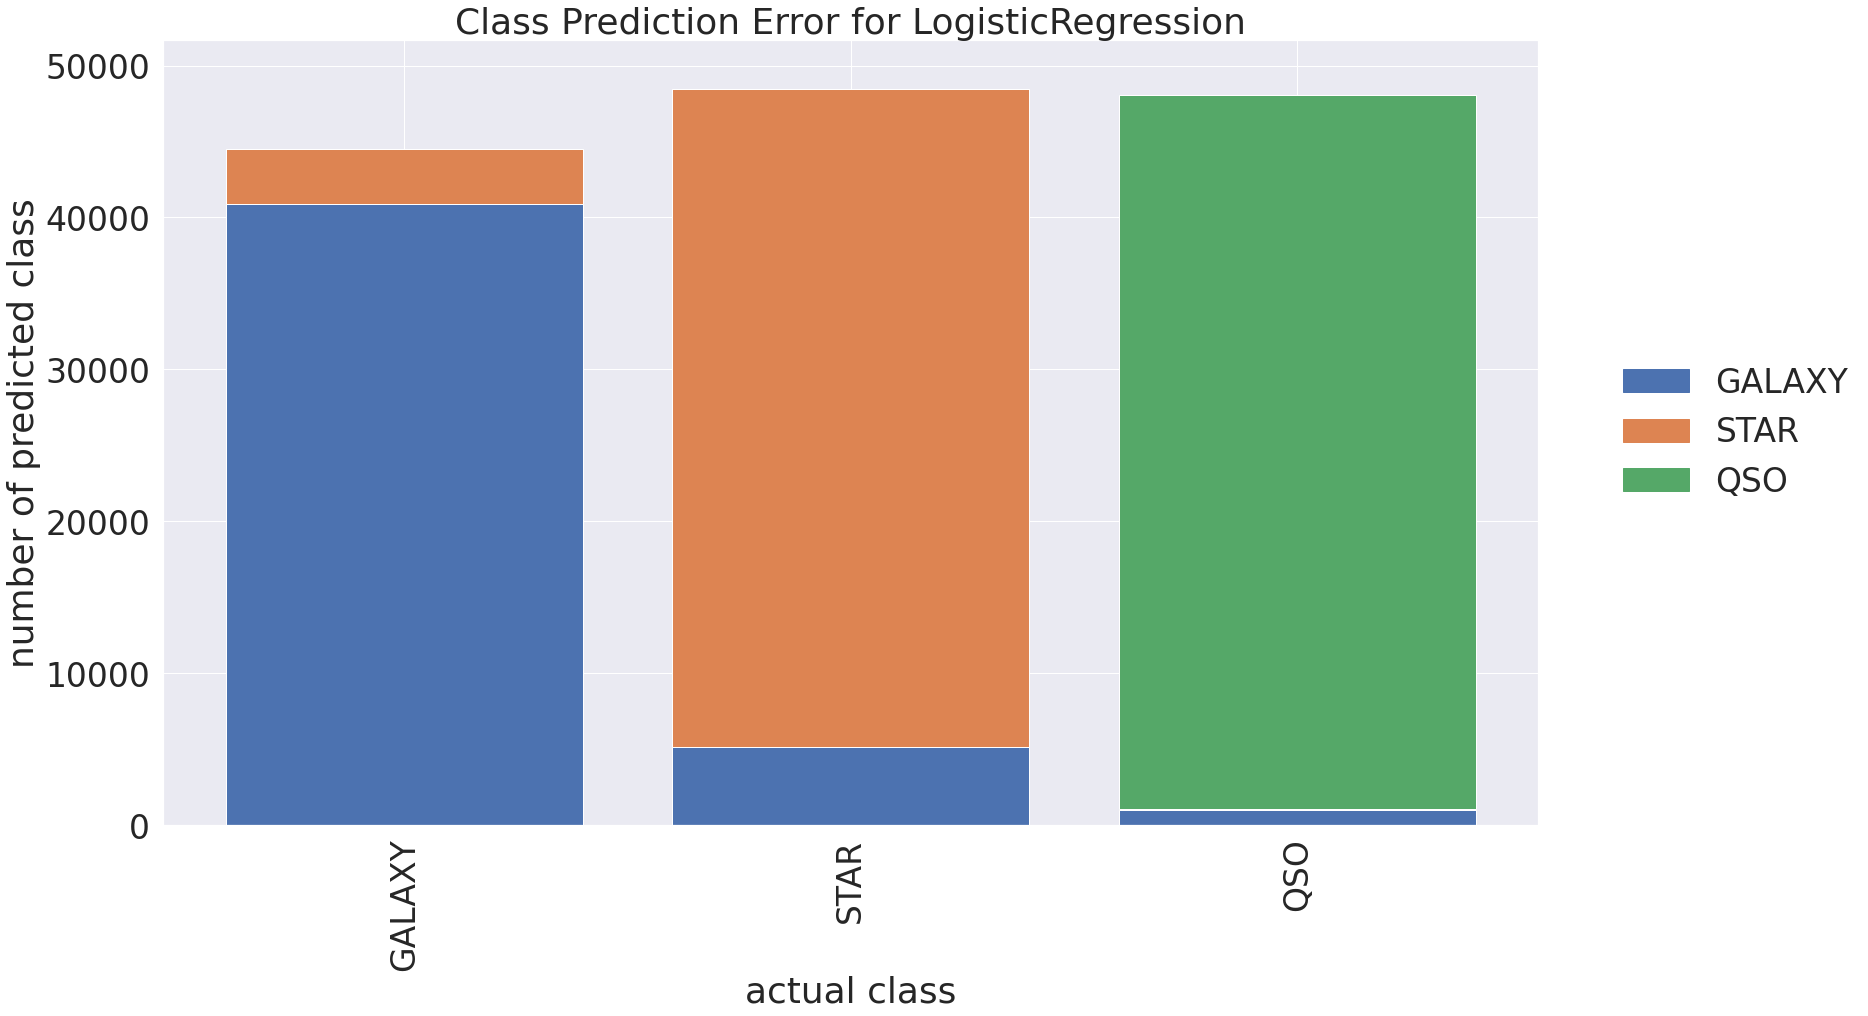

In [607]:
# 0: Galaxy
# 1: Star
# 2: Quasar (QSO)
CPE = ClassPredictionError(LR, classes=['GALAXY','STAR','QSO'])

plt.figure(figsize = (30,15))
sns.set(font_scale=3)
CPE.fit(X_train, Y_train)
CPE.score(X_train, Y_train)
CPE.show()  

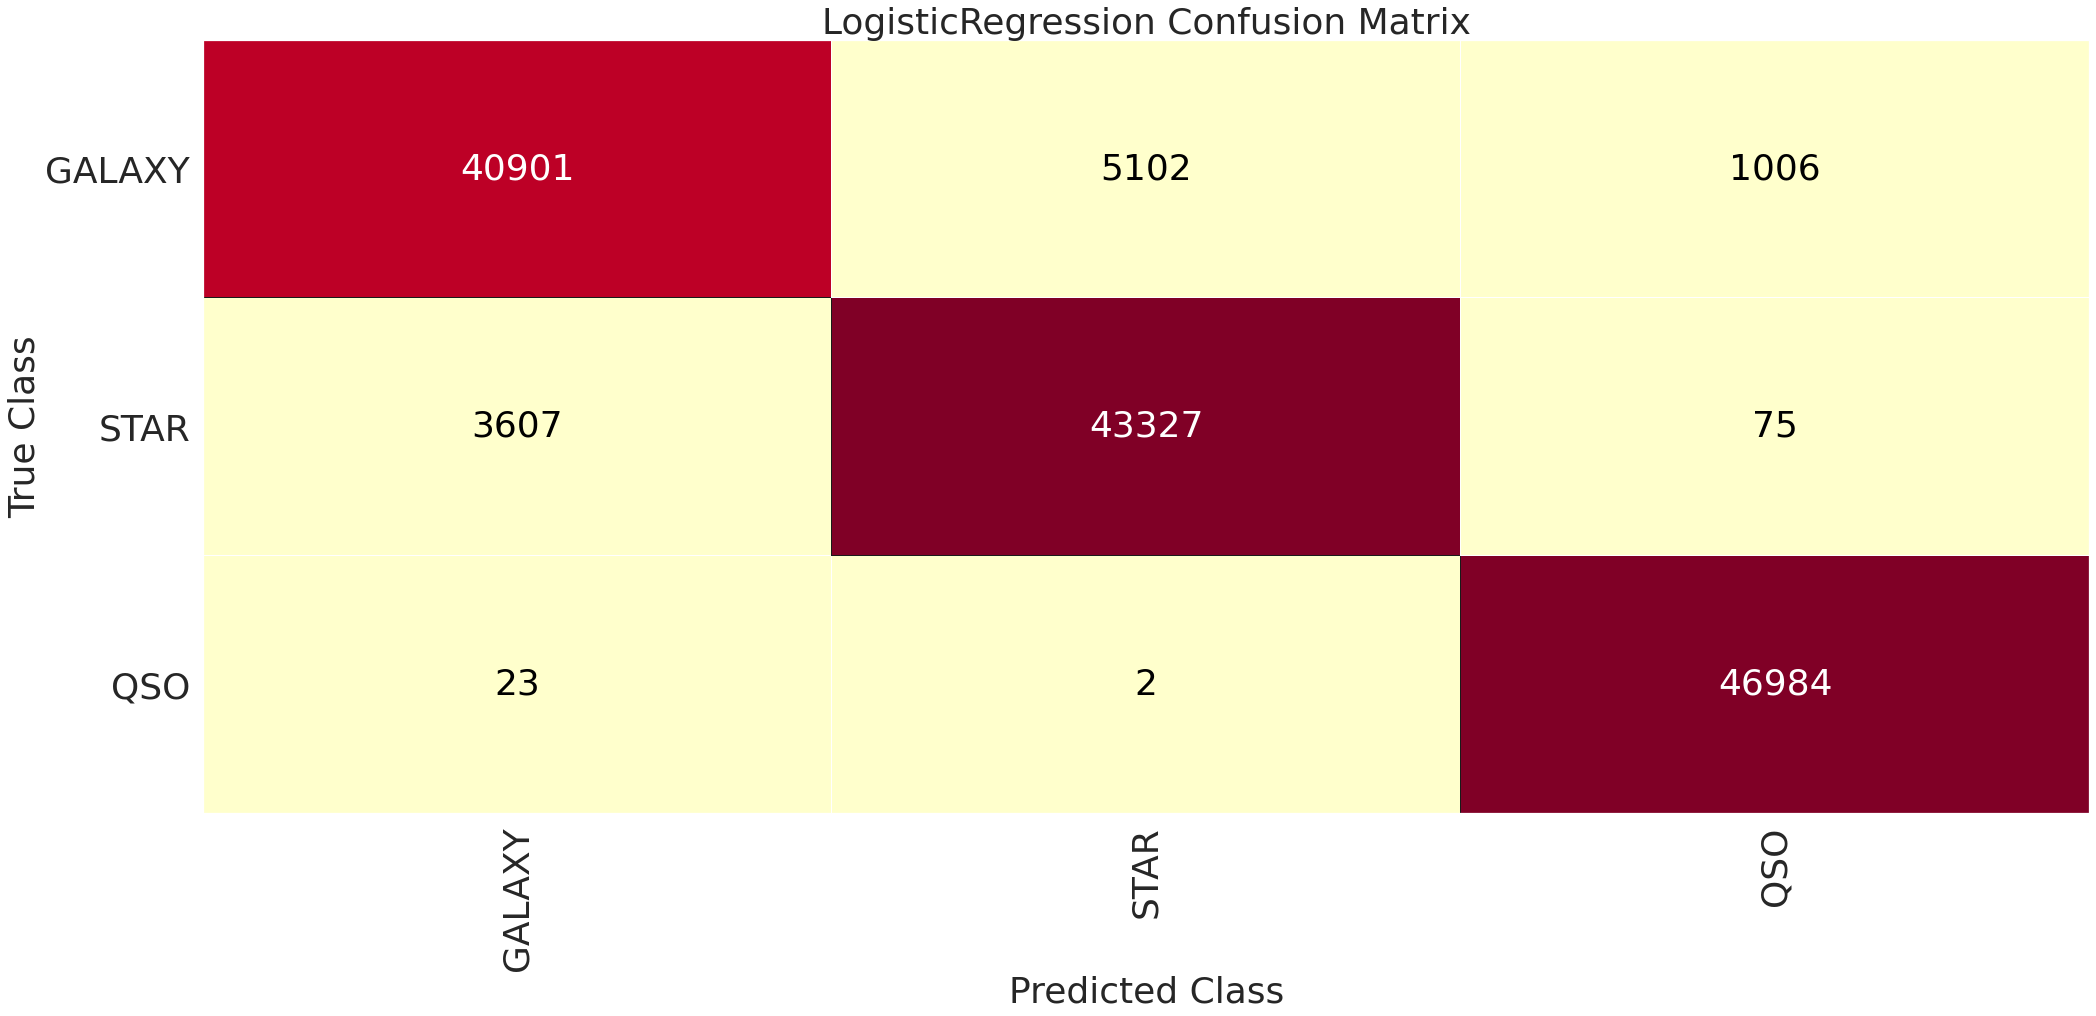

In [608]:
# 0: Galaxy
# 1: Star
# 2: Quasar (QSO)
CM = ConfusionMatrix(LR, classes=['GALAXY','STAR','QSO'])

plt.figure(figsize = (30,15))
sns.set(font_scale=3)
CM.fit(X_train,Y_train)
CM.score(X_train, Y_train)
CM.show()

### 5.2.2 Modeling and Evaulation (UNSEEN DATA)

>

In [609]:
# initilized the Logistic Regression model so the training and testing sets can be later fit
# paramater of "multi_class" was set to "ovr" as its the problem type is multi-classification 
LR = LogisticRegression(multi_class='ovr')

# model fit with be tested with the testing set (UNSEEN)
LR.fit(X_train, Y_train)

LogisticRegression(multi_class='ovr')

In [610]:
# returns predicted class for each observation as an array
Y_pred = LR.predict(X_test)

# shows array of predicted classes
print(Y_pred)
# length of predicted classes
print("\nY_pred length:", len(Y_pred))

# length of X_test and Y_test, to check and show they are the same length as the Y_pred array
# 5931 predictions were made
print("\nX_train length:", len(X_test))


[0 2 2 ... 2 2 2]

Y_pred length: 35097

X_train length: 35097


In [611]:
# shows the overall accuracy, recall, precision and F1 score of my model
# tested with the test set (UNSEEN)

# accuracy 
print('\n Accuracy : %.2f' % (accuracy_score(Y_test, Y_pred)))

# recall 
print('\n Recall : %.2f' % (recall_score(Y_test, Y_pred, average='micro')))

# precision 
print('\n Precision : %.2f' % (precision_score(Y_test, Y_pred, average='micro')))

# f1 score 
print('\n F1 : %.2f' % (f1_score(Y_test, Y_pred, average='micro')))

# cross-validation



 Accuracy : 0.92

 Recall : 0.92

 Precision : 0.92

 F1 : 0.92


In [612]:
# 0: Galaxy
# 1: Star
# 2: Quasar (QSO)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89     11699
           1       0.89      0.91      0.90     11699
           2       0.98      1.00      0.99     11699

    accuracy                           0.92     35097
   macro avg       0.92      0.92      0.92     35097
weighted avg       0.92      0.92      0.92     35097



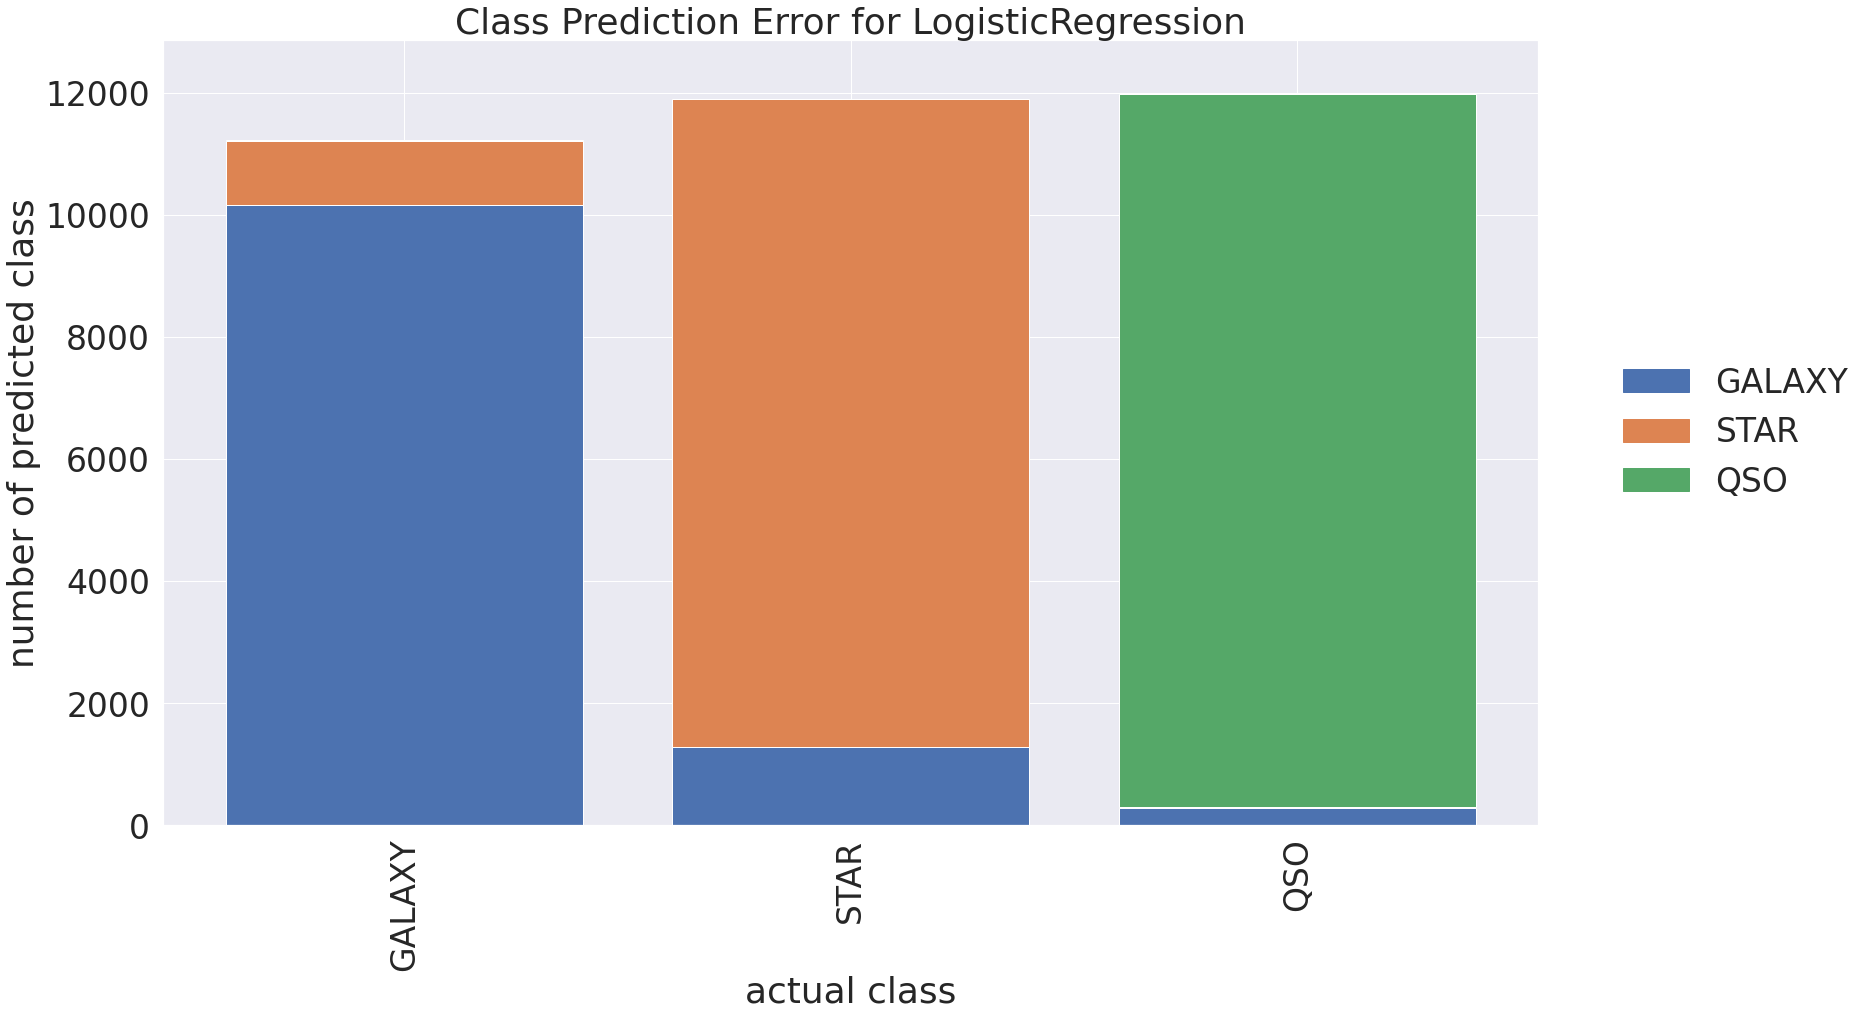

In [613]:
# 0: Galaxy
# 1: Star
# 2: Quasar (QSO)
CPE = ClassPredictionError(LR, classes=['GALAXY','STAR','QSO'])

plt.figure(figsize = (30,15))
sns.set(font_scale=3)
CPE.fit(X_train, Y_train)
CPE.score(X_test, Y_test)
CPE.show()  

0.9249223580362994

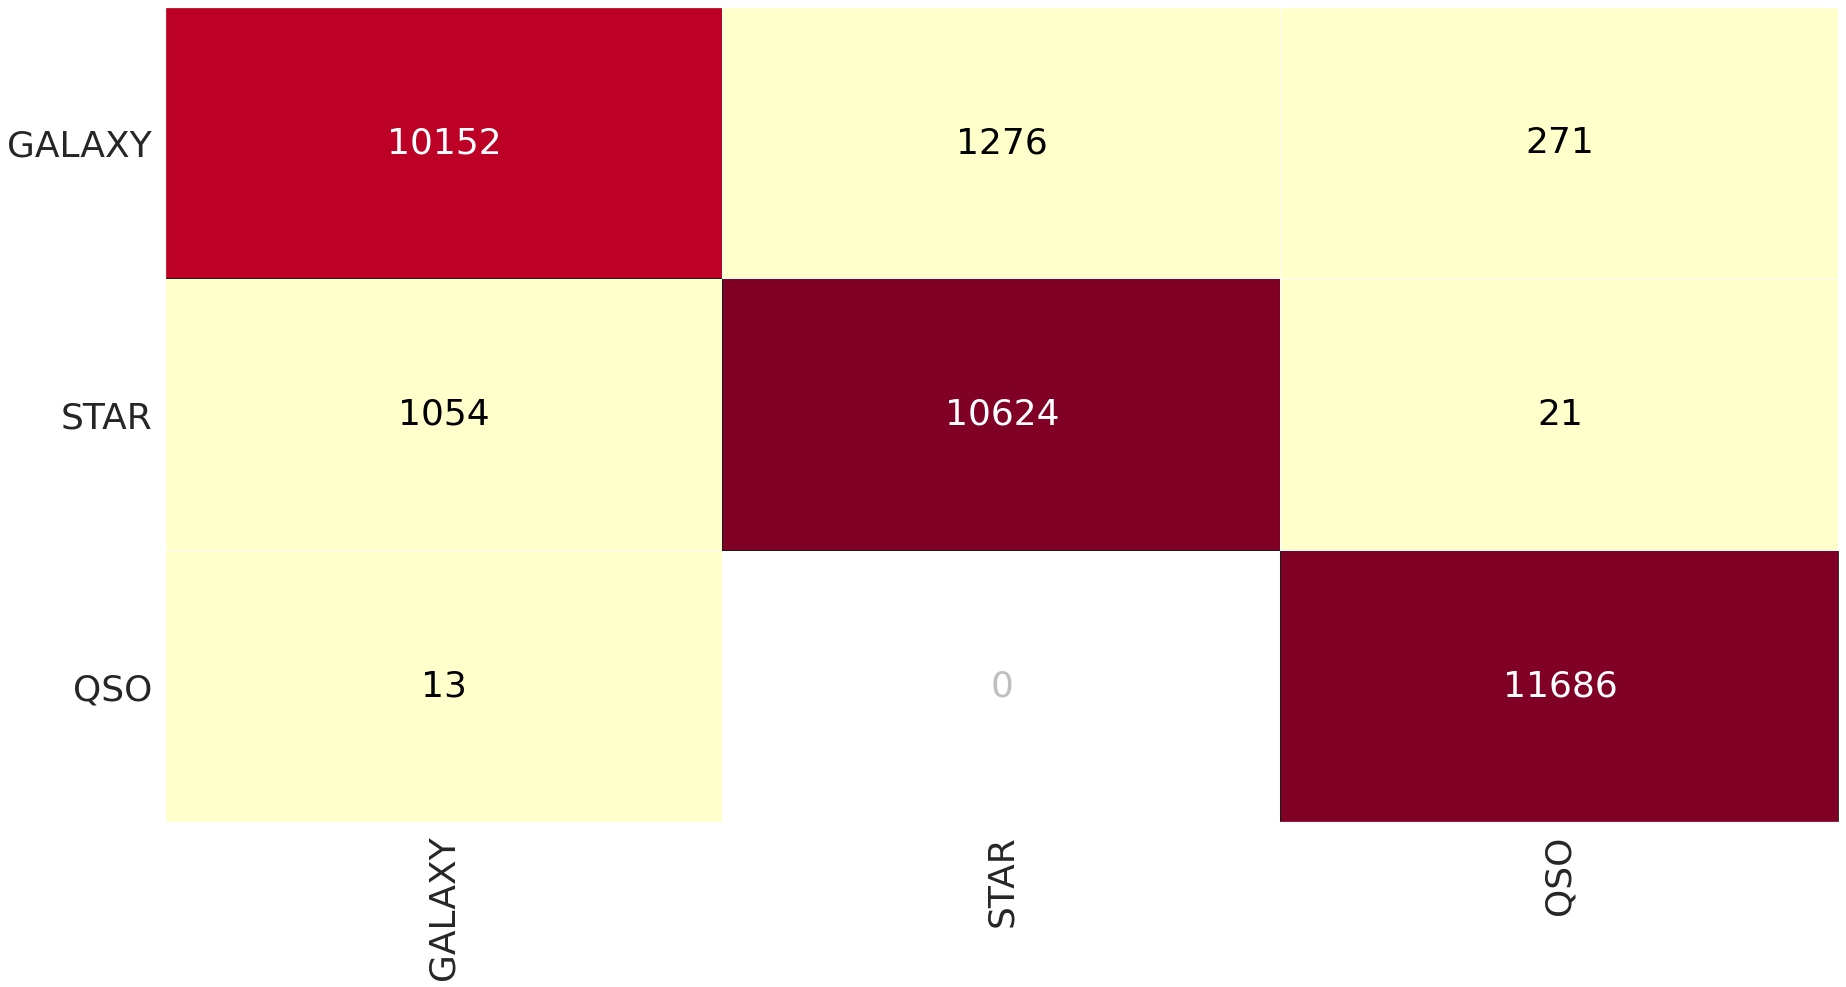

In [614]:
# 0: Galaxy
# 1: Star
# 2: Quasar (QSO)
CM = ConfusionMatrix(LR, classes=['GALAXY','STAR','QSO'])

plt.figure(figsize = (30,15))
sns.set(font_scale=3)
CM.fit(X_train,Y_train)
CM.score(X_test, Y_test)